In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pymysql
!pip install pyarabic
!pip install langdetect
!pip install Tashaphyne
!pip3 install openpyxl==3.0.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43 kB 907 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 126 kB 31.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 27.5 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=2d0c052ef2e108f2ef21cbc28b9d69db4102cb0732eae29459d70a44fd2421b4
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 251 kB 33.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-w

In [ ]:
!apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libcudnn8 is already the newest version (8.1.0.77-1+cuda11.2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import pymysql
import random
from pyarabic.araby import strip_tashkeel,strip_tatweel,normalize_hamza,tokenize
from pyarabic import araby
from pyarabic.araby import tokenize, is_arabicrange
import re
import string
from langdetect import detect
from tashaphyne.stemming import ArabicLightStemmer
import datetime

# DATA Analysis

In [ ]:
def deleteduplication(tokens):
    popindex=set()
    for i in range(len(tokens)-1):
        if tokens[i]==tokens[i+1]:
            popindex.add(i+1)
    popindex = sorted(popindex, reverse = True)
    for i in popindex:
        tokens.pop(i)
    return tokens    

In [ ]:
def deletedigits(text):
    result = ''.join([i for i in text if not i.isdigit()])
    return result

In [ ]:
def removePunctuation(my_str):
    # define punctuation
    punctuations = '''!()-[]{};:'"\,،<>./?؟@$%^&*~'''
    # remove punctuation from the string
    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char
    # display the unpunctuated string
    return no_punct

In [ ]:
def removeEmojis(my_str):
    emoji = '[#*0-9]️⃣|[©®‼⁉™ℹ↔-↙↩↪⌚⌛⌨⏏⏩-⏳⏸-⏺Ⓜ▪▫▶◀◻-◾☀-☄☎☑☔☕☘]|☝[🏻-🏿]?|[☠☢☣☦☪☮☯☸-☺♀♂♈-♓♟♠♣♥♦♨♻♾♿⚒-⚗⚙⚛⚜⚠⚡⚪⚫⚰⚱⚽⚾⛄⛅⛈⛎⛏⛑⛓⛔⛩⛪⛰-⛵⛷⛸]|⛹(?:️‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[⛺⛽✂✅✈✉]|[✊-✍][🏻-🏿]?|[✏✒✔✖✝✡✨✳✴❄❇❌❎❓-❕❗❣❤➕-➗➡➰➿⤴⤵⬅-⬇⬛⬜⭐⭕〰〽㊗㊙🀄🃏🅰🅱🅾🅿🆎🆑-🆚]|🇦[🇨-🇬🇮🇱🇲🇴🇶-🇺🇼🇽🇿]|🇧[🇦🇧🇩-🇯🇱-🇴🇶-🇹🇻🇼🇾🇿]|🇨[🇦🇨🇩🇫-🇮🇰-🇵🇷🇺-🇿]|🇩[🇪🇬🇯🇰🇲🇴🇿]|🇪[🇦🇨🇪🇬🇭🇷-🇺]|🇫[🇮-🇰🇲🇴🇷]|🇬[🇦🇧🇩-🇮🇱-🇳🇵-🇺🇼🇾]|🇭[🇰🇲🇳🇷🇹🇺]|🇮[🇨-🇪🇱-🇴🇶-🇹]|🇯[🇪🇲🇴🇵]|🇰[🇪🇬-🇮🇲🇳🇵🇷🇼🇾🇿]|🇱[🇦-🇨🇮🇰🇷-🇻🇾]|🇲[🇦🇨-🇭🇰-🇿]|🇳[🇦🇨🇪-🇬🇮🇱🇴🇵🇷🇺🇿]|🇴🇲|🇵[🇦🇪-🇭🇰-🇳🇷-🇹🇼🇾]|🇶🇦|🇷[🇪🇴🇸🇺🇼]|🇸[🇦-🇪🇬-🇴🇷-🇹🇻🇽-🇿]|🇹[🇦🇨🇩🇫-🇭🇯-🇴🇷🇹🇻🇼🇿]|🇺[🇦🇬🇲🇳🇸🇾🇿]|🇻[🇦🇨🇪🇬🇮🇳🇺]|🇼[🇫🇸]|🇽🇰|🇾[🇪🇹]|🇿[🇦🇲🇼]|[🈁🈂🈚🈯🈲-🈺🉐🉑🌀-🌡🌤-🎄]|🎅[🏻-🏿]?|[🎆-🎓🎖🎗🎙-🎛🎞-🏁]|🏂[🏻-🏿]?|[🏃🏄](?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🏅🏆]|🏇[🏻-🏿]?|[🏈🏉]|🏊(?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🏋🏌](?:️‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🏍-🏰]|🏳(?:️‍🌈)?|🏴(?:‍☠️|󠁧󠁢(?:󠁥󠁮󠁧|󠁳󠁣󠁴|󠁷󠁬󠁳)󠁿)?|[🏵🏷-👀]|👁(?:️‍🗨️)?|[👂👃][🏻-🏿]?|[👄👅]|[👆-👐][🏻-🏿]?|[👑-👥]|[👦👧][🏻-🏿]?|👨(?:‍(?:[⚕⚖✈]️|❤️‍(?:💋‍)?👨|[🌾🍳🎓🎤🎨🏫🏭]|👦(?:‍👦)?|👧(?:‍[👦👧])?|[👨👩]‍(?:👦(?:‍👦)?|👧(?:‍[👦👧])?)|[💻💼🔧🔬🚀🚒🦰-🦳])|[🏻-🏿](?:‍(?:[⚕⚖✈]️|[🌾🍳🎓🎤🎨🏫🏭💻💼🔧🔬🚀🚒🦰-🦳]))?)?|👩(?:‍(?:[⚕⚖✈]️|❤️‍(?:💋‍)?[👨👩]|[🌾🍳🎓🎤🎨🏫🏭]|👦(?:‍👦)?|👧(?:‍[👦👧])?|👩‍(?:👦(?:‍👦)?|👧(?:‍[👦👧])?)|[💻💼🔧🔬🚀🚒🦰-🦳])|[🏻-🏿](?:‍(?:[⚕⚖✈]️|[🌾🍳🎓🎤🎨🏫🏭💻💼🔧🔬🚀🚒🦰-🦳]))?)?|[👪-👭]|👮(?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|👯(?:‍[♀♂]️)?|👰[🏻-🏿]?|👱(?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|👲[🏻-🏿]?|👳(?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[👴-👶][🏻-🏿]?|👷(?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|👸[🏻-🏿]?|[👹-👻]|👼[🏻-🏿]?|[👽-💀]|[💁💂](?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|💃[🏻-🏿]?|💄|💅[🏻-🏿]?|[💆💇](?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[💈-💩]|💪[🏻-🏿]?|[💫-📽📿-🔽🕉-🕎🕐-🕧🕯🕰🕳]|🕴[🏻-🏿]?|🕵(?:️‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🕶-🕹]|🕺[🏻-🏿]?|[🖇🖊-🖍]|[🖐🖕🖖][🏻-🏿]?|[🖤🖥🖨🖱🖲🖼🗂-🗄🗑-🗓🗜-🗞🗡🗣🗨🗯🗳🗺-🙄]|[🙅-🙇](?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🙈-🙊]|🙋(?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|🙌[🏻-🏿]?|[🙍🙎](?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|🙏[🏻-🏿]?|[🚀-🚢]|🚣(?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🚤-🚳]|[🚴-🚶](?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🚷-🚿]|🛀[🏻-🏿]?|[🛁-🛅🛋]|🛌[🏻-🏿]?|[🛍-🛒🛠-🛥🛩🛫🛬🛰🛳-🛹🤐-🤗]|[🤘-🤜][🏻-🏿]?|🤝|[🤞🤟][🏻-🏿]?|[🤠-🤥]|🤦(?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🤧-🤯]|[🤰-🤶][🏻-🏿]?|🤷(?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🤸🤹](?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|🤺|🤼(?:‍[♀♂]️)?|[🤽🤾](?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🥀-🥅🥇-🥰🥳-🥶🥺🥼-🦢🦰-🦴]|[🦵🦶][🏻-🏿]?|🦷|[🦸🦹](?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🧀-🧂🧐]|[🧑-🧕][🏻-🏿]?|🧖(?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🧗-🧝](?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🧞🧟](?:‍[♀♂]️)?|[🧠-🧿]'
    no_emoji = ""
    for char in my_str:
        if char not in emoji:
            no_emoji = no_emoji + char
    return no_emoji

In [ ]:
Newdata = pd.read_excel("/content/drive/My Drive/FBHealth/data/ILI_DATA.xlsx", index_col=0) 

In [ ]:
Newdata

,postid_groupid,groupid,text,time,likes,comments,shares,label,label_cat
21374,557824791044240_544094832417236,544094832417236,"أنا, جديد, معكم, هل, من, ترحيب",2016/04/24,6,1,0,Unrelated,2
21414,559053824254670_544094832417236,544094832417236,"عمليه, حسابية, خطيرة, جدا, والله, انها, اخافتن...",2016/04/28,2,0,0,Unrelated,2
21549,563928177100568_544094832417236,544094832417236,"بمجرد, تسجيل, أصدقائك, يصبح, في, رصيدك, دج, وه...",2016/05/10,2,0,0,Unrelated,2
21828,575803272579725_544094832417236,544094832417236,"أكره, فرنسا, و, كلابها",2016/06/11,3,1,0,Unrelated,2
21894,577849189041800_544094832417236,544094832417236,"اللهم, إغفر, له, و, رحمه, وثبته, عند, السؤال, ...",2016/06/16,14,0,0,Unrelated,2
...,...,...,...,...,...,...,...,...,...
21912,578315113538586_308627037174063,308627037174063,"ماهو, علاج, سعال, الجاف, ربي, يجازيكم, ان, شاء...",2021-08-01 00:00:00,0,5,0,Positive,1
14386,1453573741707868_869662733432308,869662733432308,"مافهمتش, كاين, كوفيد, ولا, مكاش",2021-08-01 00:00:00,0,7,0,Positive,1
14312,1452963865102189_869662733432308,869662733432308,"السلام, عليكم, ورحمة, الله, وبركاته, ما, هو, س...",2021-08-01 00:00:00,0,0,0,Positive,1
14308,1452940945104481_869662733432308,869662733432308,"خاوتي, الله, يحفضكم, هذو, ايزناليز, تاع, ما, ا...",2021-08-01 00:00:00,0,0,0,Positive,1


# Target

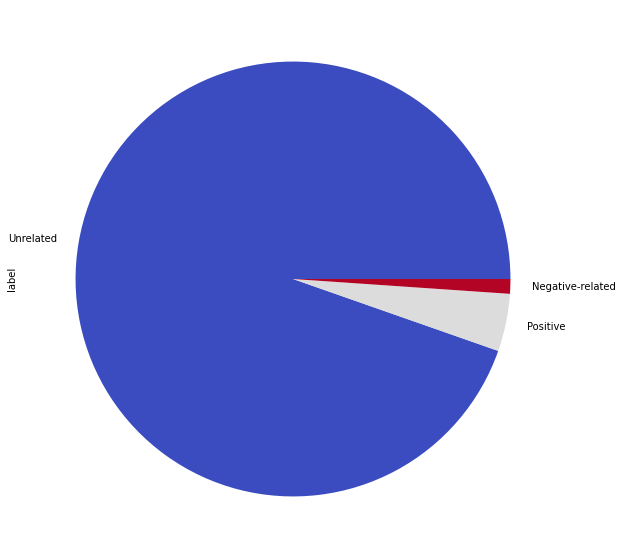

In [ ]:
Newdata['label'].value_counts().plot(kind="pie", figsize=(10,10), colormap="coolwarm")

In [ ]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

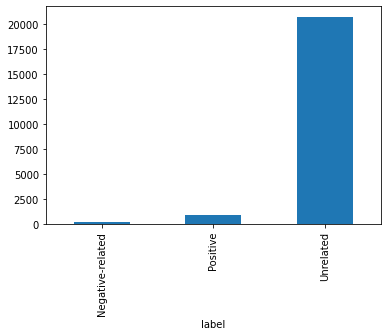

In [ ]:
Newdata.groupby(["label"]).size().plot( kind='bar')

In [ ]:
Newdata["time"]= pd.to_datetime(Newdata["time"])
Newdata["time"]=Newdata["time"].dt.strftime('%Y/%m/%d')
Newdata = Newdata.sort_values(by=['time'])

In [ ]:
Newdata["label"].value_counts()

Unrelated           20711
Positive              936
Negative-related      238
Name: label, dtype: int64

In [ ]:
resultPos = Newdata[Newdata['label'] == 'Positive']
resultPos['case'] = [1]*len(resultPos)
resultPos = resultPos.groupby(['time'])['case'].sum()
resultPos =resultPos.to_frame()

In [ ]:
resultPos.reset_index(inplace=True)
resultPos["time"]= pd.to_datetime(resultPos["time"])

In [ ]:
resultPos

,time,case
0,2019-03-11,1
1,2020-04-20,1
2,2020-05-13,1
3,2020-06-01,1
4,2020-06-06,1
...,...,...
236,2021-07-28,6
237,2021-07-29,25
238,2021-07-30,7
239,2021-07-31,5


In [ ]:
def getinversecumule(listt):
    new_list=[listt[0]]
    j=0
    for i in range(1,len(listt)):
        j=listt[i]-listt[i-1]
        new_list.append(j)

    return new_list

In [ ]:
datacovidglobal = "/content/drive/My Drive/FBHealth/time_series_covid19_confirmed_global.csv"
covid19 = pd.read_csv(datacovidglobal, index_col=0)  
covid19 = covid19[covid19['Country/Region']=='Algeria']
covid19 = covid19.drop(columns=['Lat', 'Long'])
covid19 = covid19.set_index('Country/Region')
covid19DZ = pd.DataFrame({'time': [datetime.datetime(int(date.split('/')[2])+2000, int(date.split('/')[0]), int(date.split('/')[1])) for date in covid19.columns.tolist()] , 'casecovid19': getinversecumule(covid19.loc['Algeria'].tolist())})
covid19DZ["time"]= pd.to_datetime(covid19DZ["time"])
covid19DZ

,time,casecovid19
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
...,...,...
553,2021-07-28,1927
554,2021-07-29,1537
555,2021-07-30,1521
556,2021-07-31,1203


In [ ]:
InfluenzaData = pd.merge(resultPos, covid19DZ, on='time')
InfluenzaData

,time,case,casecovid19
0,2020-04-20,1,89
1,2020-05-13,1,186
2,2020-06-01,1,119
3,2020-06-06,1,115
4,2020-06-08,1,111
...,...,...,...
235,2021-07-28,6,1927
236,2021-07-29,25,1537
237,2021-07-30,7,1521
238,2021-07-31,5,1203


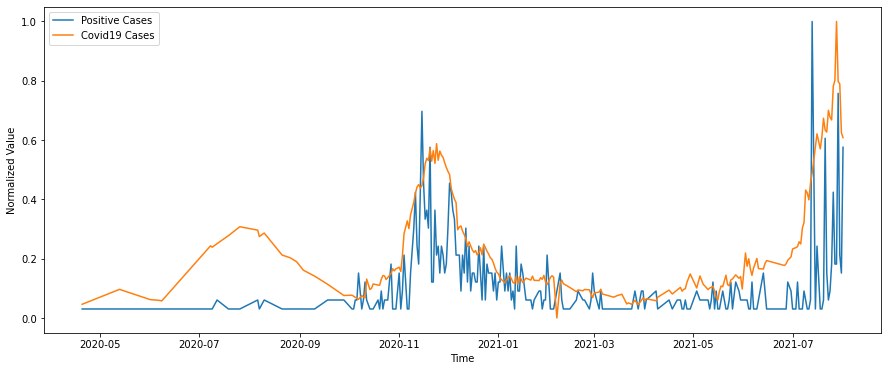

In [ ]:
fig = plt.figure(figsize=(15, 6))

case_Norm = [float(i)/max(InfluenzaData['case'].tolist()) for i in InfluenzaData['case'].tolist()]
casecovid19_Norm = [float(i)/max(InfluenzaData['casecovid19'].tolist()) for i in InfluenzaData['casecovid19'].tolist()]

# potting the points
plt.plot(InfluenzaData['time'], case_Norm, label='Positive Cases')
plt.plot(InfluenzaData['time'], casecovid19_Norm, label='Covid19 Cases')
plt.legend()
plt.ylabel('Normalized Value')
plt.xlabel('Time')
# function to show the plot
# plt.savefig('/content/drive/My Drive/FBHealth/results/PositiveanCovid19.eps',dpi=300, bbox_inches='tight')
plt.show()

# DATA CLEANING

In [ ]:
Newdata.shape

(21885, 9)

In [ ]:
Newdata.isnull().any().any()

True

In [ ]:
Newdata['text'].replace('', np.nan, inplace=True)
Newdata.isnull().any().any()
Newdata.dropna(subset = ["text"], inplace=True)

In [ ]:
Newdata['text'].isna().sum()

0

In [ ]:
Newdata.shape

(21621, 9)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

## The distribution of top unigrams before cleaning

In [ ]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(Newdata['text'], 10)
for word, freq in common_words:
    print(word, freq)


من 15363
في 14032
عليكم 6622
على 6582
الله 4805
السلام 4156
سلام 4122
علاج 3456
عندي 2892
هل 2891


## The distribution of top bigrams before cleaning

In [ ]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(Newdata['text'], 10)
for word, freq in common_words:
    print(word, freq)


السلام عليكم 3942
سلام عليكم 2347
من فضلكم 1970
مع العلم 586
هل من 554
عليكم ورحمة 519
الله خيرا 506
ورحمة الله 504
عليكم عندي 492
جزاكم الله 464


## The distribution of top trigrams before cleaning

In [ ]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(Newdata['text'], 10)
for word, freq in common_words:
    print(word, freq)

عليكم ورحمة الله 498
السلام عليكم ورحمة 442
ورحمة الله وبركاته 351
عليكم من فضلكم 311
بارك الله فيكم 297
جزاكم الله خيرا 294
السلام عليكم عندي 287
السلام عليكم ممكن 269
السلام عليكم من 252
سلام عليكم خاوتي 203
سلام عليكم عندي 193
وجزاكم الله خيرا 167
السلام عليكم هل 165
السلام عليكم خاوتي 160
هل من علاج 149
طبيب مختص في 144
سلام عليكم ممكن 138
عليكم ورحمه الله 129
السلام عليكم انا 126
هل يوجد علاج 116
سلام عليكم شكون 113
السلام عليكم ورحمه 112
السلام عليكم شكون 109
سلام عليكم من 109
وبارك الله فيكم 106
ان شاء الله 104
عليكم ممكن علاج 99
ورحمه الله وبركاته 98
واجركم على الله 98
السلام عليكم حبيت 97
ما هو علاج 97
السكر في الدم 93
سلام عليكم انا 93
صلى الله عليه 86
الله كل خير 86
سلام من فضلكم 83
من فضلكم شكون 81
هل من حل 79
من فضلكم هل 79
جزاكم الله خير 78
في الجزائر العاصمة 77
سلام عليكم هل 72
سلام عليكم حبيت 71
الله عليه وسلم 70
نسبة عالية من 70
ملعقة صغيرة من 66
السلام عليكم اريد 66
سلام عليكم ورحمة 65
شكون يعرف طبيب 63
انا اعاني من 62
هل هناك علاج 60
على نسبة عالية 58
عليكم هل من 58


#Remove Stop Words, same chrt duplication, Normalization hamza, Stemming

In [ ]:
def stemming(word):
    stem = word
    prefix=['وال','فال','بال','كال','ال','لل']
    for px in prefix:
        if word.find(px) == 0:
            if px != 'ال' and  px != 'لل':
                stem = word[3:]
                break
            else:
                stem = word[2:]
                break

    return stem
#     # return an array
# #     ArListem = ArabicLightStemmer()
# #     stem = ArListem.light_stem(word)
#     return stem

In [ ]:
def is_stopword(word,stopwords):
    findword = stopwords.loc[stopwords['word']==(word)]
    if len(findword) != 0:
        return True
    else:
        return False

In [ ]:
def deleteWaw(word):
    if word[0]=='و':
        word = word.replace(word[0:1], '')
    return word

In [ ]:
def removeduplication(word):
    nonrptchar=['ا','و','ه']
    
    for cht in nonrptchar:
        if word.count(''.join([cht,cht]))>=1:
            sta=-1
            fin=-1
            i=0
            while( i< len(word) ):
                if(word[i]==cht) and sta==-1:
                    sta=i
                elif(word[i]==cht) and sta!=-1:
                    fin=i
                elif(word[i]!=cht) and fin==-1:
                    sta=-1   
                elif(word[i]!=cht) and fin!=-1:
                    break
                i = i + 1

            if fin>sta:
                word = word.replace(word[sta:fin+1], cht)
    return word

In [ ]:
listWaWwords=[]
stopwordsAR = pd.read_excel('/content/drive/My Drive/FBHealth/stopwords/StopWords.xlsx')
stopwordsDZ = pd.read_excel('/content/drive/My Drive/FBHealth/stopwords/StopWordsDZ.xlsx')
stopwords   =  pd.concat([stopwordsAR, stopwordsDZ], ignore_index=True)
for i in range(Newdata.shape[0]): #Newdata.shape[0]
    T=list()
    text = str(Newdata.iloc[i,2])
    tokens = tokenize(text, conditions=is_arabicrange)
    if len(tokens)>1:
        for tag in tokens:
            try:
                tag = strip_tashkeel(tag)
                tag = strip_tatweel(tag)
                tag = removeduplication(tag)
                if is_stopword(tag,stopwords) == False:                      
#                     tag =stemming(tag)
                    listWaWwords.append(tag)
                    tag =deleteWaw(tag)
                    tag =tag.replace(u'لإ', u'لا')
                    tag =tag.replace(u'لأ', u'لا')
                    tag =tag.replace(u'لآ', u'لا')
                    
                    tag =tag.replace(u'ﻵ', u'لا')
                    tag =tag.replace(u'ﻷ', u'لا')
                    tag =tag.replace(u'ﻹ', u'لا')
                    tag =tag.replace(u'ﻻ', u'لا')
                    
                    tag =tag.replace(u'ڱ', u'ک')
                    tag =tag.replace(u'گ', u'ک')
                    tag =tag.replace(u'ڪ', u'ک')
                    
                    tag =tag.replace(u'ٶ', u'و')
                    
                    tag =tag.replace(u'ﻻ', u'لا')
                    tag =tag.replace(u'ﻻ', u'لا')

                    tag =tag.replace(u'ﻻ', u'لا')
                    tag =tag.replace(u'ﻻ', u'لا')
                    
                    
                    tag =tag.replace(u'ﻸ', u'ﻼ')
                    tag =tag.replace(u'ﻺ', u'ﻼ')
                    
                    tag =tag.replace(u'ﷺ', u'')
                    tag =tag.replace(u'ﷻ', u'')
                    tag =tag.replace(u'ﮯ', u'')
                    tag =tag.replace(u'ۥ', u'')
                    
                    tag =tag.replace(u'ى', u'ي')
                    
                    tag =tag.replace(u'ٱ', u'ا')
                    tag =tag.replace(u'ﺃ', u'ا')
                    tag =tag.replace(u'ٲ', u'ا')
                    tag =tag.replace(u'ﺇ', u'ا')
                    tag =tag.replace(u'ﺍ', u'ا')
                    tag =tag.replace(u'ﺋ', u'ء')
                    
                    tag =tag.replace(u'ة', u'ﻪ')
                    tag =tag.replace(u'ۃ', u'ﻪ')
                    tag =tag.replace(u'ﺔ', u'ﻪ')
                    tag =tag.replace(u'ﻪ', u'ﻪ')
                    
                    tag =tag.replace(u'ﺓ', u'ﻩ')
                    tag =tag.replace(u'ﻫ', u'ﻪ')
                    
                    tag =tag.replace(u'ٶ', u'و')
                    tag =tag.replace(u'ﻭ', u'و')
                    tag =tag.replace(u'ﺆ', u'ﻮ')
                    tag =tag.replace(u'ﯙ', u'ﻮ')
                    
                    tag =tag.replace(u'چ', u'ﺠ')
                    
                    
                    tag =tag.replace(u'ي', u'ﻰ')
                    tag =tag.replace(u'ﻲ', u'ﻰ')
                    tag =tag.replace(u'ﻱ', u'ﻯ')
                    tag =tag.replace(u'ی', u'ﻴ')
                    
                    tag =tag.replace(u'ڵ', u'ﻟ')
                    tag =tag.replace(u'ک', u'ﻛ')
                    tag =tag.replace(u'ݣ', u'ﻛ')
                   
                    tag =tag.replace(u'ڜ', u'ﺸ')
                    tag =tag.replace(u'پ', u'ﺒ')
                    
                    tag = normalize_hamza(tag)

                    tag = removeduplication(tag) 
                    if is_stopword(tag,stopwords) == False:
                        T.append(tag)
            except:
                pass
    if len(T)>=3:
        Newdata.iloc[i,2]=' '.join(T)
    else:
        Newdata.iloc[i,2]=''

## delete empty text


In [ ]:
Newdata["label"].value_counts()

Unrelated           20447
Positive              936
Negative-related      238
Name: label, dtype: int64

In [ ]:
(Newdata['text'].values == '').sum()  

1255

In [ ]:
Newdata['text'].replace('', np.nan, inplace=True)
Newdata.dropna(subset = ["text"], inplace=True)
Newdata['text'].isna().sum()

0

In [ ]:
Newdata.shape

(20366, 9)

In [ ]:
Newdata["label"].value_counts()

Unrelated           19201
Positive              927
Negative-related      238
Name: label, dtype: int64

In [ ]:
# Newdata.to_excel("/content/drive/My Drive/FBHealth/temp/ProcessedDATA.xlsx", encoding="utf-8")  

# save cleaned data

In [ ]:
Newdata2 = pd.read_excel('/content/drive/My Drive/FBHealth/temp/ProcessedDATA.xlsx', index_col=0)  

In [ ]:
Newdata2.shape

(20366, 9)

# DAYA ANALYTICS

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

## The distribution of top unigrams after cleaning

In [ ]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(Newdata2['text'], 10)
for word, freq in common_words:
    print(word, freq)

لا 4391
علاج 3423
عندﻰ 3038
طبﻰب 2394
ما 2129
اش 1649
الدم 1384
دواء 1258
الجسم 1168
عندو 865


## The distribution of top bigrams after cleaning

In [ ]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(Newdata2['text'], 10)
for word, freq in common_words:
    print(word, freq)

ضغط الدم 326
طبﻰب مختص 240
الغدﻪ الدرقﻰﻪ 220
ارﻰد علاج 173
عندﻰ مشكل 172
الجهاز الهضمﻰ 167
زﻰت الزﻰتون 161
القولون العصبﻰ 155
لا لا 155
اش ندﻰر 143


## The distribution of top trigrams after cleaning

In [ ]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(Newdata2['text'], 10)
for word, freq in common_words:
    print(word, freq)

ارتفاع ضغط الدم 64
طبﻰب لا طبﻰبﻪ 51
نسبﻪ السكر الدم 43
ضغط الدم المرتفع 34
التهاب الجﻰوب الانفﻰﻪ 31
مستوﻰ السكر الدم 30
صل سلم سﻰدنا 27
الاصابﻪ بءمراض القلب 27
علﻰ ءاله صحبه 25
خفض ضغط الدم 25


In [ ]:
Newdata3 = Newdata2[(Newdata2['label'] != 'Unrelated')]
Newdata3["label"].value_counts()

Positive            927
Negative-related    238
Name: label, dtype: int64

In [ ]:
Nunrl = 3000

In [ ]:
Newdata3 = Newdata3.append(Newdata2[(Newdata2['label'] == 'Unrelated')].sample(n = Nunrl))
Newdata2 =Newdata3
# Newdata2 = Newdata2[(Newdata2['label'] != 'Negative-related')]
Newdata2["label"].value_counts()

Unrelated           3000
Positive             927
Negative-related     238
Name: label, dtype: int64

In [ ]:
# Newdata2.to_excel("/content/drive/My Drive/FBHealth/temp/Newdata_4165.xlsx", encoding="utf-8") 

In [ ]:
Newdata2 = pd.read_excel("/content/drive/My Drive/FBHealth/temp/Newdata_4165.xlsx", index_col=0) 

In [ ]:
print(len(Newdata2['text'].values))

4165


In [ ]:
Newdata2["label"].value_counts()

Unrelated           3000
Positive             927
Negative-related     238
Name: label, dtype: int64

In [ ]:
# Tokenization
import tensorflow.python as tf
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model,Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from keras.layers import  CuDNNLSTM,CuDNNGRU #Dense,Flatten,Dropout,LSTM,Embedding,Bidirectional, SpatialDropout1D,Conv1D,Conv2D,GlobalMaxPool1D, Input, Concatenate,Reshape,Masking,GlobalMaxPooling1D, GRU
from tensorflow.keras.layers import Dense,Flatten,Dropout,LSTM,Embedding,Bidirectional,Attention, SpatialDropout1D,Conv1D,GlobalMaxPool1D,BatchNormalization, Input, Concatenate,Reshape,Masking,GlobalMaxPooling1D,GlobalAveragePooling1D, GRU,MaxPooling1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam,SGD,Nadam

#Tokenization - CHARS and WORDS

In [ ]:
max_fatures = 20000
n_char = 100
tokenizer = Tokenizer(num_words=max_fatures, char_level=False, split=' ')
tokenizer.fit_on_texts(Newdata2['text'].values)
Vector_word = tokenizer.texts_to_sequences(Newdata2['text'].values)


tokenizer2 = Tokenizer(num_words=n_char, char_level=True, split=' ')
tokenizer2.fit_on_texts(Newdata2['text'].values)
Vector_char = tokenizer2.texts_to_sequences(Newdata2['text'].values)


print(type(Vector_word), type(Vector_char))
print(len(Vector_word), len(Vector_char))
Vector_word = pad_sequences(Vector_word)
Vector_char = pad_sequences(Vector_char)

print(Vector_word.shape, Vector_char.shape)

<class 'list'> <class 'list'>
4165 4165
(4165, 447) (4165, 2973)


In [ ]:
num_words = len(tokenizer.word_index) + 1
num_chars = len(tokenizer2.word_index) + 1
print(num_words, num_chars)

22752 135


#CountVectorizer and TfidfVectorizer - CHARS

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
contV1 = CountVectorizer(analyzer='char',ngram_range=(1,1)) #n grams between 1 and 3 
XContV1 = contV1.fit_transform(Newdata2['text'].values).toarray() # here we calculate TFIDF and we put thats in a matrix called features
print(XContV1.shape)

tfidf1 = TfidfVectorizer( analyzer='char',ngram_range=(1,1)) 
XTfidf1 = tfidf1.fit_transform(Newdata2['text'].values).toarray() 
print(XTfidf1.shape)

contV2 = CountVectorizer(analyzer='char',ngram_range=(1,2)) #n grams between 1 and 3 
XContV2 = contV2.fit_transform(Newdata2['text'].values).toarray() # here we calculate TFIDF and we put thats in a matrix called features
print(XContV2.shape)

tfidf2 = TfidfVectorizer(analyzer='char',ngram_range=(1,2)) 
XTfidf2 = tfidf2.fit_transform(Newdata2['text'].values).toarray() 
print(XTfidf2.shape)

contV3 = CountVectorizer( analyzer='char',ngram_range=(1,3)) #n grams between 1 and 3 
XContV3 = contV3.fit_transform(Newdata2['text'].values).toarray() # here we calculate TFIDF and we put thats in a matrix called features
print(XContV3.shape)

tfidf3 = TfidfVectorizer( analyzer='char',ngram_range=(1,3)) 
XTfidf3 = tfidf3.fit_transform(Newdata2['text'].values).toarray() 
print(XTfidf3.shape)

(4165, 134)
(4165, 134)
(4165, 1933)
(4165, 1933)
(4165, 14659)
(4165, 14659)


#CountVectorizer and TfidfVectorizer - WORDS

In [ ]:
max_featuresXT = 1000
contV1_W = CountVectorizer(max_features=max_featuresXT, analyzer='word',ngram_range=(1,1)) #n grams between 1 and 3 
XContV1_W = contV1_W.fit_transform(Newdata2['text'].values).toarray() # here we calculate TFIDF and we put thats in a matrix called features
print(XContV1_W.shape)

tfidf1_W = TfidfVectorizer(max_features=max_featuresXT, analyzer='word',ngram_range=(1,1)) 
XTfidf1_W = tfidf1_W.fit_transform(Newdata2['text'].values).toarray() 
print(XTfidf1_W.shape)

contV2_W = CountVectorizer(max_features=max_featuresXT, analyzer='word',ngram_range=(1,2)) #n grams between 1 and 3 
XContV2_W = contV2_W.fit_transform(Newdata2['text'].values).toarray() # here we calculate TFIDF and we put thats in a matrix called features
print(XContV2_W.shape)

tfidf2_W = TfidfVectorizer(max_features=max_featuresXT, analyzer='word',ngram_range=(1,2)) 
XTfidf2_W = tfidf2_W.fit_transform(Newdata2['text'].values).toarray() 
print(XTfidf2_W.shape)

contV3_W = CountVectorizer(max_features=max_featuresXT, analyzer='word',ngram_range=(1,3)) #n grams between 1 and 3 
XContV3_W = contV3_W.fit_transform(Newdata2['text'].values).toarray() # here we calculate TFIDF and we put thats in a matrix called features
print(XContV3_W.shape)

tfidf3_W = TfidfVectorizer(max_features=max_featuresXT, analyzer='word',ngram_range=(1,3)) 
XTfidf3_W = tfidf3_W.fit_transform(Newdata2['text'].values).toarray() 
print(XTfidf3_W.shape)

(4165, 1000)
(4165, 1000)
(4165, 1000)
(4165, 1000)
(4165, 1000)
(4165, 1000)


#Data Balancing

In [ ]:
def Data_balancing(Xdata, Ytarget): 
  from imblearn.over_sampling import SMOTE
  from imblearn.under_sampling import RandomUnderSampler
  from imblearn.pipeline import Pipeline

  # define pipeline
  strategy1 = {0:Nunrl,1:Nunrl}
  over = SMOTE(sampling_strategy=strategy1)
  # strategy2 = {2:Nunrl}
  # under = RandomUnderSampler(sampling_strategy=strategy2)
  # steps = [('o', over), ('u', under)]
  steps = [('o', over)]
  pipeline = Pipeline(steps=steps)
  # transform the dataset
  X_balanced, Y_balanced = pipeline.fit_resample(Xdata, Ytarget)
  print(X_balanced.shape, Y_balanced.shape)

  unique_elements, counts_elements = np.unique(Y_balanced, return_counts=True)
  print("Frequency of unique values of the said array:")
  print(np.asarray((unique_elements, counts_elements)))

  return X_balanced, Y_balanced 

In [ ]:
def Data_balancingROS(Xdata, Ytarget): 
  from imblearn.over_sampling import RandomOverSampler
  from imblearn.pipeline import Pipeline

  # define pipeline
  strategy1 = {0:Nunrl,1:Nunrl}
  over = RandomOverSampler(sampling_strategy=strategy1)
  steps = [('o', over)]
  pipeline = Pipeline(steps=steps)
  # transform the dataset
  X_balanced, Y_balanced = pipeline.fit_resample(Xdata, Ytarget)
  print(X_balanced.shape, Y_balanced.shape)

  unique_elements, counts_elements = np.unique(Y_balanced, return_counts=True)
  print("Frequency of unique values of the said array:")
  print(np.asarray((unique_elements, counts_elements)))

  return X_balanced, Y_balanced 

#Parameters

In [ ]:
batch_size = 128
epoch_size = 500
dpt = 0.2
embed_dim = 20
opti = 'adam'

In [ ]:
import keras.backend as K
def get_f1(y_true, y_pred): 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

def specificity(y_true, y_pred):
  true_negatives = K.sum(K.round(K.clip((1 - y_true) * (1 - y_pred), 0, 1)))
  possible_negatives = K.sum(K.round(K.clip(1 - y_true, 0, 1)))
  return true_negatives / (possible_negatives + K.epsilon())

#Models

In [ ]:
def FitProposedCNNModel(verboseVal,CV, X_tr, Y_tr,X_tst, Y_tst, inputdim):
  from keras.metrics import Precision, Recall
  from keras.callbacks import EarlyStopping
  

  input1 = Input(shape=(X.shape[1],), name='Input1')
  embedding_layer1 = Embedding(inputdim, embed_dim,input_length=input1.shape[0])(input1)
  dropout_layer10 = (Dropout(dpt))(embedding_layer1)

  cnn_layer2 = Conv1D(128, 3, activation='tanh')(dropout_layer10)
  pooling_layer_1 = MaxPooling1D(name='Pooling_1')(cnn_layer2)
  
  dropout_layer11 = (Dropout(dpt))(pooling_layer_1)
  
  cnn_layer3 = Conv1D(64, 3, activation='tanh')(dropout_layer11)
  pooling_layer_2 = MaxPooling1D(name='Pooling_2')(cnn_layer3)

  dropout_layer12 = (Dropout(dpt))(pooling_layer_2)
  
  cnn_layer4 = Conv1D(16, 3, activation='tanh')(dropout_layer12)
  pooling_layer_3 = GlobalMaxPooling1D(name='Pooling_3')(cnn_layer4)


  dropout_layer = (Dropout(dpt))(pooling_layer_3)
  
  # Classification
  dense_layer = Dense(3, activation='softmax', name='Dense_classification')(dropout_layer)

  # Model
  model = Model(input1, outputs=dense_layer)
  model.compile(optimizer=opti, loss='categorical_crossentropy', metrics=['accuracy',get_f1, Precision(), Recall(),specificity])
  es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
  if CV == 0:
    history = model.fit(X_tr, Y_tr, validation_split=0.2, epochs = epoch_size,callbacks=[es], batch_size=batch_size, verbose = verboseVal)
  elif CV == 1:
    history = model.fit(X_tr, Y_tr, validation_data=(X_tst, Y_tst), epochs = epoch_size,callbacks=[es], batch_size=batch_size, verbose = verboseVal)

  _, train_acc,train_f1,train_pre,train_rec,train_spec = model.evaluate(X_tr, Y_tr, batch_size=batch_size, verbose=0)
  _, test_acc,test_f1,test_pre,test_rec,test_spec = model.evaluate(X_tst, Y_tst, batch_size=batch_size, verbose=0)
  print('Accuracy: Train: %.3f, Test: %.3f' % (train_acc, test_acc))
  print('F1: Train: %.3f, Test: %.3f' % (train_f1, test_f1))
  print('Precision: Train: %.3f, Test: %.3f' % (train_pre, test_pre))
  print('Recall: Train: %.3f, Test: %.3f' % (train_rec, test_rec))
  print('Specificity: Train: %.3f, Test: %.3f' % (train_spec, test_spec))

  return model,history

In [ ]:
def LSTM_Basic(verboseVal,CV, X_tr, Y_tr,X_tst, Y_tst, inputdim):
  from keras.metrics import Precision, Recall
  from keras.callbacks import EarlyStopping
  
  model = Sequential()
  model.add(Embedding(inputdim, embed_dim,input_length=X.shape[1]))
  # model.add(SpatialDropout1D(0.1))
  model.add(CuDNNLSTM(128))
  model.add(Dropout(0.2))
  model.add(Dense(3,activation='softmax'))
  model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy',get_f1, Precision(), Recall(),specificity])


  es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
  if CV == 0:
    history = model.fit(X_tr, Y_tr, validation_split=0.2, epochs = epoch_size,callbacks=[es], batch_size=batch_size, verbose = verboseVal)
  elif CV == 1:
    history = model.fit(X_tr, Y_tr, validation_data=(X_tst, Y_tst), epochs = epoch_size,callbacks=[es], batch_size=batch_size, verbose = verboseVal)

  _, train_acc,train_f1,train_pre,train_rec,train_spec = model.evaluate(X_tr, Y_tr, batch_size=batch_size, verbose=0)
  _, test_acc,test_f1,test_pre,test_rec,test_spec = model.evaluate(X_tst, Y_tst, batch_size=batch_size, verbose=0)
  print('Accuracy: Train: %.3f, Test: %.3f' % (train_acc, test_acc))
  print('F1: Train: %.3f, Test: %.3f' % (train_f1, test_f1))
  print('Precision: Train: %.3f, Test: %.3f' % (train_pre, test_pre))
  print('Recall: Train: %.3f, Test: %.3f' % (train_rec, test_rec))
  print('Specificity: Train: %.3f, Test: %.3f' % (train_spec, test_spec))

  return model,history

In [ ]:
def GRU_Basic(verboseVal,CV, X_tr, Y_tr,X_tst, Y_tst, inputdim):
  from keras.metrics import Precision, Recall
  from keras.callbacks import EarlyStopping
  
  model = Sequential()
  model.add(Embedding(inputdim, embed_dim,input_length=X.shape[1]))
  # model.add(SpatialDropout1D(0.1))
  model.add(CuDNNGRU(64))
  model.add(Dropout(0.2))
  model.add(Dense(3,activation='softmax'))
  model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy',get_f1, Precision(), Recall(),specificity])


  es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
  if CV == 0:
    history = model.fit(X_tr, Y_tr, validation_split=0.2, epochs = epoch_size,callbacks=[es], batch_size=batch_size, verbose = verboseVal)
  elif CV == 1:
    history = model.fit(X_tr, Y_tr, validation_data=(X_tst, Y_tst), epochs = epoch_size,callbacks=[es], batch_size=batch_size, verbose = verboseVal)

  _, train_acc,train_f1,train_pre,train_rec,train_spec = model.evaluate(X_tr, Y_tr, batch_size=batch_size, verbose=0)
  _, test_acc,test_f1,test_pre,test_rec,test_spec = model.evaluate(X_tst, Y_tst, batch_size=batch_size, verbose=0)
  print('Accuracy: Train: %.3f, Test: %.3f' % (train_acc, test_acc))
  print('F1: Train: %.3f, Test: %.3f' % (train_f1, test_f1))
  print('Precision: Train: %.3f, Test: %.3f' % (train_pre, test_pre))
  print('Recall: Train: %.3f, Test: %.3f' % (train_rec, test_rec))
  print('Specificity: Train: %.3f, Test: %.3f' % (train_spec, test_spec))

  return model,history

In [ ]:
def BiLSTM_Basic(verboseVal,CV, X_tr, Y_tr,X_tst, Y_tst, inputdim):
  from keras.metrics import Precision, Recall
  from keras.callbacks import EarlyStopping
  
  model = Sequential()
  model.add(Embedding(inputdim, embed_dim,input_length=X.shape[1]))
  # model.add(SpatialDropout1D(0.1))
  model.add(Bidirectional(CuDNNLSTM(64)))
  model.add(Dropout(0.2))
  model.add(Dense(3,activation='softmax'))
  model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy',get_f1, Precision(), Recall(),specificity])


  es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
  if CV == 0:
    history = model.fit(X_tr, Y_tr, validation_split=0.2, epochs = epoch_size,callbacks=[es], batch_size=batch_size, verbose = verboseVal)
  elif CV == 1:
    history = model.fit(X_tr, Y_tr, validation_data=(X_tst, Y_tst), epochs = epoch_size,callbacks=[es], batch_size=batch_size, verbose = verboseVal)

  _, train_acc,train_f1,train_pre,train_rec,train_spec = model.evaluate(X_tr, Y_tr, batch_size=batch_size, verbose=0)
  _, test_acc,test_f1,test_pre,test_rec,test_spec = model.evaluate(X_tst, Y_tst, batch_size=batch_size, verbose=0)
  print('Accuracy: Train: %.3f, Test: %.3f' % (train_acc, test_acc))
  print('F1: Train: %.3f, Test: %.3f' % (train_f1, test_f1))
  print('Precision: Train: %.3f, Test: %.3f' % (train_pre, test_pre))
  print('Recall: Train: %.3f, Test: %.3f' % (train_rec, test_rec))
  print('Specificity: Train: %.3f, Test: %.3f' % (train_spec, test_spec))

  return model,history

In [ ]:
def CNN_Basic(verboseVal,CV, X_tr, Y_tr,X_tst, Y_tst, inputdim):
  from keras.metrics import Precision, Recall
  from keras.callbacks import EarlyStopping
  
  input1 = Input(shape=(X.shape[1],), name='Input1')
  embedding_layer1 = Embedding(inputdim, embed_dim,input_length=input1.shape[0])(input1)
  cnn_layer2 = Conv1D(64, 3)(embedding_layer1)
  pooling_layer_1 = MaxPooling1D(name='Pooling_1')(cnn_layer2)
  flattlyer = Flatten()(pooling_layer_1)
  dropout_layer = (Dropout(dpt))(flattlyer)
  # Classification
  dense_layer = Dense(3, activation='softmax', name='Dense_classification')(dropout_layer)
  # Model
  model = Model(input1, outputs=dense_layer)
  model.compile(optimizer=opti, loss='categorical_crossentropy', metrics=['accuracy',get_f1, Precision(), Recall(),specificity])


  es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
  if CV == 0:
    history = model.fit(X_tr, Y_tr, validation_split=0.2, epochs = epoch_size,callbacks=[es], batch_size=batch_size, verbose = verboseVal)
  elif CV == 1:
    history = model.fit(X_tr, Y_tr, validation_data=(X_tst, Y_tst), epochs = epoch_size,callbacks=[es], batch_size=batch_size, verbose = verboseVal)

  _, train_acc,train_f1,train_pre,train_rec,train_spec = model.evaluate(X_tr, Y_tr, batch_size=batch_size, verbose=0)
  _, test_acc,test_f1,test_pre,test_rec,test_spec = model.evaluate(X_tst, Y_tst, batch_size=batch_size, verbose=0)
  print('Accuracy: Train: %.3f, Test: %.3f' % (train_acc, test_acc))
  print('F1: Train: %.3f, Test: %.3f' % (train_f1, test_f1))
  print('Precision: Train: %.3f, Test: %.3f' % (train_pre, test_pre))
  print('Recall: Train: %.3f, Test: %.3f' % (train_rec, test_rec))
  print('Specificity: Train: %.3f, Test: %.3f' % (train_spec, test_spec))

  return model,history

In [ ]:
def CNNLSTM_Basic(verboseVal,CV, X_tr, Y_tr,X_tst, Y_tst, inputdim):
  from keras.metrics import Precision, Recall
  from keras.callbacks import EarlyStopping
  
  input1 = Input(shape=(X.shape[1],), name='Input1')
  embedding_layer1 = Embedding(inputdim, embed_dim,input_length=input1.shape[0])(input1)
  cnn_layer2 = Conv1D(128, 3)(embedding_layer1)
  pooling_layer_1 = MaxPooling1D(name='Pooling_1')(cnn_layer2)
  dropout_layer1 = (Dropout(dpt))(pooling_layer_1)
  lstm_layer = CuDNNLSTM(64)(dropout_layer1)
  dropout_layer2 = (Dropout(dpt))(lstm_layer)
  # Classification
  dense_layer = Dense(3, activation='softmax', name='Dense_classification')(dropout_layer2)
  # Model
  model = Model(input1, outputs=dense_layer)
  model.compile(optimizer=opti, loss='categorical_crossentropy', metrics=['accuracy',get_f1, Precision(), Recall(),specificity])


  es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
  if CV == 0:
    history = model.fit(X_tr, Y_tr, validation_split=0.2, epochs = epoch_size,callbacks=[es], batch_size=batch_size, verbose = verboseVal)
  elif CV == 1:
    history = model.fit(X_tr, Y_tr, validation_data=(X_tst, Y_tst), epochs = epoch_size,callbacks=[es], batch_size=batch_size, verbose = verboseVal)

  _, train_acc,train_f1,train_pre,train_rec,train_spec = model.evaluate(X_tr, Y_tr, batch_size=batch_size, verbose=0)
  _, test_acc,test_f1,test_pre,test_rec,test_spec = model.evaluate(X_tst, Y_tst, batch_size=batch_size, verbose=0)
  print('Accuracy: Train: %.3f, Test: %.3f' % (train_acc, test_acc))
  print('F1: Train: %.3f, Test: %.3f' % (train_f1, test_f1))
  print('Precision: Train: %.3f, Test: %.3f' % (train_pre, test_pre))
  print('Recall: Train: %.3f, Test: %.3f' % (train_rec, test_rec))
  print('Specificity: Train: %.3f, Test: %.3f' % (train_spec, test_spec))

  return model,history

In [ ]:
def LSTMModelStateoftheart(verboseVal,CV, X_tr, Y_tr,X_tst, Y_tst, inputdim):
  from keras.metrics import Precision, Recall
  from keras.callbacks import EarlyStopping
  
  model = Sequential()
  model.add(Embedding(inputdim, 100,input_length=300,trainable=True,input_shape=(300,)))
  # model.add(SpatialDropout1D(0.1))
  model.add(LSTM(1024))
  # model.add(GlobalMaxPooling1D())
  model.add(Dropout(0.2))
  model.add(Dense(3,activation='softmax'))
  model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy',get_f1, Precision(), Recall(),specificity])


  es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
  if CV == 0:
    history = model.fit(X_tr, Y_tr, validation_split=0.2, epochs = epoch_size,callbacks=[es], batch_size=batch_size, verbose = verboseVal)
  elif CV == 1:
    history = model.fit(X_tr, Y_tr, validation_data=(X_tst, Y_tst), epochs = epoch_size,callbacks=[es], batch_size=batch_size, verbose = verboseVal)

  _, train_acc,train_f1,train_pre,train_rec,train_spec = model.evaluate(X_tr, Y_tr, batch_size=batch_size, verbose=0)
  _, test_acc,test_f1,test_pre,test_rec,test_spec = model.evaluate(X_tst, Y_tst, batch_size=batch_size, verbose=0)
  print('Accuracy: Train: %.3f, Test: %.3f' % (train_acc, test_acc))
  print('F1: Train: %.3f, Test: %.3f' % (train_f1, test_f1))
  print('Precision: Train: %.3f, Test: %.3f' % (train_pre, test_pre))
  print('Recall: Train: %.3f, Test: %.3f' % (train_rec, test_rec))
  print('Specificity: Train: %.3f, Test: %.3f' % (train_spec, test_spec))

  return model,history

In [ ]:
def CorssValidationfitModel(Xdata, Ytarget,modelName,Eminputdim):
  from sklearn.model_selection import StratifiedKFold
  # define 10-fold cross validation test harness 

  kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
  cvscores = np.array([])
  predicted_targets = np.array([])
  actual_targets = np.array([])
  for i, (train_index, tst_index) in enumerate(kfold.split(Xdata, Ytarget.argmax(1))):
    x_train_kf, x_tst_kf = Xdata[train_index], Xdata[tst_index]
    y_train_kf, y_tst_kf = Ytarget[train_index], Ytarget[tst_index]

    print("K-fold= ", i)
    print('Train Neg: ', y_train_kf.tolist().count([1, 0, 0]))
    print('Train Pos: ', y_train_kf.tolist().count([0, 1, 0]))
    print('Train Unrelated: ', y_train_kf.tolist().count([0, 0, 1]))
    print('Test Neg: ', y_tst_kf.tolist().count([1, 0, 0]))
    print('Test Pos: ', y_tst_kf.tolist().count([0, 1, 0]))
    print('Test Unrelated: ', y_tst_kf.tolist().count([0, 0, 1]))

    if Eminputdim =="C":
      input_dim = num_chars
    elif Eminputdim =="W":
      input_dim = num_words
    elif Eminputdim =="WC":
      input_dim = num_words + num_chars

    if modelName =="ProposedCNNModel":
      model,history= FitProposedCNNModel(0,1,x_train_kf, y_train_kf,x_tst_kf, y_tst_kf,input_dim)
    elif modelName =="LSTM":
      model,history= LSTM_Basic(0,1,x_train_kf, y_train_kf,x_tst_kf, y_tst_kf,input_dim)
    elif modelName =="GRU":
      model,history= GRU_Basic(0,1,x_train_kf, y_train_kf,x_tst_kf, y_tst_kf,input_dim)      
    elif modelName =="BiLSTM":
      model,history= BiLSTM_Basic(0,1,x_train_kf, y_train_kf,x_tst_kf, y_tst_kf,input_dim)
    elif modelName =="CNN":
      model,history= CNN_Basic(0,1,x_train_kf, y_train_kf,x_tst_kf, y_tst_kf,input_dim)
    elif modelName =="CNNLSTM":
      model,history= CNNLSTM_Basic(0,1,x_train_kf, y_train_kf,x_tst_kf, y_tst_kf,input_dim)
    elif modelName =="LSTMSTATE":
      model,history= LSTMModelStateoftheart(0,1,x_train_kf, y_train_kf,x_tst_kf, y_tst_kf,input_dim)

    _, test_acc,test_f1,test_pre,test_rec,test_spec = model.evaluate(x_tst_kf, y_tst_kf, batch_size=batch_size, verbose=0)
    if len(cvscores) == 0 :
      cvscores = np.array([test_acc,test_f1,test_pre,test_rec,test_spec])
    else:
      cvscores = np.vstack([cvscores, np.array([test_acc,test_f1,test_pre,test_rec,test_spec])])
    # predict crisp classes for test set
    y_pred = model.predict(x_tst_kf, verbose=0)
    y_pred=np.argmax(y_pred,axis=1)
    Ylcasses=[]
    for i in range(len(y_tst_kf)):
      Ylcasses.append(list(y_tst_kf[i]).index(1))
    Ylcasses = np.array(Ylcasses,np.int64)
    predicted_targets = np.append(predicted_targets, y_pred)
    actual_targets = np.append(actual_targets, Ylcasses)

  return y_pred, Ylcasses, predicted_targets, actual_targets, cvscores

In [ ]:
def CorssValidationML_state(Xdata, Ytarget,modelName):
  from sklearn.model_selection import StratifiedKFold
  from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
  from sklearn.svm import LinearSVC  
  from sklearn.naive_bayes import MultinomialNB
  from sklearn.ensemble import RandomForestClassifier
  # define 10-fold cross validation test harness 

  kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
  cvscores = np.array([])
  predicted_targets = np.array([])
  actual_targets = np.array([])
  for i, (train_index, tst_index) in enumerate(kfold.split(Xdata, Ytarget)):
    x_train_kf, x_tst_kf = Xdata[train_index], Xdata[tst_index]
    y_train_kf, y_tst_kf = Ytarget[train_index], Ytarget[tst_index]

    print("K-fold= ", i)
    print('Train Neg: ', y_train_kf.tolist().count(0))
    print('Train Pos: ', y_train_kf.tolist().count(1))
    print('Train Unrelated: ', y_train_kf.tolist().count(2))
    print('Test Neg: ', y_tst_kf.tolist().count(0))
    print('Test Pos: ', y_tst_kf.tolist().count(1))
    print('Test Unrelated: ', y_tst_kf.tolist().count(2))

 

    if modelName =="SVMState":
      model = LinearSVC()
      model.fit(x_train_kf,y_train_kf)
    elif modelName =="NBState":
      model = MultinomialNB()
      model.fit(x_train_kf,y_train_kf)
    elif modelName =="RFState":
      model = RandomForestClassifier()
      model.fit(x_train_kf,y_train_kf)

    
    y_pred2 = model.predict(x_tst_kf)
    
    test_acc = accuracy_score(y_tst_kf, y_pred2)
    print(test_acc)
    test_pre = precision_score(y_tst_kf, y_pred2, average='weighted')
    print(test_pre)
    test_rec = recall_score(y_tst_kf, y_pred2, average='weighted')
    print(test_rec)
    test_f1 = f1_score(y_tst_kf, y_pred2, average='weighted')
    print(test_f1)

    if len(cvscores) == 0 :
      cvscores = np.array([test_acc,test_f1,test_pre,test_rec])
    else:
      cvscores = np.vstack([cvscores, np.array([test_acc,test_f1,test_pre,test_rec])])

    predicted_targets = np.append(predicted_targets, y_pred2)
    actual_targets = np.append(actual_targets, y_tst_kf)

  return y_pred2, predicted_targets, actual_targets, cvscores

#Performance of proposed CNN-based model

##Impact of feature engineering and Impact of data balancing

##Original Dataset

###Tokenization Char 1

In [ ]:
X= Vector_char
Y = pd.get_dummies(Newdata2['label_cat'].values).values
y_pred4, Ylcasses4, predicted_targets4, actual_targets4, cvscores4 = CorssValidationfitModel(X, Y,"ProposedCNNModel","C")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores4[:,0]), np.std(cvscores4[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores4[:,1]), np.std(cvscores4[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores4[:,2]), np.std(cvscores4[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores4[:,3]), np.std(cvscores4[:,3])))
print("Specificity: %.3f (+/- %.2f)" % (np.mean(cvscores4[:,4]), np.std(cvscores4[:,4])))

K-fold=  0
Train Neg:  191
Train Pos:  741
Train Unrelated:  2400
Test Neg:  47
Test Pos:  186
Test Unrelated:  600
Epoch 88: early stopping
Accuracy: Train: 0.946, Test: 0.899
F1: Train: 0.948, Test: 0.898
Precision: Train: 0.949, Test: 0.902
Recall: Train: 0.943, Test: 0.896
Specificity: Train: 0.976, Test: 0.951
K-fold=  1
Train Neg:  191
Train Pos:  741
Train Unrelated:  2400
Test Neg:  47
Test Pos:  186
Test Unrelated:  600
Epoch 107: early stopping
Accuracy: Train: 0.962, Test: 0.884
F1: Train: 0.964, Test: 0.886
Precision: Train: 0.964, Test: 0.885
Recall: Train: 0.961, Test: 0.880
Specificity: Train: 0.983, Test: 0.945
K-fold=  2
Train Neg:  190
Train Pos:  742
Train Unrelated:  2400
Test Neg:  48
Test Pos:  185
Test Unrelated:  600
Epoch 104: early stopping
Accuracy: Train: 0.957, Test: 0.873
F1: Train: 0.958, Test: 0.880
Precision: Train: 0.958, Test: 0.875
Recall: Train: 0.956, Test: 0.872
Specificity: Train: 0.980, Test: 0.941
K-fold=  3
Train Neg:  190
Train Pos:  742
Trai

###Tokenization Word 1

In [ ]:
X= Vector_word
Y = pd.get_dummies(Newdata2['label_cat'].values).values
y_pred5, Ylcasses5, predicted_targets5, actual_targets5, cvscores5 = CorssValidationfitModel(X, Y,"ProposedCNNModel","W")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores5[:,0]), np.std(cvscores5[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores5[:,1]), np.std(cvscores5[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores5[:,2]), np.std(cvscores5[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores5[:,3]), np.std(cvscores5[:,3])))
print("Specificity: %.3f (+/- %.2f)" % (np.mean(cvscores5[:,4]), np.std(cvscores5[:,4])))

K-fold=  0
Train Neg:  191
Train Pos:  741
Train Unrelated:  2400
Test Neg:  47
Test Pos:  186
Test Unrelated:  600
Epoch 26: early stopping
Accuracy: Train: 0.996, Test: 0.833
F1: Train: 0.996, Test: 0.835
Precision: Train: 0.996, Test: 0.834
Recall: Train: 0.996, Test: 0.832
Specificity: Train: 0.998, Test: 0.919
K-fold=  1
Train Neg:  191
Train Pos:  741
Train Unrelated:  2400
Test Neg:  47
Test Pos:  186
Test Unrelated:  600
Epoch 25: early stopping
Accuracy: Train: 0.997, Test: 0.814
F1: Train: 0.997, Test: 0.826
Precision: Train: 0.997, Test: 0.814
Recall: Train: 0.997, Test: 0.814
Specificity: Train: 0.999, Test: 0.913
K-fold=  2
Train Neg:  190
Train Pos:  742
Train Unrelated:  2400
Test Neg:  48
Test Pos:  185
Test Unrelated:  600
Epoch 26: early stopping
Accuracy: Train: 0.996, Test: 0.815
F1: Train: 0.997, Test: 0.822
Precision: Train: 0.996, Test: 0.815
Recall: Train: 0.996, Test: 0.814
Specificity: Train: 0.998, Test: 0.911
K-fold=  3
Train Neg:  190
Train Pos:  742
Train 

###Tokenization Word + Char 1

In [ ]:
X= np.hstack((Vector_word, Vector_char))
Y = pd.get_dummies(Newdata2['label_cat'].values).values
y_pred6, Ylcasses6, predicted_targets6, actual_targets6, cvscores6 = CorssValidationfitModel(X, Y,"ProposedCNNModel","WC")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores6[:,0]), np.std(cvscores6[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores6[:,1]), np.std(cvscores6[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores6[:,2]), np.std(cvscores6[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores6[:,3]), np.std(cvscores6[:,3])))
print("Specificity: %.3f (+/- %.2f)" % (np.mean(cvscores6[:,4]), np.std(cvscores6[:,4])))

K-fold=  0
Train Neg:  191
Train Pos:  741
Train Unrelated:  2400
Test Neg:  47
Test Pos:  186
Test Unrelated:  600
Epoch 25: early stopping
Accuracy: Train: 0.998, Test: 0.810
F1: Train: 0.999, Test: 0.817
Precision: Train: 0.998, Test: 0.810
Recall: Train: 0.998, Test: 0.810
Specificity: Train: 0.999, Test: 0.909
K-fold=  1
Train Neg:  191
Train Pos:  741
Train Unrelated:  2400
Test Neg:  47
Test Pos:  186
Test Unrelated:  600
Epoch 32: early stopping
Accuracy: Train: 0.991, Test: 0.760
F1: Train: 0.991, Test: 0.766
Precision: Train: 0.991, Test: 0.761
Recall: Train: 0.991, Test: 0.760
Specificity: Train: 0.996, Test: 0.884
K-fold=  2
Train Neg:  190
Train Pos:  742
Train Unrelated:  2400
Test Neg:  48
Test Pos:  185
Test Unrelated:  600
Epoch 37: early stopping
Accuracy: Train: 0.998, Test: 0.869
F1: Train: 0.998, Test: 0.875
Precision: Train: 0.998, Test: 0.870
Recall: Train: 0.998, Test: 0.867
Specificity: Train: 0.999, Test: 0.939
K-fold=  3
Train Neg:  190
Train Pos:  742
Train 

###Tokenization CountVectorizer Char + Char 1

In [ ]:
X= np.hstack((Vector_char, XContV1))
Y = pd.get_dummies(Newdata2['label_cat'].values).values
y_pred1, Ylcasses1, predicted_targets1, actual_targets1, cvscores1 = CorssValidationfitModel(X, Y,"ProposedCNNModel","C")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores1[:,0]), np.std(cvscores1[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores1[:,1]), np.std(cvscores1[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores1[:,2]), np.std(cvscores1[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores1[:,3]), np.std(cvscores1[:,3])))
print("Specificity: %.3f (+/- %.2f)" % (np.mean(cvscores1[:,4]), np.std(cvscores1[:,4])))

K-fold=  0
Train Neg:  191
Train Pos:  741
Train Unrelated:  2400
Test Neg:  47
Test Pos:  186
Test Unrelated:  600
Epoch 106: early stopping
Accuracy: Train: 0.966, Test: 0.888
F1: Train: 0.967, Test: 0.887
Precision: Train: 0.967, Test: 0.891
Recall: Train: 0.964, Test: 0.886
Specificity: Train: 0.984, Test: 0.945
K-fold=  1
Train Neg:  191
Train Pos:  741
Train Unrelated:  2400
Test Neg:  47
Test Pos:  186
Test Unrelated:  600
Epoch 126: early stopping
Accuracy: Train: 0.971, Test: 0.875
F1: Train: 0.972, Test: 0.878
Precision: Train: 0.971, Test: 0.880
Recall: Train: 0.970, Test: 0.873
Specificity: Train: 0.986, Test: 0.942
K-fold=  2
Train Neg:  190
Train Pos:  742
Train Unrelated:  2400
Test Neg:  48
Test Pos:  185
Test Unrelated:  600
Epoch 101: early stopping
Accuracy: Train: 0.965, Test: 0.884
F1: Train: 0.966, Test: 0.885
Precision: Train: 0.967, Test: 0.885
Recall: Train: 0.963, Test: 0.881
Specificity: Train: 0.984, Test: 0.944
K-fold=  3
Train Neg:  190
Train Pos:  742
Tra

###Tokenization CountVectorizer Char + Char 1-2

In [ ]:
X= np.hstack((Vector_char, XContV2))
Y = pd.get_dummies(Newdata2['label_cat'].values).values
y_pred2, Ylcasses2, predicted_targets2, actual_targets2, cvscores2 = CorssValidationfitModel(X, Y,"ProposedCNNModel","C")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores2[:,0]), np.std(cvscores2[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores2[:,1]), np.std(cvscores2[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores2[:,2]), np.std(cvscores2[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores2[:,3]), np.std(cvscores2[:,3])))
print("Specificity: %.3f (+/- %.2f)" % (np.mean(cvscores2[:,4]), np.std(cvscores2[:,4])))

K-fold=  0
Train Neg:  191
Train Pos:  741
Train Unrelated:  2400
Test Neg:  47
Test Pos:  186
Test Unrelated:  600
Epoch 106: early stopping
Accuracy: Train: 0.944, Test: 0.894
F1: Train: 0.946, Test: 0.896
Precision: Train: 0.946, Test: 0.897
Recall: Train: 0.942, Test: 0.893
Specificity: Train: 0.974, Test: 0.949
K-fold=  1
Train Neg:  191
Train Pos:  741
Train Unrelated:  2400
Test Neg:  47
Test Pos:  186
Test Unrelated:  600
Epoch 78: early stopping
Accuracy: Train: 0.963, Test: 0.894
F1: Train: 0.964, Test: 0.897
Precision: Train: 0.964, Test: 0.898
Recall: Train: 0.961, Test: 0.890
Specificity: Train: 0.983, Test: 0.951
K-fold=  2
Train Neg:  190
Train Pos:  742
Train Unrelated:  2400
Test Neg:  48
Test Pos:  185
Test Unrelated:  600
Epoch 112: early stopping
Accuracy: Train: 0.968, Test: 0.890
F1: Train: 0.969, Test: 0.893
Precision: Train: 0.970, Test: 0.892
Recall: Train: 0.966, Test: 0.886
Specificity: Train: 0.986, Test: 0.948
K-fold=  3
Train Neg:  190
Train Pos:  742
Trai

###Tokenization CountVectorizer Char + Char 1-3

In [ ]:
X= np.hstack((Vector_char, XContV3))
Y = pd.get_dummies(Newdata2['label_cat'].values).values
y_pred3, Ylcasses3, predicted_targets3, actual_targets3, cvscores3 = CorssValidationfitModel(X, Y,"ProposedCNNModel","C")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores3[:,0]), np.std(cvscores3[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores3[:,1]), np.std(cvscores3[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores3[:,2]), np.std(cvscores3[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores3[:,3]), np.std(cvscores3[:,3])))
print("Specificity: %.3f (+/- %.2f)" % (np.mean(cvscores3[:,4]), np.std(cvscores3[:,4])))

K-fold=  0
Train Neg:  191
Train Pos:  741
Train Unrelated:  2400
Test Neg:  47
Test Pos:  186
Test Unrelated:  600
Epoch 130: early stopping
Accuracy: Train: 0.979, Test: 0.906
F1: Train: 0.980, Test: 0.904
Precision: Train: 0.980, Test: 0.907
Recall: Train: 0.978, Test: 0.903
Specificity: Train: 0.990, Test: 0.953
K-fold=  1
Train Neg:  191
Train Pos:  741
Train Unrelated:  2400
Test Neg:  47
Test Pos:  186
Test Unrelated:  600
Epoch 62: early stopping
Accuracy: Train: 0.939, Test: 0.891
F1: Train: 0.942, Test: 0.892
Precision: Train: 0.941, Test: 0.893
Recall: Train: 0.938, Test: 0.884
Specificity: Train: 0.971, Test: 0.949
K-fold=  2
Train Neg:  190
Train Pos:  742
Train Unrelated:  2400
Test Neg:  48
Test Pos:  185
Test Unrelated:  600
Epoch 81: early stopping
Accuracy: Train: 0.958, Test: 0.892
F1: Train: 0.959, Test: 0.895
Precision: Train: 0.960, Test: 0.895
Recall: Train: 0.956, Test: 0.888
Specificity: Train: 0.981, Test: 0.950
K-fold=  3
Train Neg:  190
Train Pos:  742
Train

###Tokenization TfidfVectorizer Char + Char 1

In [ ]:
X= np.hstack((Vector_char, XTfidf1))
Y = pd.get_dummies(Newdata2['label_cat'].values).values
y_pred7, Ylcasses7, predicted_targets7, actual_targets7, cvscores7 = CorssValidationfitModel(X, Y,"ProposedCNNModel","C")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores7[:,0]), np.std(cvscores7[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores7[:,1]), np.std(cvscores7[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores7[:,2]), np.std(cvscores7[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores7[:,3]), np.std(cvscores7[:,3])))
print("Specificity: %.3f (+/- %.2f)" % (np.mean(cvscores7[:,4]), np.std(cvscores7[:,4])))

K-fold=  0
Train Neg:  191
Train Pos:  741
Train Unrelated:  2400
Test Neg:  47
Test Pos:  186
Test Unrelated:  600
Epoch 111: early stopping
Accuracy: Train: 0.969, Test: 0.912
F1: Train: 0.969, Test: 0.912
Precision: Train: 0.970, Test: 0.913
Recall: Train: 0.966, Test: 0.910
Specificity: Train: 0.985, Test: 0.957
K-fold=  1
Train Neg:  191
Train Pos:  741
Train Unrelated:  2400
Test Neg:  47
Test Pos:  186
Test Unrelated:  600
Epoch 74: early stopping
Accuracy: Train: 0.950, Test: 0.900
F1: Train: 0.951, Test: 0.905
Precision: Train: 0.952, Test: 0.904
Recall: Train: 0.947, Test: 0.896
Specificity: Train: 0.977, Test: 0.955
K-fold=  2
Train Neg:  190
Train Pos:  742
Train Unrelated:  2400
Test Neg:  48
Test Pos:  185
Test Unrelated:  600
Epoch 116: early stopping
Accuracy: Train: 0.968, Test: 0.899
F1: Train: 0.969, Test: 0.903
Precision: Train: 0.969, Test: 0.900
Recall: Train: 0.968, Test: 0.898
Specificity: Train: 0.985, Test: 0.952
K-fold=  3
Train Neg:  190
Train Pos:  742
Trai

###Tokenization TfidfVectorizer Char + Char 1-2

In [ ]:
X= np.hstack((Vector_char, XTfidf2))
Y = pd.get_dummies(Newdata2['label_cat'].values).values
y_pred8, Ylcasses8, predicted_targets8, actual_targets8, cvscores8 = CorssValidationfitModel(X, Y,"ProposedCNNModel","C")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores8[:,0]), np.std(cvscores8[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores8[:,1]), np.std(cvscores8[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores8[:,2]), np.std(cvscores8[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores8[:,3]), np.std(cvscores8[:,3])))
print("Specificity: %.3f (+/- %.2f)" % (np.mean(cvscores8[:,4]), np.std(cvscores8[:,4])))

K-fold=  0
Train Neg:  191
Train Pos:  741
Train Unrelated:  2400
Test Neg:  47
Test Pos:  186
Test Unrelated:  600
Epoch 139: early stopping
Accuracy: Train: 0.971, Test: 0.903
F1: Train: 0.972, Test: 0.898
Precision: Train: 0.971, Test: 0.905
Recall: Train: 0.971, Test: 0.899
Specificity: Train: 0.986, Test: 0.951
K-fold=  1
Train Neg:  191
Train Pos:  741
Train Unrelated:  2400
Test Neg:  47
Test Pos:  186
Test Unrelated:  600
Epoch 92: early stopping
Accuracy: Train: 0.966, Test: 0.893
F1: Train: 0.967, Test: 0.898
Precision: Train: 0.967, Test: 0.895
Recall: Train: 0.965, Test: 0.892
Specificity: Train: 0.984, Test: 0.950
K-fold=  2
Train Neg:  190
Train Pos:  742
Train Unrelated:  2400
Test Neg:  48
Test Pos:  185
Test Unrelated:  600
Epoch 81: early stopping
Accuracy: Train: 0.949, Test: 0.897
F1: Train: 0.951, Test: 0.900
Precision: Train: 0.953, Test: 0.897
Recall: Train: 0.946, Test: 0.897
Specificity: Train: 0.977, Test: 0.950
K-fold=  3
Train Neg:  190
Train Pos:  742
Train

###Tokenization TfidfVectorizer Char + Char 1-3

In [ ]:
X= np.hstack((Vector_char, XTfidf3))
Y = pd.get_dummies(Newdata2['label_cat'].values).values
y_pred9, Ylcasses9, predicted_targets9, actual_targets9, cvscores9 = CorssValidationfitModel(X, Y,"ProposedCNNModel","C")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores9[:,0]), np.std(cvscores9[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores9[:,1]), np.std(cvscores9[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores9[:,2]), np.std(cvscores9[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores9[:,3]), np.std(cvscores9[:,3])))
print("Specificity: %.3f (+/- %.2f)" % (np.mean(cvscores9[:,4]), np.std(cvscores9[:,4])))

K-fold=  0
Train Neg:  191
Train Pos:  741
Train Unrelated:  2400
Test Neg:  47
Test Pos:  186
Test Unrelated:  600
Epoch 68: early stopping
Accuracy: Train: 0.950, Test: 0.917
F1: Train: 0.952, Test: 0.916
Precision: Train: 0.953, Test: 0.919
Recall: Train: 0.947, Test: 0.912
Specificity: Train: 0.978, Test: 0.960
K-fold=  1
Train Neg:  191
Train Pos:  741
Train Unrelated:  2400
Test Neg:  47
Test Pos:  186
Test Unrelated:  600
Epoch 64: early stopping
Accuracy: Train: 0.936, Test: 0.887
F1: Train: 0.938, Test: 0.894
Precision: Train: 0.939, Test: 0.890
Recall: Train: 0.933, Test: 0.885
Specificity: Train: 0.971, Test: 0.949
K-fold=  2
Train Neg:  190
Train Pos:  742
Train Unrelated:  2400
Test Neg:  48
Test Pos:  185
Test Unrelated:  600
Epoch 108: early stopping
Accuracy: Train: 0.971, Test: 0.902
F1: Train: 0.973, Test: 0.908
Precision: Train: 0.972, Test: 0.906
Recall: Train: 0.971, Test: 0.899
Specificity: Train: 0.986, Test: 0.956
K-fold=  3
Train Neg:  190
Train Pos:  742
Train

###Tokenization CountVectorizer WORD + WORD 1

In [ ]:
X= np.hstack((Vector_word, XContV1_W))
Y = pd.get_dummies(Newdata2['label_cat'].values).values
y_pred10, Ylcasses10, predicted_targets10, actual_targets10, cvscores10 = CorssValidationfitModel(X, Y,"ProposedCNNModel","W")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores10[:,0]), np.std(cvscores10[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores10[:,1]), np.std(cvscores10[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores10[:,2]), np.std(cvscores10[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores10[:,3]), np.std(cvscores10[:,3])))
print("Specificity: %.3f (+/- %.2f)" % (np.mean(cvscores10[:,4]), np.std(cvscores10[:,4])))

K-fold=  0
Train Neg:  191
Train Pos:  741
Train Unrelated:  2400
Test Neg:  47
Test Pos:  186
Test Unrelated:  600
Epoch 25: early stopping
Accuracy: Train: 0.999, Test: 0.839
F1: Train: 0.999, Test: 0.844
Precision: Train: 0.999, Test: 0.841
Recall: Train: 0.999, Test: 0.839
Specificity: Train: 1.000, Test: 0.923
K-fold=  1
Train Neg:  191
Train Pos:  741
Train Unrelated:  2400
Test Neg:  47
Test Pos:  186
Test Unrelated:  600
Epoch 24: early stopping
Accuracy: Train: 0.999, Test: 0.797
F1: Train: 0.999, Test: 0.806
Precision: Train: 0.999, Test: 0.799
Recall: Train: 0.999, Test: 0.794
Specificity: Train: 1.000, Test: 0.905
K-fold=  2
Train Neg:  190
Train Pos:  742
Train Unrelated:  2400
Test Neg:  48
Test Pos:  185
Test Unrelated:  600
Epoch 24: early stopping
Accuracy: Train: 1.000, Test: 0.822
F1: Train: 1.000, Test: 0.827
Precision: Train: 1.000, Test: 0.822
Recall: Train: 1.000, Test: 0.822
Specificity: Train: 1.000, Test: 0.914
K-fold=  3
Train Neg:  190
Train Pos:  742
Train 

###Tokenization CountVectorizer WORD + WORD 1-2

In [ ]:
X= np.hstack((Vector_word, XContV2_W))
Y = pd.get_dummies(Newdata2['label_cat'].values).values
y_pred11, Ylcasses11, predicted_targets11, actual_targets11, cvscores11 = CorssValidationfitModel(X, Y,"ProposedCNNModel","W")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores11[:,0]), np.std(cvscores11[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores11[:,1]), np.std(cvscores11[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores11[:,2]), np.std(cvscores11[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores11[:,3]), np.std(cvscores11[:,3])))
print("Specificity: %.3f (+/- %.2f)" % (np.mean(cvscores11[:,4]), np.std(cvscores11[:,4])))

K-fold=  0
Train Neg:  191
Train Pos:  741
Train Unrelated:  2400
Test Neg:  47
Test Pos:  186
Test Unrelated:  600
Epoch 24: early stopping
Accuracy: Train: 0.999, Test: 0.813
F1: Train: 0.999, Test: 0.816
Precision: Train: 0.999, Test: 0.813
Recall: Train: 0.999, Test: 0.813
Specificity: Train: 1.000, Test: 0.908
K-fold=  1
Train Neg:  191
Train Pos:  741
Train Unrelated:  2400
Test Neg:  47
Test Pos:  186
Test Unrelated:  600
Epoch 24: early stopping
Accuracy: Train: 1.000, Test: 0.791
F1: Train: 1.000, Test: 0.800
Precision: Train: 1.000, Test: 0.791
Recall: Train: 1.000, Test: 0.790
Specificity: Train: 1.000, Test: 0.900
K-fold=  2
Train Neg:  190
Train Pos:  742
Train Unrelated:  2400
Test Neg:  48
Test Pos:  185
Test Unrelated:  600
Epoch 24: early stopping
Accuracy: Train: 1.000, Test: 0.837
F1: Train: 1.000, Test: 0.843
Precision: Train: 1.000, Test: 0.837
Recall: Train: 1.000, Test: 0.837
Specificity: Train: 1.000, Test: 0.921
K-fold=  3
Train Neg:  190
Train Pos:  742
Train 

###Tokenization CountVectorizer WORD + WORD 1-3

In [ ]:
X= np.hstack((Vector_word, XContV3_W))
Y = pd.get_dummies(Newdata2['label_cat'].values).values
y_pred12, Ylcasses12, predicted_targets12, actual_targets12, cvscores12 = CorssValidationfitModel(X, Y,"ProposedCNNModel","W")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores12[:,0]), np.std(cvscores12[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores12[:,1]), np.std(cvscores12[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores12[:,2]), np.std(cvscores12[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores12[:,3]), np.std(cvscores12[:,3])))
print("Specificity: %.3f (+/- %.2f)" % (np.mean(cvscores12[:,4]), np.std(cvscores12[:,4])))

K-fold=  0
Train Neg:  191
Train Pos:  741
Train Unrelated:  2400
Test Neg:  47
Test Pos:  186
Test Unrelated:  600
Epoch 26: early stopping
Accuracy: Train: 0.999, Test: 0.828
F1: Train: 0.999, Test: 0.832
Precision: Train: 0.999, Test: 0.828
Recall: Train: 0.999, Test: 0.828
Specificity: Train: 1.000, Test: 0.916
K-fold=  1
Train Neg:  191
Train Pos:  741
Train Unrelated:  2400
Test Neg:  47
Test Pos:  186
Test Unrelated:  600
Epoch 25: early stopping
Accuracy: Train: 0.999, Test: 0.857
F1: Train: 1.000, Test: 0.865
Precision: Train: 1.000, Test: 0.861
Recall: Train: 0.999, Test: 0.856
Specificity: Train: 1.000, Test: 0.934
K-fold=  2
Train Neg:  190
Train Pos:  742
Train Unrelated:  2400
Test Neg:  48
Test Pos:  185
Test Unrelated:  600
Epoch 24: early stopping
Accuracy: Train: 1.000, Test: 0.827
F1: Train: 1.000, Test: 0.836
Precision: Train: 1.000, Test: 0.827
Recall: Train: 1.000, Test: 0.827
Specificity: Train: 1.000, Test: 0.918
K-fold=  3
Train Neg:  190
Train Pos:  742
Train 

###Tokenization TfidfVectorizer WORD + WORD 1

In [ ]:
X= np.hstack((Vector_word, XTfidf1_W))
Y = pd.get_dummies(Newdata2['label_cat'].values).values
y_pred13, Ylcasses13, predicted_targets13, actual_targets13, cvscores13 = CorssValidationfitModel(X, Y,"ProposedCNNModel","W")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores13[:,0]), np.std(cvscores13[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores13[:,1]), np.std(cvscores13[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores13[:,2]), np.std(cvscores13[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores13[:,3]), np.std(cvscores13[:,3])))
print("Specificity: %.3f (+/- %.2f)" % (np.mean(cvscores13[:,4]), np.std(cvscores13[:,4])))

K-fold=  0
Train Neg:  191
Train Pos:  741
Train Unrelated:  2400
Test Neg:  47
Test Pos:  186
Test Unrelated:  600
Epoch 28: early stopping
Accuracy: Train: 0.999, Test: 0.858
F1: Train: 0.999, Test: 0.865
Precision: Train: 0.999, Test: 0.867
Recall: Train: 0.999, Test: 0.856
Specificity: Train: 1.000, Test: 0.936
K-fold=  1
Train Neg:  191
Train Pos:  741
Train Unrelated:  2400
Test Neg:  47
Test Pos:  186
Test Unrelated:  600
Epoch 26: early stopping
Accuracy: Train: 0.999, Test: 0.813
F1: Train: 0.999, Test: 0.824
Precision: Train: 0.999, Test: 0.816
Recall: Train: 0.999, Test: 0.813
Specificity: Train: 1.000, Test: 0.913
K-fold=  2
Train Neg:  190
Train Pos:  742
Train Unrelated:  2400
Test Neg:  48
Test Pos:  185
Test Unrelated:  600
Epoch 24: early stopping
Accuracy: Train: 0.999, Test: 0.821
F1: Train: 0.999, Test: 0.826
Precision: Train: 0.999, Test: 0.821
Recall: Train: 0.999, Test: 0.821
Specificity: Train: 1.000, Test: 0.913
K-fold=  3
Train Neg:  190
Train Pos:  742
Train 

###Tokenization TfidfVectorizer WORD + WORD 1-2

In [ ]:
X= np.hstack((Vector_word, XTfidf2_W))
Y = pd.get_dummies(Newdata2['label_cat'].values).values
y_pred14, Ylcasses14, predicted_targets14, actual_targets14, cvscores14 = CorssValidationfitModel(X, Y,"ProposedCNNModel","W")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores14[:,0]), np.std(cvscores14[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores14[:,1]), np.std(cvscores14[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores14[:,2]), np.std(cvscores14[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores14[:,3]), np.std(cvscores14[:,3])))
print("Specificity: %.3f (+/- %.2f)" % (np.mean(cvscores14[:,4]), np.std(cvscores14[:,4])))

K-fold=  0
Train Neg:  191
Train Pos:  741
Train Unrelated:  2400
Test Neg:  47
Test Pos:  186
Test Unrelated:  600
Epoch 26: early stopping
Accuracy: Train: 0.999, Test: 0.842
F1: Train: 0.999, Test: 0.845
Precision: Train: 0.999, Test: 0.842
Recall: Train: 0.999, Test: 0.842
Specificity: Train: 1.000, Test: 0.923
K-fold=  1
Train Neg:  191
Train Pos:  741
Train Unrelated:  2400
Test Neg:  47
Test Pos:  186
Test Unrelated:  600
Epoch 25: early stopping
Accuracy: Train: 1.000, Test: 0.824
F1: Train: 1.000, Test: 0.834
Precision: Train: 1.000, Test: 0.824
Recall: Train: 1.000, Test: 0.824
Specificity: Train: 1.000, Test: 0.917
K-fold=  2
Train Neg:  190
Train Pos:  742
Train Unrelated:  2400
Test Neg:  48
Test Pos:  185
Test Unrelated:  600
Epoch 29: early stopping
Accuracy: Train: 1.000, Test: 0.851
F1: Train: 1.000, Test: 0.855
Precision: Train: 1.000, Test: 0.851
Recall: Train: 1.000, Test: 0.851
Specificity: Train: 1.000, Test: 0.928
K-fold=  3
Train Neg:  190
Train Pos:  742
Train 

###Tokenization TfidfVectorizer WORD + WORD 1-3

In [ ]:
X= np.hstack((Vector_word, XTfidf3_W))
Y = pd.get_dummies(Newdata2['label_cat'].values).values
y_pred15, Ylcasses15, predicted_targets15, actual_targets15, cvscores15 = CorssValidationfitModel(X, Y,"ProposedCNNModel","W")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores15[:,0]), np.std(cvscores15[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores15[:,1]), np.std(cvscores15[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores15[:,2]), np.std(cvscores15[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores15[:,3]), np.std(cvscores15[:,3])))
print("Specificity: %.3f (+/- %.2f)" % (np.mean(cvscores15[:,4]), np.std(cvscores15[:,4])))

K-fold=  0
Train Neg:  191
Train Pos:  741
Train Unrelated:  2400
Test Neg:  47
Test Pos:  186
Test Unrelated:  600
Epoch 25: early stopping
Accuracy: Train: 0.999, Test: 0.836
F1: Train: 0.999, Test: 0.840
Precision: Train: 0.999, Test: 0.836
Recall: Train: 0.999, Test: 0.836
Specificity: Train: 0.999, Test: 0.920
K-fold=  1
Train Neg:  191
Train Pos:  741
Train Unrelated:  2400
Test Neg:  47
Test Pos:  186
Test Unrelated:  600
Epoch 24: early stopping
Accuracy: Train: 0.999, Test: 0.821
F1: Train: 0.999, Test: 0.832
Precision: Train: 0.999, Test: 0.821
Recall: Train: 0.999, Test: 0.821
Specificity: Train: 1.000, Test: 0.916
K-fold=  2
Train Neg:  190
Train Pos:  742
Train Unrelated:  2400
Test Neg:  48
Test Pos:  185
Test Unrelated:  600
Epoch 24: early stopping
Accuracy: Train: 0.999, Test: 0.828
F1: Train: 0.999, Test: 0.836
Precision: Train: 0.999, Test: 0.828
Recall: Train: 0.999, Test: 0.828
Specificity: Train: 0.999, Test: 0.918
K-fold=  3
Train Neg:  190
Train Pos:  742
Train 

###Tokenization CountVectorizer CHAR + WORD 1

In [ ]:
X= np.hstack((Vector_char, XContV1_W))
Y = pd.get_dummies(Newdata2['label_cat'].values).values
y_pred16, Ylcasses16, predicted_targets16, actual_targets16, cvscores16 = CorssValidationfitModel(X, Y,"ProposedCNNModel","WC")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores16[:,0]), np.std(cvscores16[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores16[:,1]), np.std(cvscores16[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores16[:,2]), np.std(cvscores16[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores16[:,3]), np.std(cvscores16[:,3])))
print("Specificity: %.3f (+/- %.2f)" % (np.mean(cvscores16[:,4]), np.std(cvscores16[:,4])))

K-fold=  0
Train Neg:  191
Train Pos:  741
Train Unrelated:  2400
Test Neg:  47
Test Pos:  186
Test Unrelated:  600
Epoch 90: early stopping
Accuracy: Train: 0.953, Test: 0.929
F1: Train: 0.954, Test: 0.926
Precision: Train: 0.954, Test: 0.930
Recall: Train: 0.950, Test: 0.927
Specificity: Train: 0.978, Test: 0.964
K-fold=  1
Train Neg:  191
Train Pos:  741
Train Unrelated:  2400
Test Neg:  47
Test Pos:  186
Test Unrelated:  600
Epoch 113: early stopping
Accuracy: Train: 0.977, Test: 0.902
F1: Train: 0.978, Test: 0.908
Precision: Train: 0.978, Test: 0.908
Recall: Train: 0.976, Test: 0.900
Specificity: Train: 0.989, Test: 0.957
K-fold=  2
Train Neg:  190
Train Pos:  742
Train Unrelated:  2400
Test Neg:  48
Test Pos:  185
Test Unrelated:  600
Epoch 111: early stopping
Accuracy: Train: 0.970, Test: 0.898
F1: Train: 0.971, Test: 0.899
Precision: Train: 0.971, Test: 0.901
Recall: Train: 0.969, Test: 0.892
Specificity: Train: 0.986, Test: 0.952
K-fold=  3
Train Neg:  190
Train Pos:  742
Trai

###Tokenization CountVectorizer CHAR + WORD 1-2

In [ ]:
X= np.hstack((Vector_char, XContV2_W))
Y = pd.get_dummies(Newdata2['label_cat'].values).values
y_pred17, Ylcasses17, predicted_targets17, actual_targets17, cvscores17 = CorssValidationfitModel(X, Y,"ProposedCNNModel","WC")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores17[:,0]), np.std(cvscores17[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores17[:,1]), np.std(cvscores17[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores17[:,2]), np.std(cvscores17[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores17[:,3]), np.std(cvscores17[:,3])))
print("Specificity: %.3f (+/- %.2f)" % (np.mean(cvscores17[:,4]), np.std(cvscores17[:,4])))

K-fold=  0
Train Neg:  191
Train Pos:  741
Train Unrelated:  2400
Test Neg:  47
Test Pos:  186
Test Unrelated:  600
Epoch 105: early stopping
Accuracy: Train: 0.974, Test: 0.910
F1: Train: 0.975, Test: 0.910
Precision: Train: 0.974, Test: 0.911
Recall: Train: 0.973, Test: 0.908
Specificity: Train: 0.988, Test: 0.956
K-fold=  1
Train Neg:  191
Train Pos:  741
Train Unrelated:  2400
Test Neg:  47
Test Pos:  186
Test Unrelated:  600
Epoch 76: early stopping
Accuracy: Train: 0.944, Test: 0.876
F1: Train: 0.947, Test: 0.878
Precision: Train: 0.949, Test: 0.880
Recall: Train: 0.941, Test: 0.869
Specificity: Train: 0.976, Test: 0.942
K-fold=  2
Train Neg:  190
Train Pos:  742
Train Unrelated:  2400
Test Neg:  48
Test Pos:  185
Test Unrelated:  600
Epoch 88: early stopping
Accuracy: Train: 0.963, Test: 0.900
F1: Train: 0.964, Test: 0.906
Precision: Train: 0.963, Test: 0.901
Recall: Train: 0.962, Test: 0.899
Specificity: Train: 0.982, Test: 0.954
K-fold=  3
Train Neg:  190
Train Pos:  742
Train

###Tokenization CountVectorizer CHAR + WORD 1-3

In [ ]:
X= np.hstack((Vector_char, XContV3_W))
Y = pd.get_dummies(Newdata2['label_cat'].values).values
y_pred18, Ylcasses18, predicted_targets18, actual_targets18, cvscores18 = CorssValidationfitModel(X, Y,"ProposedCNNModel","WC")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores18[:,0]), np.std(cvscores18[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores18[:,1]), np.std(cvscores18[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores18[:,2]), np.std(cvscores18[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores18[:,3]), np.std(cvscores18[:,3])))
print("Specificity: %.3f (+/- %.2f)" % (np.mean(cvscores18[:,4]), np.std(cvscores18[:,4])))

K-fold=  0
Train Neg:  191
Train Pos:  741
Train Unrelated:  2400
Test Neg:  47
Test Pos:  186
Test Unrelated:  600
Epoch 108: early stopping
Accuracy: Train: 0.965, Test: 0.917
F1: Train: 0.967, Test: 0.917
Precision: Train: 0.967, Test: 0.919
Recall: Train: 0.965, Test: 0.916
Specificity: Train: 0.984, Test: 0.960
K-fold=  1
Train Neg:  191
Train Pos:  741
Train Unrelated:  2400
Test Neg:  47
Test Pos:  186
Test Unrelated:  600
Epoch 96: early stopping
Accuracy: Train: 0.953, Test: 0.885
F1: Train: 0.955, Test: 0.888
Precision: Train: 0.956, Test: 0.891
Recall: Train: 0.950, Test: 0.882
Specificity: Train: 0.979, Test: 0.947
K-fold=  2
Train Neg:  190
Train Pos:  742
Train Unrelated:  2400
Test Neg:  48
Test Pos:  185
Test Unrelated:  600
Epoch 68: early stopping
Accuracy: Train: 0.940, Test: 0.887
F1: Train: 0.942, Test: 0.890
Precision: Train: 0.943, Test: 0.895
Recall: Train: 0.937, Test: 0.884
Specificity: Train: 0.973, Test: 0.949
K-fold=  3
Train Neg:  190
Train Pos:  742
Train

###Tokenization TfidfVectorizer CHAR + WORD 1

In [ ]:
X= np.hstack((Vector_char, XTfidf1_W))
Y = pd.get_dummies(Newdata2['label_cat'].values).values
y_pred19, Ylcasses19, predicted_targets19, actual_targets19, cvscores19 = CorssValidationfitModel(X, Y,"ProposedCNNModel","WC")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores19[:,0]), np.std(cvscores19[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores19[:,1]), np.std(cvscores19[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores19[:,2]), np.std(cvscores19[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores19[:,3]), np.std(cvscores19[:,3])))
print("Specificity: %.3f (+/- %.2f)" % (np.mean(cvscores19[:,4]), np.std(cvscores19[:,4])))

K-fold=  0
Train Neg:  191
Train Pos:  741
Train Unrelated:  2400
Test Neg:  47
Test Pos:  186
Test Unrelated:  600
Epoch 130: early stopping
Accuracy: Train: 0.975, Test: 0.910
F1: Train: 0.976, Test: 0.909
Precision: Train: 0.976, Test: 0.911
Recall: Train: 0.974, Test: 0.910
Specificity: Train: 0.988, Test: 0.955
K-fold=  1
Train Neg:  191
Train Pos:  741
Train Unrelated:  2400
Test Neg:  47
Test Pos:  186
Test Unrelated:  600
Epoch 103: early stopping
Accuracy: Train: 0.958, Test: 0.878
F1: Train: 0.959, Test: 0.879
Precision: Train: 0.959, Test: 0.882
Recall: Train: 0.956, Test: 0.870
Specificity: Train: 0.980, Test: 0.943
K-fold=  2
Train Neg:  190
Train Pos:  742
Train Unrelated:  2400
Test Neg:  48
Test Pos:  185
Test Unrelated:  600
Epoch 123: early stopping
Accuracy: Train: 0.962, Test: 0.869
F1: Train: 0.963, Test: 0.872
Precision: Train: 0.963, Test: 0.873
Recall: Train: 0.961, Test: 0.864
Specificity: Train: 0.982, Test: 0.939
K-fold=  3
Train Neg:  190
Train Pos:  742
Tra

###Tokenization TfidfVectorizer CHAR + WORD 1-2

In [ ]:
X= np.hstack((Vector_char, XTfidf2_W))
Y = pd.get_dummies(Newdata2['label_cat'].values).values
y_pred20, Ylcasses20, predicted_targets20, actual_targets20, cvscores20 = CorssValidationfitModel(X, Y,"ProposedCNNModel","WC")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores20[:,0]), np.std(cvscores20[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores20[:,1]), np.std(cvscores20[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores20[:,2]), np.std(cvscores20[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores20[:,3]), np.std(cvscores20[:,3])))
print("Specificity: %.3f (+/- %.2f)" % (np.mean(cvscores20[:,4]), np.std(cvscores20[:,4])))

K-fold=  0
Train Neg:  191
Train Pos:  741
Train Unrelated:  2400
Test Neg:  47
Test Pos:  186
Test Unrelated:  600
Epoch 133: early stopping
Accuracy: Train: 0.980, Test: 0.921
F1: Train: 0.981, Test: 0.919
Precision: Train: 0.981, Test: 0.922
Recall: Train: 0.979, Test: 0.921
Specificity: Train: 0.991, Test: 0.960
K-fold=  1
Train Neg:  191
Train Pos:  741
Train Unrelated:  2400
Test Neg:  47
Test Pos:  186
Test Unrelated:  600
Epoch 87: early stopping
Accuracy: Train: 0.931, Test: 0.861
F1: Train: 0.933, Test: 0.860
Precision: Train: 0.936, Test: 0.870
Recall: Train: 0.926, Test: 0.852
Specificity: Train: 0.969, Test: 0.935
K-fold=  2
Train Neg:  190
Train Pos:  742
Train Unrelated:  2400
Test Neg:  48
Test Pos:  185
Test Unrelated:  600
Epoch 128: early stopping
Accuracy: Train: 0.973, Test: 0.896
F1: Train: 0.974, Test: 0.901
Precision: Train: 0.975, Test: 0.897
Recall: Train: 0.972, Test: 0.896
Specificity: Train: 0.988, Test: 0.951
K-fold=  3
Train Neg:  190
Train Pos:  742
Trai

###Tokenization TfidfVectorizer CHAR + WORD 1-3

In [ ]:
X= np.hstack((Vector_char, XTfidf3_W))
Y = pd.get_dummies(Newdata2['label_cat'].values).values
y_pred21, Ylcasses21, predicted_targets21, actual_targets21, cvscores21 = CorssValidationfitModel(X, Y,"ProposedCNNModel","WC")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores21[:,0]), np.std(cvscores21[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores21[:,1]), np.std(cvscores21[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores21[:,2]), np.std(cvscores21[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores21[:,3]), np.std(cvscores21[:,3])))
print("Specificity: %.3f (+/- %.2f)" % (np.mean(cvscores21[:,4]), np.std(cvscores21[:,4])))

K-fold=  0
Train Neg:  191
Train Pos:  741
Train Unrelated:  2400
Test Neg:  47
Test Pos:  186
Test Unrelated:  600
Epoch 93: early stopping
Accuracy: Train: 0.957, Test: 0.902
F1: Train: 0.958, Test: 0.899
Precision: Train: 0.959, Test: 0.905
Recall: Train: 0.954, Test: 0.896
Specificity: Train: 0.980, Test: 0.953
K-fold=  1
Train Neg:  191
Train Pos:  741
Train Unrelated:  2400
Test Neg:  47
Test Pos:  186
Test Unrelated:  600
Epoch 93: early stopping
Accuracy: Train: 0.966, Test: 0.908
F1: Train: 0.967, Test: 0.909
Precision: Train: 0.967, Test: 0.909
Recall: Train: 0.965, Test: 0.903
Specificity: Train: 0.984, Test: 0.957
K-fold=  2
Train Neg:  190
Train Pos:  742
Train Unrelated:  2400
Test Neg:  48
Test Pos:  185
Test Unrelated:  600
Epoch 92: early stopping
Accuracy: Train: 0.960, Test: 0.897
F1: Train: 0.961, Test: 0.899
Precision: Train: 0.961, Test: 0.899
Recall: Train: 0.959, Test: 0.894
Specificity: Train: 0.981, Test: 0.951
K-fold=  3
Train Neg:  190
Train Pos:  742
Train 

###CM

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

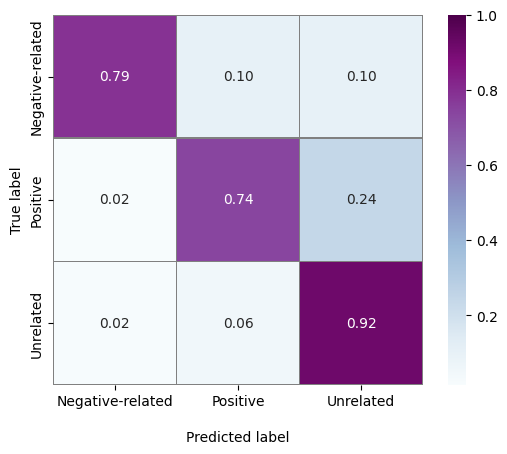

In [ ]:
cm=confusion_matrix(Ylcasses16,y_pred16)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
ax = sns.heatmap(cm, annot=True, fmt='.2f', cmap='BuPu', linewidths=0.3, linecolor='gray', vmax=1.0, square=True) 


ax.set_xlabel('\nPredicted label')
ax.set_ylabel('True label');
classes=['Negative-related', 'Positive', 'Unrelated']
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(classes)
ax.yaxis.set_ticklabels(classes)
# plt.savefig('/content/drive/My Drive/FBHealth/results/figureE3.eps',dpi=300, bbox_inches='tight')
## Display the visualization of the Confusion Matrix.
plt.show()

##SMOTE

###Tokenization Char 1

In [ ]:
X= Vector_char
X, Y=Data_balancing(X, Newdata2['label_cat'].values)
Y = pd.get_dummies(Y).values
y_pred4, Ylcasses4, predicted_targets4, actual_targets4, cvscores4 = CorssValidationfitModel(X, Y,"ProposedCNNModel","C")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores4[:,0]), np.std(cvscores4[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores4[:,1]), np.std(cvscores4[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores4[:,2]), np.std(cvscores4[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores4[:,3]), np.std(cvscores4[:,3])))
print("Specificity: %.3f (+/- %.2f)" % (np.mean(cvscores4[:,4]), np.std(cvscores4[:,4])))

(9000, 2973) (9000,)
Frequency of unique values of the said array:
[[   0    1    2]
 [3000 3000 3000]]
K-fold=  0
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 96: early stopping
Accuracy: Train: 0.963, Test: 0.864
F1: Train: 0.963, Test: 0.872
Precision: Train: 0.963, Test: 0.866
Recall: Train: 0.962, Test: 0.863
Specificity: Train: 0.982, Test: 0.937
K-fold=  1
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 181: early stopping
Accuracy: Train: 0.971, Test: 0.902
F1: Train: 0.970, Test: 0.901
Precision: Train: 0.971, Test: 0.905
Recall: Train: 0.970, Test: 0.901
Specificity: Train: 0.985, Test: 0.952
K-fold=  2
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 170: early stopping
Accuracy: Train: 0.968, Test: 0.872
F1: Train: 0.968, Test: 0.864
Precision: Train: 0.969, Test: 0.874
Recall:

###Tokenization Word 1

In [ ]:
X= Vector_word
X, Y=Data_balancing(X, Newdata2['label_cat'].values)
Y = pd.get_dummies(Y).values
y_pred5, Ylcasses5, predicted_targets5, actual_targets5, cvscores5 = CorssValidationfitModel(X, Y,"ProposedCNNModel","W")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores5[:,0]), np.std(cvscores5[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores5[:,1]), np.std(cvscores5[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores5[:,2]), np.std(cvscores5[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores5[:,3]), np.std(cvscores5[:,3])))
print("Specificity: %.3f (+/- %.2f)" % (np.mean(cvscores5[:,4]), np.std(cvscores5[:,4])))

(9000, 447) (9000,)
Frequency of unique values of the said array:
[[   0    1    2]
 [3000 3000 3000]]
K-fold=  0
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 22: early stopping
Accuracy: Train: 0.993, Test: 0.702
F1: Train: 0.992, Test: 0.713
Precision: Train: 0.993, Test: 0.703
Recall: Train: 0.993, Test: 0.701
Specificity: Train: 0.996, Test: 0.857
K-fold=  1
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 22: early stopping
Accuracy: Train: 0.993, Test: 0.695
F1: Train: 0.992, Test: 0.690
Precision: Train: 0.993, Test: 0.695
Recall: Train: 0.992, Test: 0.693
Specificity: Train: 0.996, Test: 0.846
K-fold=  2
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 28: early stopping
Accuracy: Train: 0.990, Test: 0.694
F1: Train: 0.990, Test: 0.676
Precision: Train: 0.990, Test: 0.701
Recall: Tr

###Tokenization Word + Char 1

In [ ]:
X= np.hstack((Vector_word, Vector_char))
X, Y=Data_balancing(X, Newdata2['label_cat'].values)
Y = pd.get_dummies(Y).values
y_pred6, Ylcasses6, predicted_targets6, actual_targets6, cvscores6 = CorssValidationfitModel(X, Y,"ProposedCNNModel","WC")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores6[:,0]), np.std(cvscores6[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores6[:,1]), np.std(cvscores6[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores6[:,2]), np.std(cvscores6[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores6[:,3]), np.std(cvscores6[:,3])))
print("Specificity: %.3f (+/- %.2f)" % (np.mean(cvscores6[:,4]), np.std(cvscores6[:,4])))

(9000, 3420) (9000,)
Frequency of unique values of the said array:
[[   0    1    2]
 [3000 3000 3000]]
K-fold=  0
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 23: early stopping
Accuracy: Train: 0.996, Test: 0.753
F1: Train: 0.996, Test: 0.751
Precision: Train: 0.996, Test: 0.755
Recall: Train: 0.996, Test: 0.748
Specificity: Train: 0.998, Test: 0.878
K-fold=  1
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 26: early stopping
Accuracy: Train: 0.997, Test: 0.751
F1: Train: 0.997, Test: 0.729
Precision: Train: 0.997, Test: 0.756
Recall: Train: 0.997, Test: 0.744
Specificity: Train: 0.999, Test: 0.876
K-fold=  2
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 23: early stopping
Accuracy: Train: 0.984, Test: 0.688
F1: Train: 0.983, Test: 0.685
Precision: Train: 0.985, Test: 0.691
Recall: T

### Tokenization CountVectorizer Char + Char 1

In [ ]:
X= np.hstack((Vector_char, XContV1))
X, Y=Data_balancing(X, Newdata2['label_cat'].values)
Y = pd.get_dummies(Y).values
y_pred1, Ylcasses1, predicted_targets1, actual_targets1, cvscores1 = CorssValidationfitModel(X, Y,"ProposedCNNModel","C")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores1[:,0]), np.std(cvscores1[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores1[:,1]), np.std(cvscores1[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores1[:,2]), np.std(cvscores1[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores1[:,3]), np.std(cvscores1[:,3])))
print("Specificity: %.3f (+/- %.2f)" % (np.mean(cvscores1[:,4]), np.std(cvscores1[:,4])))

(9000, 3107) (9000,)
Frequency of unique values of the said array:
[[   0    1    2]
 [3000 3000 3000]]
K-fold=  0
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 123: early stopping
Accuracy: Train: 0.978, Test: 0.871
F1: Train: 0.978, Test: 0.878
Precision: Train: 0.978, Test: 0.873
Recall: Train: 0.977, Test: 0.868
Specificity: Train: 0.989, Test: 0.941
K-fold=  1
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 143: early stopping
Accuracy: Train: 0.984, Test: 0.907
F1: Train: 0.984, Test: 0.913
Precision: Train: 0.984, Test: 0.909
Recall: Train: 0.983, Test: 0.905
Specificity: Train: 0.992, Test: 0.957
K-fold=  2
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 108: early stopping
Accuracy: Train: 0.982, Test: 0.885
F1: Train: 0.982, Test: 0.885
Precision: Train: 0.982, Test: 0.887
Recall

###Tokenization CountVectorizer Char + Char 1-2

In [ ]:
X= np.hstack((Vector_char, XContV2))
X, Y=Data_balancing(X, Newdata2['label_cat'].values)
Y = pd.get_dummies(Y).values
y_pred2, Ylcasses2, predicted_targets2, actual_targets2, cvscores2 = CorssValidationfitModel(X, Y,"ProposedCNNModel","C")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores2[:,0]), np.std(cvscores2[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores2[:,1]), np.std(cvscores2[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores2[:,2]), np.std(cvscores2[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores2[:,3]), np.std(cvscores2[:,3])))
print("Specificity: %.3f (+/- %.2f)" % (np.mean(cvscores2[:,4]), np.std(cvscores2[:,4])))

(9000, 4906) (9000,)
Frequency of unique values of the said array:
[[   0    1    2]
 [3000 3000 3000]]
K-fold=  0
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 86: early stopping
Accuracy: Train: 0.975, Test: 0.892
F1: Train: 0.976, Test: 0.889
Precision: Train: 0.976, Test: 0.893
Recall: Train: 0.975, Test: 0.888
Specificity: Train: 0.988, Test: 0.946
K-fold=  1
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 107: early stopping
Accuracy: Train: 0.970, Test: 0.886
F1: Train: 0.970, Test: 0.879
Precision: Train: 0.971, Test: 0.891
Recall: Train: 0.969, Test: 0.884
Specificity: Train: 0.986, Test: 0.942
K-fold=  2
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 167: early stopping
Accuracy: Train: 0.985, Test: 0.885
F1: Train: 0.985, Test: 0.892
Precision: Train: 0.985, Test: 0.887
Recall:

###Tokenization CountVectorizer Char + Char 1-3

In [ ]:
X= np.hstack((Vector_char, XContV3))
X, Y=Data_balancing(X, Newdata2['label_cat'].values)
Y = pd.get_dummies(Y).values
y_pred3, Ylcasses3, predicted_targets3, actual_targets3, cvscores3 = CorssValidationfitModel(X, Y,"ProposedCNNModel","C")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores3[:,0]), np.std(cvscores3[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores3[:,1]), np.std(cvscores3[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores3[:,2]), np.std(cvscores3[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores3[:,3]), np.std(cvscores3[:,3])))
print("Specificity: %.3f (+/- %.2f)" % (np.mean(cvscores3[:,4]), np.std(cvscores3[:,4])))

(9000, 17632) (9000,)
Frequency of unique values of the said array:
[[   0    1    2]
 [3000 3000 3000]]
K-fold=  0
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 106: early stopping
Accuracy: Train: 0.952, Test: 0.884
F1: Train: 0.952, Test: 0.875
Precision: Train: 0.953, Test: 0.886
Recall: Train: 0.951, Test: 0.881
Specificity: Train: 0.977, Test: 0.939
K-fold=  1
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 128: early stopping
Accuracy: Train: 0.964, Test: 0.904
F1: Train: 0.965, Test: 0.911
Precision: Train: 0.965, Test: 0.908
Recall: Train: 0.963, Test: 0.902
Specificity: Train: 0.983, Test: 0.957
K-fold=  2
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 121: early stopping
Accuracy: Train: 0.976, Test: 0.894
F1: Train: 0.977, Test: 0.901
Precision: Train: 0.977, Test: 0.897
Recal

### Tokenization TfidfVectorizer Char + Char 1

In [ ]:
X= np.hstack((Vector_char, XTfidf1))
X, Y=Data_balancing(X, Newdata2['label_cat'].values)
Y = pd.get_dummies(Y).values
y_pred7, Ylcasses7, predicted_targets7, actual_targets7, cvscores7 = CorssValidationfitModel(X, Y,"ProposedCNNModel","C")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores7[:,0]), np.std(cvscores7[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores7[:,1]), np.std(cvscores7[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores7[:,2]), np.std(cvscores7[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores7[:,3]), np.std(cvscores7[:,3])))
print("Specificity: %.3f (+/- %.2f)" % (np.mean(cvscores7[:,4]), np.std(cvscores7[:,4])))

(9000, 3107) (9000,)
Frequency of unique values of the said array:
[[   0    1    2]
 [3000 3000 3000]]
K-fold=  0
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 108: early stopping
Accuracy: Train: 0.952, Test: 0.876
F1: Train: 0.953, Test: 0.875
Precision: Train: 0.954, Test: 0.880
Recall: Train: 0.951, Test: 0.873
Specificity: Train: 0.977, Test: 0.940
K-fold=  1
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 102: early stopping
Accuracy: Train: 0.970, Test: 0.901
F1: Train: 0.970, Test: 0.907
Precision: Train: 0.971, Test: 0.903
Recall: Train: 0.969, Test: 0.899
Specificity: Train: 0.986, Test: 0.955
K-fold=  2
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 81: early stopping
Accuracy: Train: 0.957, Test: 0.875
F1: Train: 0.958, Test: 0.883
Precision: Train: 0.959, Test: 0.879
Recall:

###Tokenization TfidfVectorizer Char + Char 1-2

In [ ]:
X= np.hstack((Vector_char, XTfidf2))
X, Y=Data_balancing(X, Newdata2['label_cat'].values)
Y = pd.get_dummies(Y).values
y_pred8, Ylcasses8, predicted_targets8, actual_targets8, cvscores8 = CorssValidationfitModel(X, Y,"ProposedCNNModel","C")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores8[:,0]), np.std(cvscores8[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores8[:,1]), np.std(cvscores8[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores8[:,2]), np.std(cvscores8[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores8[:,3]), np.std(cvscores8[:,3])))
print("Specificity: %.3f (+/- %.2f)" % (np.mean(cvscores8[:,4]), np.std(cvscores8[:,4])))

(9000, 4906) (9000,)
Frequency of unique values of the said array:
[[   0    1    2]
 [3000 3000 3000]]
K-fold=  0
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 89: early stopping
Accuracy: Train: 0.958, Test: 0.877
F1: Train: 0.958, Test: 0.883
Precision: Train: 0.959, Test: 0.878
Recall: Train: 0.957, Test: 0.873
Specificity: Train: 0.980, Test: 0.943
K-fold=  1
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 106: early stopping
Accuracy: Train: 0.961, Test: 0.890
F1: Train: 0.961, Test: 0.897
Precision: Train: 0.962, Test: 0.892
Recall: Train: 0.960, Test: 0.888
Specificity: Train: 0.981, Test: 0.950
K-fold=  2
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 183: early stopping
Accuracy: Train: 0.984, Test: 0.903
F1: Train: 0.984, Test: 0.908
Precision: Train: 0.984, Test: 0.904
Recall:

###Tokenization TfidfVectorizer Char + Char 1-3

In [ ]:
X= np.hstack((Vector_char, XTfidf3))
X, Y=Data_balancing(X, Newdata2['label_cat'].values)
Y = pd.get_dummies(Y).values
y_pred9, Ylcasses9, predicted_targets9, actual_targets9, cvscores9 = CorssValidationfitModel(X, Y,"ProposedCNNModel","C")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores9[:,0]), np.std(cvscores9[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores9[:,1]), np.std(cvscores9[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores9[:,2]), np.std(cvscores9[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores9[:,3]), np.std(cvscores9[:,3])))
print("Specificity: %.3f (+/- %.2f)" % (np.mean(cvscores9[:,4]), np.std(cvscores9[:,4])))

(9000, 17632) (9000,)
Frequency of unique values of the said array:
[[   0    1    2]
 [3000 3000 3000]]
K-fold=  0
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 92: early stopping
Accuracy: Train: 0.969, Test: 0.894
F1: Train: 0.968, Test: 0.891
Precision: Train: 0.969, Test: 0.895
Recall: Train: 0.967, Test: 0.891
Specificity: Train: 0.985, Test: 0.947
K-fold=  1
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 112: early stopping
Accuracy: Train: 0.962, Test: 0.888
F1: Train: 0.963, Test: 0.895
Precision: Train: 0.964, Test: 0.891
Recall: Train: 0.962, Test: 0.886
Specificity: Train: 0.982, Test: 0.949
K-fold=  2
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 105: early stopping
Accuracy: Train: 0.962, Test: 0.878
F1: Train: 0.962, Test: 0.878
Precision: Train: 0.963, Test: 0.880
Recall

###Tokenization CountVectorizer WORD + WORD 1

In [ ]:
X= np.hstack((Vector_word, XContV1_W))
X, Y=Data_balancing(X, Newdata2['label_cat'].values)
Y = pd.get_dummies(Y).values
y_pred10, Ylcasses10, predicted_targets10, actual_targets10, cvscores10 = CorssValidationfitModel(X, Y,"ProposedCNNModel","W")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores10[:,0]), np.std(cvscores10[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores10[:,1]), np.std(cvscores10[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores10[:,2]), np.std(cvscores10[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores10[:,3]), np.std(cvscores10[:,3])))
print("Specificity: %.3f (+/- %.2f)" % (np.mean(cvscores10[:,4]), np.std(cvscores10[:,4])))

(9000, 1447) (9000,)
Frequency of unique values of the said array:
[[   0    1    2]
 [3000 3000 3000]]
K-fold=  0
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 22: early stopping
Accuracy: Train: 0.994, Test: 0.707
F1: Train: 0.994, Test: 0.694
Precision: Train: 0.994, Test: 0.708
Recall: Train: 0.994, Test: 0.706
Specificity: Train: 0.997, Test: 0.848
K-fold=  1
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 24: early stopping
Accuracy: Train: 0.991, Test: 0.732
F1: Train: 0.991, Test: 0.732
Precision: Train: 0.991, Test: 0.737
Recall: Train: 0.991, Test: 0.724
Specificity: Train: 0.996, Test: 0.871
K-fold=  2
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 23: early stopping
Accuracy: Train: 0.984, Test: 0.729
F1: Train: 0.984, Test: 0.707
Precision: Train: 0.984, Test: 0.732
Recall: T

###Tokenization CountVectorizer WORD + WORD 1-2

In [ ]:
X= np.hstack((Vector_word, XContV2_W))
X, Y=Data_balancing(X, Newdata2['label_cat'].values)
Y = pd.get_dummies(Y).values
y_pred11, Ylcasses11, predicted_targets11, actual_targets11, cvscores11 = CorssValidationfitModel(X, Y,"ProposedCNNModel","W")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores11[:,0]), np.std(cvscores11[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores11[:,1]), np.std(cvscores11[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores11[:,2]), np.std(cvscores11[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores11[:,3]), np.std(cvscores11[:,3])))
print("Specificity: %.3f (+/- %.2f)" % (np.mean(cvscores11[:,4]), np.std(cvscores11[:,4])))

(9000, 1447) (9000,)
Frequency of unique values of the said array:
[[   0    1    2]
 [3000 3000 3000]]
K-fold=  0
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 22: early stopping
Accuracy: Train: 0.990, Test: 0.679
F1: Train: 0.990, Test: 0.668
Precision: Train: 0.990, Test: 0.679
Recall: Train: 0.990, Test: 0.678
Specificity: Train: 0.995, Test: 0.834
K-fold=  1
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 22: early stopping
Accuracy: Train: 0.989, Test: 0.731
F1: Train: 0.989, Test: 0.731
Precision: Train: 0.989, Test: 0.731
Recall: Train: 0.989, Test: 0.728
Specificity: Train: 0.995, Test: 0.867
K-fold=  2
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 27: early stopping
Accuracy: Train: 0.997, Test: 0.736
F1: Train: 0.997, Test: 0.712
Precision: Train: 0.997, Test: 0.741
Recall: T

###Tokenization CountVectorizer WORD + WORD 1-3

In [ ]:
X= np.hstack((Vector_word, XContV3_W))
X, Y=Data_balancing(X, Newdata2['label_cat'].values)
Y = pd.get_dummies(Y).values
y_pred12, Ylcasses12, predicted_targets12, actual_targets12, cvscores12 = CorssValidationfitModel(X, Y,"ProposedCNNModel","W")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores12[:,0]), np.std(cvscores12[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores12[:,1]), np.std(cvscores12[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores12[:,2]), np.std(cvscores12[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores12[:,3]), np.std(cvscores12[:,3])))
print("Specificity: %.3f (+/- %.2f)" % (np.mean(cvscores12[:,4]), np.std(cvscores12[:,4])))

(9000, 1447) (9000,)
Frequency of unique values of the said array:
[[   0    1    2]
 [3000 3000 3000]]
K-fold=  0
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 27: early stopping
Accuracy: Train: 0.975, Test: 0.733
F1: Train: 0.976, Test: 0.727
Precision: Train: 0.976, Test: 0.736
Recall: Train: 0.974, Test: 0.732
Specificity: Train: 0.988, Test: 0.865
K-fold=  1
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 26: early stopping
Accuracy: Train: 0.990, Test: 0.745
F1: Train: 0.989, Test: 0.749
Precision: Train: 0.990, Test: 0.760
Recall: Train: 0.989, Test: 0.738
Specificity: Train: 0.995, Test: 0.883
K-fold=  2
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 29: early stopping
Accuracy: Train: 0.994, Test: 0.743
F1: Train: 0.994, Test: 0.751
Precision: Train: 0.994, Test: 0.743
Recall: T

###Tokenization TfidfVectorizer WORD + WORD 1

In [ ]:
X= np.hstack((Vector_word, XTfidf1_W))
X, Y=Data_balancing(X, Newdata2['label_cat'].values)
Y = pd.get_dummies(Y).values
y_pred13, Ylcasses13, predicted_targets13, actual_targets13, cvscores13 = CorssValidationfitModel(X, Y,"ProposedCNNModel","W")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores13[:,0]), np.std(cvscores13[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores13[:,1]), np.std(cvscores13[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores13[:,2]), np.std(cvscores13[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores13[:,3]), np.std(cvscores13[:,3])))
print("Specificity: %.3f (+/- %.2f)" % (np.mean(cvscores13[:,4]), np.std(cvscores13[:,4])))

(9000, 1447) (9000,)
Frequency of unique values of the said array:
[[   0    1    2]
 [3000 3000 3000]]
K-fold=  0
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 23: early stopping
Accuracy: Train: 0.994, Test: 0.723
F1: Train: 0.994, Test: 0.731
Precision: Train: 0.994, Test: 0.726
Recall: Train: 0.993, Test: 0.716
Specificity: Train: 0.997, Test: 0.869
K-fold=  1
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 22: early stopping
Accuracy: Train: 0.989, Test: 0.734
F1: Train: 0.989, Test: 0.721
Precision: Train: 0.989, Test: 0.737
Recall: Train: 0.989, Test: 0.734
Specificity: Train: 0.995, Test: 0.862
K-fold=  2
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 21: early stopping
Accuracy: Train: 0.995, Test: 0.679
F1: Train: 0.995, Test: 0.676
Precision: Train: 0.995, Test: 0.679
Recall: T

###Tokenization TfidfVectorizer WORD + WORD 1-2

In [ ]:
X= np.hstack((Vector_word, XTfidf2_W))
X, Y=Data_balancing(X, Newdata2['label_cat'].values)
Y = pd.get_dummies(Y).values
y_pred14, Ylcasses14, predicted_targets14, actual_targets14, cvscores14 = CorssValidationfitModel(X, Y,"ProposedCNNModel","W")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores14[:,0]), np.std(cvscores14[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores14[:,1]), np.std(cvscores14[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores14[:,2]), np.std(cvscores14[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores14[:,3]), np.std(cvscores14[:,3])))
print("Specificity: %.3f (+/- %.2f)" % (np.mean(cvscores14[:,4]), np.std(cvscores14[:,4])))

(9000, 1447) (9000,)
Frequency of unique values of the said array:
[[   0    1    2]
 [3000 3000 3000]]
K-fold=  0
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 26: early stopping
Accuracy: Train: 0.989, Test: 0.754
F1: Train: 0.991, Test: 0.714
Precision: Train: 0.993, Test: 0.763
Recall: Train: 0.989, Test: 0.743
Specificity: Train: 0.997, Test: 0.865
K-fold=  1
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 22: early stopping
Accuracy: Train: 0.994, Test: 0.728
F1: Train: 0.994, Test: 0.708
Precision: Train: 0.994, Test: 0.737
Recall: Train: 0.994, Test: 0.724
Specificity: Train: 0.997, Test: 0.859
K-fold=  2
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 21: early stopping
Accuracy: Train: 0.992, Test: 0.704
F1: Train: 0.992, Test: 0.709
Precision: Train: 0.992, Test: 0.708
Recall: T

###Tokenization TfidfVectorizer WORD + WORD 1-3

In [ ]:
X= np.hstack((Vector_word, XTfidf3_W))
X, Y=Data_balancing(X, Newdata2['label_cat'].values)
Y = pd.get_dummies(Y).values
y_pred15, Ylcasses15, predicted_targets15, actual_targets15, cvscores15 = CorssValidationfitModel(X, Y,"ProposedCNNModel","W")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores15[:,0]), np.std(cvscores15[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores15[:,1]), np.std(cvscores15[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores15[:,2]), np.std(cvscores15[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores15[:,3]), np.std(cvscores15[:,3])))
print("Specificity: %.3f (+/- %.2f)" % (np.mean(cvscores15[:,4]), np.std(cvscores15[:,4])))

(9000, 1447) (9000,)
Frequency of unique values of the said array:
[[   0    1    2]
 [3000 3000 3000]]
K-fold=  0
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 24: early stopping
Accuracy: Train: 0.979, Test: 0.725
F1: Train: 0.980, Test: 0.734
Precision: Train: 0.979, Test: 0.726
Recall: Train: 0.979, Test: 0.724
Specificity: Train: 0.990, Test: 0.868
K-fold=  1
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 23: early stopping
Accuracy: Train: 0.987, Test: 0.716
F1: Train: 0.987, Test: 0.694
Precision: Train: 0.987, Test: 0.721
Recall: Train: 0.986, Test: 0.709
Specificity: Train: 0.994, Test: 0.852
K-fold=  2
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 22: early stopping
Accuracy: Train: 0.994, Test: 0.724
F1: Train: 0.995, Test: 0.721
Precision: Train: 0.997, Test: 0.731
Recall: T

###Tokenization CountVectorizer CHAR + WORD 1

In [ ]:
X= np.hstack((Vector_char, XContV1_W))
X, Y=Data_balancing(X, Newdata2['label_cat'].values)
Y = pd.get_dummies(Y).values
y_pred16, Ylcasses16, predicted_targets16, actual_targets16, cvscores16 = CorssValidationfitModel(X, Y,"ProposedCNNModel","WC")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores16[:,0]), np.std(cvscores16[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores16[:,1]), np.std(cvscores16[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores16[:,2]), np.std(cvscores16[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores16[:,3]), np.std(cvscores16[:,3])))
print("Specificity: %.3f (+/- %.2f)" % (np.mean(cvscores16[:,4]), np.std(cvscores16[:,4])))

(9000, 3973) (9000,)
Frequency of unique values of the said array:
[[   0    1    2]
 [3000 3000 3000]]
K-fold=  0
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 136: early stopping
Accuracy: Train: 0.975, Test: 0.889
F1: Train: 0.976, Test: 0.881
Precision: Train: 0.977, Test: 0.892
Recall: Train: 0.975, Test: 0.887
Specificity: Train: 0.989, Test: 0.942
K-fold=  1
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 150: early stopping
Accuracy: Train: 0.974, Test: 0.896
F1: Train: 0.974, Test: 0.902
Precision: Train: 0.974, Test: 0.898
Recall: Train: 0.973, Test: 0.893
Specificity: Train: 0.987, Test: 0.952
K-fold=  2
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 72: early stopping
Accuracy: Train: 0.949, Test: 0.877
F1: Train: 0.950, Test: 0.875
Precision: Train: 0.950, Test: 0.877
Recall:

###Tokenization CountVectorizer CHAR + WORD 1-2

In [ ]:
X= np.hstack((Vector_char, XContV2_W))
X, Y=Data_balancing(X, Newdata2['label_cat'].values)
Y = pd.get_dummies(Y).values
y_pred17, Ylcasses17, predicted_targets17, actual_targets17, cvscores17 = CorssValidationfitModel(X, Y,"ProposedCNNModel","WC")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores17[:,0]), np.std(cvscores17[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores17[:,1]), np.std(cvscores17[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores17[:,2]), np.std(cvscores17[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores17[:,3]), np.std(cvscores17[:,3])))
print("Specificity: %.3f (+/- %.2f)" % (np.mean(cvscores17[:,4]), np.std(cvscores17[:,4])))

(9000, 3973) (9000,)
Frequency of unique values of the said array:
[[   0    1    2]
 [3000 3000 3000]]
K-fold=  0
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 117: early stopping
Accuracy: Train: 0.968, Test: 0.888
F1: Train: 0.968, Test: 0.879
Precision: Train: 0.968, Test: 0.891
Recall: Train: 0.967, Test: 0.884
Specificity: Train: 0.984, Test: 0.942
K-fold=  1
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 124: early stopping
Accuracy: Train: 0.965, Test: 0.904
F1: Train: 0.965, Test: 0.902
Precision: Train: 0.966, Test: 0.906
Recall: Train: 0.963, Test: 0.903
Specificity: Train: 0.983, Test: 0.952
K-fold=  2
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 84: early stopping
Accuracy: Train: 0.960, Test: 0.888
F1: Train: 0.960, Test: 0.879
Precision: Train: 0.961, Test: 0.889
Recall:

###Tokenization CountVectorizer CHAR + WORD 1-3

In [ ]:
X= np.hstack((Vector_char, XContV3_W))
X, Y=Data_balancing(X, Newdata2['label_cat'].values)
Y = pd.get_dummies(Y).values
y_pred18, Ylcasses18, predicted_targets18, actual_targets18, cvscores18 = CorssValidationfitModel(X, Y,"ProposedCNNModel","WC")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores18[:,0]), np.std(cvscores18[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores18[:,1]), np.std(cvscores18[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores18[:,2]), np.std(cvscores18[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores18[:,3]), np.std(cvscores18[:,3])))
print("Specificity: %.3f (+/- %.2f)" % (np.mean(cvscores18[:,4]), np.std(cvscores18[:,4])))

(9000, 3973) (9000,)
Frequency of unique values of the said array:
[[   0    1    2]
 [3000 3000 3000]]
K-fold=  0
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 96: early stopping
Accuracy: Train: 0.974, Test: 0.893
F1: Train: 0.974, Test: 0.891
Precision: Train: 0.975, Test: 0.894
Recall: Train: 0.974, Test: 0.891
Specificity: Train: 0.987, Test: 0.947
K-fold=  1
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 125: early stopping
Accuracy: Train: 0.968, Test: 0.889
F1: Train: 0.968, Test: 0.889
Precision: Train: 0.969, Test: 0.892
Recall: Train: 0.967, Test: 0.888
Specificity: Train: 0.984, Test: 0.946
K-fold=  2
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 83: early stopping
Accuracy: Train: 0.960, Test: 0.883
F1: Train: 0.961, Test: 0.890
Precision: Train: 0.962, Test: 0.885
Recall: 

###Tokenization TfidfVectorizer CHAR + WORD 1

In [ ]:
X= np.hstack((Vector_char, XTfidf1_W))
X, Y=Data_balancing(X, Newdata2['label_cat'].values)
Y = pd.get_dummies(Y).values
y_pred19, Ylcasses19, predicted_targets19, actual_targets19, cvscores19 = CorssValidationfitModel(X, Y,"ProposedCNNModel","WC")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores19[:,0]), np.std(cvscores19[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores19[:,1]), np.std(cvscores19[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores19[:,2]), np.std(cvscores19[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores19[:,3]), np.std(cvscores19[:,3])))
print("Specificity: %.3f (+/- %.2f)" % (np.mean(cvscores19[:,4]), np.std(cvscores19[:,4])))

(9000, 3973) (9000,)
Frequency of unique values of the said array:
[[   0    1    2]
 [3000 3000 3000]]
K-fold=  0
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 155: early stopping
Accuracy: Train: 0.963, Test: 0.879
F1: Train: 0.964, Test: 0.885
Precision: Train: 0.964, Test: 0.880
Recall: Train: 0.962, Test: 0.876
Specificity: Train: 0.982, Test: 0.944
K-fold=  1
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 160: early stopping
Accuracy: Train: 0.979, Test: 0.911
F1: Train: 0.979, Test: 0.908
Precision: Train: 0.980, Test: 0.911
Recall: Train: 0.978, Test: 0.909
Specificity: Train: 0.990, Test: 0.954
K-fold=  2
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 95: early stopping
Accuracy: Train: 0.967, Test: 0.889
F1: Train: 0.967, Test: 0.888
Precision: Train: 0.968, Test: 0.892
Recall:

###Tokenization TfidfVectorizer CHAR + WORD 1-2

In [ ]:
X= np.hstack((Vector_char, XTfidf2_W))
X, Y=Data_balancing(X, Newdata2['label_cat'].values)
Y = pd.get_dummies(Y).values
y_pred20, Ylcasses20, predicted_targets20, actual_targets20, cvscores20 = CorssValidationfitModel(X, Y,"ProposedCNNModel","WC")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores20[:,0]), np.std(cvscores20[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores20[:,1]), np.std(cvscores20[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores20[:,2]), np.std(cvscores20[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores20[:,3]), np.std(cvscores20[:,3])))
print("Specificity: %.3f (+/- %.2f)" % (np.mean(cvscores20[:,4]), np.std(cvscores20[:,4])))

(9000, 3973) (9000,)
Frequency of unique values of the said array:
[[   0    1    2]
 [3000 3000 3000]]
K-fold=  0
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 123: early stopping
Accuracy: Train: 0.964, Test: 0.879
F1: Train: 0.963, Test: 0.862
Precision: Train: 0.965, Test: 0.881
Recall: Train: 0.963, Test: 0.876
Specificity: Train: 0.982, Test: 0.933
K-fold=  1
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 139: early stopping
Accuracy: Train: 0.973, Test: 0.906
F1: Train: 0.973, Test: 0.905
Precision: Train: 0.974, Test: 0.910
Recall: Train: 0.972, Test: 0.904
Specificity: Train: 0.987, Test: 0.954
K-fold=  2
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 160: early stopping
Accuracy: Train: 0.975, Test: 0.877
F1: Train: 0.975, Test: 0.877
Precision: Train: 0.975, Test: 0.879
Recall

###Tokenization TfidfVectorizer CHAR + WORD 1-3

In [ ]:
X= np.hstack((Vector_char, XTfidf3_W))
X, Y=Data_balancing(X, Newdata2['label_cat'].values)
Y = pd.get_dummies(Y).values
y_pred21, Ylcasses21, predicted_targets21, actual_targets21, cvscores21 = CorssValidationfitModel(X, Y,"ProposedCNNModel","WC")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores21[:,0]), np.std(cvscores21[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores21[:,1]), np.std(cvscores21[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores21[:,2]), np.std(cvscores21[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores21[:,3]), np.std(cvscores21[:,3])))
print("Specificity: %.3f (+/- %.2f)" % (np.mean(cvscores21[:,4]), np.std(cvscores21[:,4])))

(9000, 3973) (9000,)
Frequency of unique values of the said array:
[[   0    1    2]
 [3000 3000 3000]]
K-fold=  0
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 104: early stopping
Accuracy: Train: 0.972, Test: 0.891
F1: Train: 0.971, Test: 0.887
Precision: Train: 0.972, Test: 0.892
Recall: Train: 0.971, Test: 0.885
Specificity: Train: 0.986, Test: 0.946
K-fold=  1
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 121: early stopping
Accuracy: Train: 0.978, Test: 0.897
F1: Train: 0.978, Test: 0.902
Precision: Train: 0.979, Test: 0.897
Recall: Train: 0.977, Test: 0.893
Specificity: Train: 0.989, Test: 0.952
K-fold=  2
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 101: early stopping
Accuracy: Train: 0.968, Test: 0.883
F1: Train: 0.968, Test: 0.873
Precision: Train: 0.970, Test: 0.883
Recall

###CM

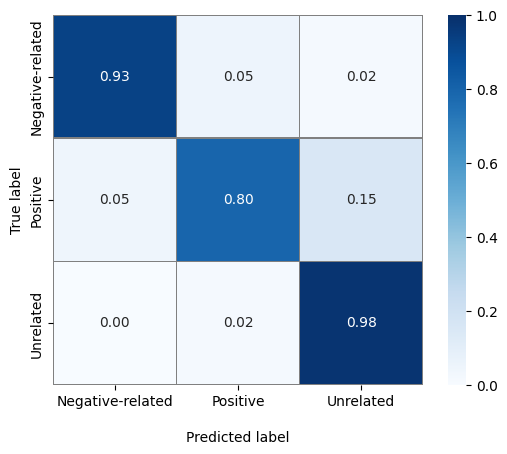

In [ ]:
import matplotlib as mpl
label_size = 15
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'
import seaborn as sns
from sklearn.metrics import confusion_matrix
mpl.rcParams.update(mpl.rcParamsDefault)
cm=confusion_matrix(Ylcasses19,y_pred19)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
ax = sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', linewidths=0.3, linecolor='gray', vmax=1.0, square=True)


ax.set_xlabel('\nPredicted label')
ax.set_ylabel('True label');
classes=['Negative-related', 'Positive', 'Unrelated']
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(classes)
ax.yaxis.set_ticklabels(classes)
# plt.savefig('/content/drive/My Drive/FBHealth/results/figureE4.eps',dpi=300, bbox_inches='tight')
## Display the visualization of the Confusion Matrix.
plt.show()

##Random Over Sampling

###Tokenization Char 1

In [ ]:
X= Vector_char
X, Y=Data_balancingROS(X, Newdata2['label_cat'].values)
Y = pd.get_dummies(Y).values
y_pred4, Ylcasses4, predicted_targets4, actual_targets4, cvscores4 = CorssValidationfitModel(X, Y,"ProposedCNNModel","C")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores4[:,0]), np.std(cvscores4[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores4[:,1]), np.std(cvscores4[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores4[:,2]), np.std(cvscores4[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores4[:,3]), np.std(cvscores4[:,3])))
print("Specificity: %.3f (+/- %.2f)" % (np.mean(cvscores4[:,4]), np.std(cvscores4[:,4])))

(9000, 2973) (9000,)
Frequency of unique values of the said array:
[[   0    1    2]
 [3000 3000 3000]]
K-fold=  0
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 133: early stopping
Accuracy: Train: 0.990, Test: 0.947
F1: Train: 0.990, Test: 0.935
Precision: Train: 0.990, Test: 0.947
Recall: Train: 0.990, Test: 0.947
Specificity: Train: 0.995, Test: 0.967
K-fold=  1
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 82: early stopping
Accuracy: Train: 0.983, Test: 0.947
F1: Train: 0.983, Test: 0.951
Precision: Train: 0.984, Test: 0.948
Recall: Train: 0.983, Test: 0.947
Specificity: Train: 0.992, Test: 0.976
K-fold=  2
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 134: early stopping
Accuracy: Train: 0.990, Test: 0.961
F1: Train: 0.990, Test: 0.964
Precision: Train: 0.990, Test: 0.962
Recall:

###Tokenization Word 1

In [ ]:
X= Vector_word
X, Y=Data_balancingROS(X, Newdata2['label_cat'].values)
Y = pd.get_dummies(Y).values
y_pred5, Ylcasses5, predicted_targets5, actual_targets5, cvscores5 = CorssValidationfitModel(X, Y,"ProposedCNNModel","W")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores5[:,0]), np.std(cvscores5[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores5[:,1]), np.std(cvscores5[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores5[:,2]), np.std(cvscores5[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores5[:,3]), np.std(cvscores5[:,3])))
print("Specificity: %.3f (+/- %.2f)" % (np.mean(cvscores5[:,4]), np.std(cvscores5[:,4])))

(9000, 447) (9000,)
Frequency of unique values of the said array:
[[   0    1    2]
 [3000 3000 3000]]
K-fold=  0
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 31: early stopping
Accuracy: Train: 1.000, Test: 0.958
F1: Train: 1.000, Test: 0.953
Precision: Train: 1.000, Test: 0.958
Recall: Train: 1.000, Test: 0.958
Specificity: Train: 1.000, Test: 0.977
K-fold=  1
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 31: early stopping
Accuracy: Train: 0.999, Test: 0.966
F1: Train: 0.999, Test: 0.968
Precision: Train: 0.999, Test: 0.967
Recall: Train: 0.999, Test: 0.965
Specificity: Train: 1.000, Test: 0.984
K-fold=  2
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 30: early stopping
Accuracy: Train: 0.999, Test: 0.956
F1: Train: 0.999, Test: 0.959
Precision: Train: 0.999, Test: 0.956
Recall: Tr

###Tokenization Word + Char 1

In [ ]:
X= np.hstack((Vector_word, Vector_char))
X, Y=Data_balancingROS(X, Newdata2['label_cat'].values)
Y = pd.get_dummies(Y).values
y_pred6, Ylcasses6, predicted_targets6, actual_targets6, cvscores6 = CorssValidationfitModel(X, Y,"ProposedCNNModel","WC")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores6[:,0]), np.std(cvscores6[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores6[:,1]), np.std(cvscores6[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores6[:,2]), np.std(cvscores6[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores6[:,3]), np.std(cvscores6[:,3])))
print("Specificity: %.3f (+/- %.2f)" % (np.mean(cvscores6[:,4]), np.std(cvscores6[:,4])))

(9000, 3420) (9000,)
Frequency of unique values of the said array:
[[   0    1    2]
 [3000 3000 3000]]
K-fold=  0
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 27: early stopping
Accuracy: Train: 0.998, Test: 0.952
F1: Train: 0.998, Test: 0.955
Precision: Train: 0.998, Test: 0.952
Recall: Train: 0.998, Test: 0.952
Specificity: Train: 0.999, Test: 0.978
K-fold=  1
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 64: early stopping
Accuracy: Train: 1.000, Test: 0.942
F1: Train: 1.000, Test: 0.937
Precision: Train: 1.000, Test: 0.942
Recall: Train: 1.000, Test: 0.941
Specificity: Train: 1.000, Test: 0.969
K-fold=  2
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 37: early stopping
Accuracy: Train: 1.000, Test: 0.944
F1: Train: 1.000, Test: 0.949
Precision: Train: 1.000, Test: 0.949
Recall: T

### Tokenization CountVectorizer Char + Char 1

In [ ]:
X= np.hstack((Vector_char, XContV1))
X, Y=Data_balancingROS(X, Newdata2['label_cat'].values)
Y = pd.get_dummies(Y).values
y_pred1, Ylcasses1, predicted_targets1, actual_targets1, cvscores1 = CorssValidationfitModel(X, Y,"ProposedCNNModel","C")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores1[:,0]), np.std(cvscores1[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores1[:,1]), np.std(cvscores1[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores1[:,2]), np.std(cvscores1[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores1[:,3]), np.std(cvscores1[:,3])))
print("Specificity: %.3f (+/- %.2f)" % (np.mean(cvscores1[:,4]), np.std(cvscores1[:,4])))

(9000, 3107) (9000,)
Frequency of unique values of the said array:
[[   0    1    2]
 [3000 3000 3000]]
K-fold=  0
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 121: early stopping
Accuracy: Train: 0.992, Test: 0.957
F1: Train: 0.992, Test: 0.945
Precision: Train: 0.992, Test: 0.958
Recall: Train: 0.992, Test: 0.957
Specificity: Train: 0.996, Test: 0.973
K-fold=  1
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 105: early stopping
Accuracy: Train: 0.990, Test: 0.956
F1: Train: 0.990, Test: 0.959
Precision: Train: 0.990, Test: 0.957
Recall: Train: 0.990, Test: 0.956
Specificity: Train: 0.995, Test: 0.980
K-fold=  2
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 84: early stopping
Accuracy: Train: 0.989, Test: 0.954
F1: Train: 0.989, Test: 0.957
Precision: Train: 0.989, Test: 0.954
Recall:

###Tokenization CountVectorizer Char + Char 1-2

In [ ]:
X= np.hstack((Vector_char, XContV2))
X, Y=Data_balancingROS(X, Newdata2['label_cat'].values)
Y = pd.get_dummies(Y).values
y_pred2, Ylcasses2, predicted_targets2, actual_targets2, cvscores2 = CorssValidationfitModel(X, Y,"ProposedCNNModel","C")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores2[:,0]), np.std(cvscores2[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores2[:,1]), np.std(cvscores2[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores2[:,2]), np.std(cvscores2[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores2[:,3]), np.std(cvscores2[:,3])))
print("Specificity: %.3f (+/- %.2f)" % (np.mean(cvscores2[:,4]), np.std(cvscores2[:,4])))

(9000, 4906) (9000,)
Frequency of unique values of the said array:
[[   0    1    2]
 [3000 3000 3000]]
K-fold=  0
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 110: early stopping
Accuracy: Train: 0.993, Test: 0.969
F1: Train: 0.993, Test: 0.971
Precision: Train: 0.993, Test: 0.969
Recall: Train: 0.993, Test: 0.969
Specificity: Train: 0.996, Test: 0.985
K-fold=  1
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 141: early stopping
Accuracy: Train: 0.987, Test: 0.946
F1: Train: 0.987, Test: 0.949
Precision: Train: 0.987, Test: 0.946
Recall: Train: 0.987, Test: 0.946
Specificity: Train: 0.994, Test: 0.975
K-fold=  2
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 138: early stopping
Accuracy: Train: 0.993, Test: 0.964
F1: Train: 0.993, Test: 0.966
Precision: Train: 0.993, Test: 0.964
Recall

###Tokenization CountVectorizer Char + Char 1-3

In [ ]:
X= np.hstack((Vector_char, XContV3))
X, Y=Data_balancingROS(X, Newdata2['label_cat'].values)
Y = pd.get_dummies(Y).values
y_pred3, Ylcasses3, predicted_targets3, actual_targets3, cvscores3 = CorssValidationfitModel(X, Y,"ProposedCNNModel","C")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores3[:,0]), np.std(cvscores3[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores3[:,1]), np.std(cvscores3[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores3[:,2]), np.std(cvscores3[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores3[:,3]), np.std(cvscores3[:,3])))
print("Specificity: %.3f (+/- %.2f)" % (np.mean(cvscores3[:,4]), np.std(cvscores3[:,4])))

(9000, 17632) (9000,)
Frequency of unique values of the said array:
[[   0    1    2]
 [3000 3000 3000]]
K-fold=  0
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 108: early stopping
Accuracy: Train: 0.990, Test: 0.947
F1: Train: 0.990, Test: 0.951
Precision: Train: 0.990, Test: 0.947
Recall: Train: 0.989, Test: 0.947
Specificity: Train: 0.995, Test: 0.975
K-fold=  1
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 151: early stopping
Accuracy: Train: 0.989, Test: 0.954
F1: Train: 0.990, Test: 0.957
Precision: Train: 0.990, Test: 0.955
Recall: Train: 0.989, Test: 0.954
Specificity: Train: 0.995, Test: 0.979
K-fold=  2
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 161: early stopping
Accuracy: Train: 0.991, Test: 0.963
F1: Train: 0.991, Test: 0.966
Precision: Train: 0.991, Test: 0.963
Recal

###Tokenization TfidfVectorizer Char + Char 1

In [ ]:
X= np.hstack((Vector_char, XTfidf1))
X, Y=Data_balancingROS(X, Newdata2['label_cat'].values)
Y = pd.get_dummies(Y).values
y_pred7, Ylcasses7, predicted_targets7, actual_targets7, cvscores7 = CorssValidationfitModel(X, Y,"ProposedCNNModel","C")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores7[:,0]), np.std(cvscores7[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores7[:,1]), np.std(cvscores7[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores7[:,2]), np.std(cvscores7[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores7[:,3]), np.std(cvscores7[:,3])))
print("Specificity: %.3f (+/- %.2f)" % (np.mean(cvscores7[:,4]), np.std(cvscores7[:,4])))

(9000, 3107) (9000,)
Frequency of unique values of the said array:
[[   0    1    2]
 [3000 3000 3000]]
K-fold=  0
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 92: early stopping
Accuracy: Train: 0.993, Test: 0.966
F1: Train: 0.992, Test: 0.968
Precision: Train: 0.993, Test: 0.966
Recall: Train: 0.993, Test: 0.966
Specificity: Train: 0.996, Test: 0.984
K-fold=  1
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 95: early stopping
Accuracy: Train: 0.991, Test: 0.958
F1: Train: 0.991, Test: 0.953
Precision: Train: 0.991, Test: 0.958
Recall: Train: 0.991, Test: 0.958
Specificity: Train: 0.995, Test: 0.977
K-fold=  2
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 125: early stopping
Accuracy: Train: 0.986, Test: 0.947
F1: Train: 0.987, Test: 0.950
Precision: Train: 0.987, Test: 0.947
Recall: 

###Tokenization TfidfVectorizer Char + Char 1-2

In [ ]:
X= np.hstack((Vector_char, XTfidf2))
X, Y=Data_balancingROS(X, Newdata2['label_cat'].values)
Y = pd.get_dummies(Y).values
y_pred8, Ylcasses8, predicted_targets8, actual_targets8, cvscores8 = CorssValidationfitModel(X, Y,"ProposedCNNModel","C")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores8[:,0]), np.std(cvscores8[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores8[:,1]), np.std(cvscores8[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores8[:,2]), np.std(cvscores8[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores8[:,3]), np.std(cvscores8[:,3])))
print("Specificity: %.3f (+/- %.2f)" % (np.mean(cvscores8[:,4]), np.std(cvscores8[:,4])))

(9000, 4906) (9000,)
Frequency of unique values of the said array:
[[   0    1    2]
 [3000 3000 3000]]
K-fold=  0
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 164: early stopping
Accuracy: Train: 0.996, Test: 0.969
F1: Train: 0.996, Test: 0.971
Precision: Train: 0.996, Test: 0.969
Recall: Train: 0.996, Test: 0.969
Specificity: Train: 0.998, Test: 0.986
K-fold=  1
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 125: early stopping
Accuracy: Train: 0.991, Test: 0.957
F1: Train: 0.992, Test: 0.960
Precision: Train: 0.992, Test: 0.957
Recall: Train: 0.991, Test: 0.957
Specificity: Train: 0.996, Test: 0.980
K-fold=  2
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 95: early stopping
Accuracy: Train: 0.988, Test: 0.963
F1: Train: 0.989, Test: 0.965
Precision: Train: 0.988, Test: 0.963
Recall:

###Tokenization TfidfVectorizer Char + Char 1-3

In [ ]:
X= np.hstack((Vector_char, XTfidf3))
X, Y=Data_balancingROS(X, Newdata2['label_cat'].values)
Y = pd.get_dummies(Y).values
y_pred9, Ylcasses9, predicted_targets9, actual_targets9, cvscores9 = CorssValidationfitModel(X, Y,"ProposedCNNModel","C")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores9[:,0]), np.std(cvscores9[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores9[:,1]), np.std(cvscores9[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores9[:,2]), np.std(cvscores9[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores9[:,3]), np.std(cvscores9[:,3])))
print("Specificity: %.3f (+/- %.2f)" % (np.mean(cvscores9[:,4]), np.std(cvscores9[:,4])))

(9000, 17632) (9000,)
Frequency of unique values of the said array:
[[   0    1    2]
 [3000 3000 3000]]
K-fold=  0
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 116: early stopping
Accuracy: Train: 0.993, Test: 0.960
F1: Train: 0.993, Test: 0.962
Precision: Train: 0.993, Test: 0.960
Recall: Train: 0.993, Test: 0.959
Specificity: Train: 0.997, Test: 0.981
K-fold=  1
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 119: early stopping
Accuracy: Train: 0.984, Test: 0.947
F1: Train: 0.984, Test: 0.951
Precision: Train: 0.984, Test: 0.948
Recall: Train: 0.984, Test: 0.947
Specificity: Train: 0.992, Test: 0.976
K-fold=  2
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 130: early stopping
Accuracy: Train: 0.994, Test: 0.971
F1: Train: 0.994, Test: 0.972
Precision: Train: 0.994, Test: 0.971
Recal

###Tokenization CountVectorizer WORD + WORD 1

In [ ]:
X= np.hstack((Vector_word, XContV1_W))
X, Y=Data_balancingROS(X, Newdata2['label_cat'].values)
Y = pd.get_dummies(Y).values
y_pred10, Ylcasses10, predicted_targets10, actual_targets10, cvscores10 = CorssValidationfitModel(X, Y,"ProposedCNNModel","W")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores10[:,0]), np.std(cvscores10[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores10[:,1]), np.std(cvscores10[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores10[:,2]), np.std(cvscores10[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores10[:,3]), np.std(cvscores10[:,3])))
print("Specificity: %.3f (+/- %.2f)" % (np.mean(cvscores10[:,4]), np.std(cvscores10[:,4])))

(9000, 1447) (9000,)
Frequency of unique values of the said array:
[[   0    1    2]
 [3000 3000 3000]]
K-fold=  0
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 31: early stopping
Accuracy: Train: 0.999, Test: 0.950
F1: Train: 0.999, Test: 0.953
Precision: Train: 0.999, Test: 0.950
Recall: Train: 0.999, Test: 0.950
Specificity: Train: 1.000, Test: 0.977
K-fold=  1
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 35: early stopping
Accuracy: Train: 0.999, Test: 0.963
F1: Train: 0.999, Test: 0.965
Precision: Train: 0.999, Test: 0.963
Recall: Train: 0.999, Test: 0.963
Specificity: Train: 1.000, Test: 0.983
K-fold=  2
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 34: early stopping
Accuracy: Train: 1.000, Test: 0.950
F1: Train: 1.000, Test: 0.953
Precision: Train: 1.000, Test: 0.950
Recall: T

###Tokenization CountVectorizer WORD + WORD 1-2

In [ ]:
X= np.hstack((Vector_word, XContV2_W))
X, Y=Data_balancingROS(X, Newdata2['label_cat'].values)
Y = pd.get_dummies(Y).values
y_pred11, Ylcasses11, predicted_targets11, actual_targets11, cvscores11 = CorssValidationfitModel(X, Y,"ProposedCNNModel","W")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores11[:,0]), np.std(cvscores11[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores11[:,1]), np.std(cvscores11[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores11[:,2]), np.std(cvscores11[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores11[:,3]), np.std(cvscores11[:,3])))
print("Specificity: %.3f (+/- %.2f)" % (np.mean(cvscores11[:,4]), np.std(cvscores11[:,4])))

(9000, 1447) (9000,)
Frequency of unique values of the said array:
[[   0    1    2]
 [3000 3000 3000]]
K-fold=  0
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 33: early stopping
Accuracy: Train: 1.000, Test: 0.969
F1: Train: 1.000, Test: 0.971
Precision: Train: 1.000, Test: 0.970
Recall: Train: 1.000, Test: 0.968
Specificity: Train: 1.000, Test: 0.986
K-fold=  1
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 32: early stopping
Accuracy: Train: 0.999, Test: 0.964
F1: Train: 0.999, Test: 0.967
Precision: Train: 0.999, Test: 0.964
Recall: Train: 0.999, Test: 0.964
Specificity: Train: 1.000, Test: 0.983
K-fold=  2
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 25: early stopping
Accuracy: Train: 0.999, Test: 0.957
F1: Train: 0.999, Test: 0.959
Precision: Train: 0.999, Test: 0.957
Recall: T

###Tokenization CountVectorizer WORD + WORD 1-3

In [ ]:
X= np.hstack((Vector_word, XContV3_W))
X, Y=Data_balancingROS(X, Newdata2['label_cat'].values)
Y = pd.get_dummies(Y).values
y_pred12, Ylcasses12, predicted_targets12, actual_targets12, cvscores12 = CorssValidationfitModel(X, Y,"ProposedCNNModel","W")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores12[:,0]), np.std(cvscores12[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores12[:,1]), np.std(cvscores12[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores12[:,2]), np.std(cvscores12[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores12[:,3]), np.std(cvscores12[:,3])))
print("Specificity: %.3f (+/- %.2f)" % (np.mean(cvscores12[:,4]), np.std(cvscores12[:,4])))

(9000, 1447) (9000,)
Frequency of unique values of the said array:
[[   0    1    2]
 [3000 3000 3000]]
K-fold=  0
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 30: early stopping
Accuracy: Train: 1.000, Test: 0.973
F1: Train: 1.000, Test: 0.975
Precision: Train: 1.000, Test: 0.974
Recall: Train: 1.000, Test: 0.973
Specificity: Train: 1.000, Test: 0.988
K-fold=  1
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 30: early stopping
Accuracy: Train: 1.000, Test: 0.978
F1: Train: 1.000, Test: 0.980
Precision: Train: 1.000, Test: 0.979
Recall: Train: 1.000, Test: 0.978
Specificity: Train: 1.000, Test: 0.990
K-fold=  2
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 34: early stopping
Accuracy: Train: 1.000, Test: 0.957
F1: Train: 1.000, Test: 0.960
Precision: Train: 1.000, Test: 0.957
Recall: T

###Tokenization TfidfVectorizer WORD + WORD 1

In [ ]:
X= np.hstack((Vector_word, XTfidf1_W))
X, Y=Data_balancingROS(X, Newdata2['label_cat'].values)
Y = pd.get_dummies(Y).values
y_pred13, Ylcasses13, predicted_targets13, actual_targets13, cvscores13 = CorssValidationfitModel(X, Y,"ProposedCNNModel","W")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores13[:,0]), np.std(cvscores13[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores13[:,1]), np.std(cvscores13[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores13[:,2]), np.std(cvscores13[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores13[:,3]), np.std(cvscores13[:,3])))
print("Specificity: %.3f (+/- %.2f)" % (np.mean(cvscores13[:,4]), np.std(cvscores13[:,4])))

(9000, 1447) (9000,)
Frequency of unique values of the said array:
[[   0    1    2]
 [3000 3000 3000]]
K-fold=  0
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 32: early stopping
Accuracy: Train: 1.000, Test: 0.967
F1: Train: 1.000, Test: 0.969
Precision: Train: 1.000, Test: 0.967
Recall: Train: 1.000, Test: 0.967
Specificity: Train: 1.000, Test: 0.985
K-fold=  1
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 37: early stopping
Accuracy: Train: 0.999, Test: 0.941
F1: Train: 0.999, Test: 0.944
Precision: Train: 0.999, Test: 0.941
Recall: Train: 0.999, Test: 0.941
Specificity: Train: 1.000, Test: 0.972
K-fold=  2
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 31: early stopping
Accuracy: Train: 1.000, Test: 0.963
F1: Train: 1.000, Test: 0.965
Precision: Train: 1.000, Test: 0.963
Recall: T

###Tokenization TfidfVectorizer WORD + WORD 1-2

In [ ]:
X= np.hstack((Vector_word, XTfidf2_W))
X, Y=Data_balancingROS(X, Newdata2['label_cat'].values)
Y = pd.get_dummies(Y).values
y_pred14, Ylcasses14, predicted_targets14, actual_targets14, cvscores14 = CorssValidationfitModel(X, Y,"ProposedCNNModel","W")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores14[:,0]), np.std(cvscores14[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores14[:,1]), np.std(cvscores14[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores14[:,2]), np.std(cvscores14[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores14[:,3]), np.std(cvscores14[:,3])))
print("Specificity: %.3f (+/- %.2f)" % (np.mean(cvscores14[:,4]), np.std(cvscores14[:,4])))

(9000, 1447) (9000,)
Frequency of unique values of the said array:
[[   0    1    2]
 [3000 3000 3000]]
K-fold=  0
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 25: early stopping
Accuracy: Train: 0.999, Test: 0.957
F1: Train: 0.999, Test: 0.959
Precision: Train: 0.999, Test: 0.957
Recall: Train: 0.999, Test: 0.957
Specificity: Train: 1.000, Test: 0.980
K-fold=  1
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 27: early stopping
Accuracy: Train: 0.999, Test: 0.971
F1: Train: 0.999, Test: 0.973
Precision: Train: 0.999, Test: 0.971
Recall: Train: 0.999, Test: 0.971
Specificity: Train: 1.000, Test: 0.986
K-fold=  2
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 29: early stopping
Accuracy: Train: 1.000, Test: 0.969
F1: Train: 1.000, Test: 0.972
Precision: Train: 1.000, Test: 0.974
Recall: T

###Tokenization TfidfVectorizer WORD + WORD 1-3

In [ ]:
X= np.hstack((Vector_word, XTfidf3_W))
X, Y=Data_balancingROS(X, Newdata2['label_cat'].values)
Y = pd.get_dummies(Y).values
y_pred15, Ylcasses15, predicted_targets15, actual_targets15, cvscores15 = CorssValidationfitModel(X, Y,"ProposedCNNModel","W")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores15[:,0]), np.std(cvscores15[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores15[:,1]), np.std(cvscores15[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores15[:,2]), np.std(cvscores15[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores15[:,3]), np.std(cvscores15[:,3])))
print("Specificity: %.3f (+/- %.2f)" % (np.mean(cvscores15[:,4]), np.std(cvscores15[:,4])))

(9000, 1447) (9000,)
Frequency of unique values of the said array:
[[   0    1    2]
 [3000 3000 3000]]
K-fold=  0
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 34: early stopping
Accuracy: Train: 1.000, Test: 0.977
F1: Train: 1.000, Test: 0.978
Precision: Train: 1.000, Test: 0.977
Recall: Train: 1.000, Test: 0.977
Specificity: Train: 1.000, Test: 0.989
K-fold=  1
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 41: early stopping
Accuracy: Train: 1.000, Test: 0.964
F1: Train: 1.000, Test: 0.967
Precision: Train: 1.000, Test: 0.964
Recall: Train: 1.000, Test: 0.964
Specificity: Train: 1.000, Test: 0.983
K-fold=  2
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 41: early stopping
Accuracy: Train: 1.000, Test: 0.958
F1: Train: 1.000, Test: 0.961
Precision: Train: 1.000, Test: 0.959
Recall: T

###Tokenization CountVectorizer CHAR + WORD 1

In [ ]:
X= np.hstack((Vector_char, XContV1_W))
X, Y=Data_balancingROS(X, Newdata2['label_cat'].values)
Y = pd.get_dummies(Y).values
y_pred16, Ylcasses16, predicted_targets16, actual_targets16, cvscores16 = CorssValidationfitModel(X, Y,"ProposedCNNModel","WC")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores16[:,0]), np.std(cvscores16[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores16[:,1]), np.std(cvscores16[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores16[:,2]), np.std(cvscores16[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores16[:,3]), np.std(cvscores16[:,3])))
print("Specificity: %.3f (+/- %.2f)" % (np.mean(cvscores16[:,4]), np.std(cvscores16[:,4])))

(9000, 3973) (9000,)
Frequency of unique values of the said array:
[[   0    1    2]
 [3000 3000 3000]]
K-fold=  0
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 120: early stopping
Accuracy: Train: 0.993, Test: 0.954
F1: Train: 0.993, Test: 0.957
Precision: Train: 0.993, Test: 0.954
Recall: Train: 0.993, Test: 0.953
Specificity: Train: 0.997, Test: 0.979
K-fold=  1
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 100: early stopping
Accuracy: Train: 0.989, Test: 0.956
F1: Train: 0.989, Test: 0.959
Precision: Train: 0.989, Test: 0.956
Recall: Train: 0.989, Test: 0.956
Specificity: Train: 0.995, Test: 0.979
K-fold=  2
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 143: early stopping
Accuracy: Train: 0.993, Test: 0.970
F1: Train: 0.993, Test: 0.972
Precision: Train: 0.993, Test: 0.971
Recall

###Tokenization CountVectorizer CHAR + WORD 1-2

In [ ]:
X= np.hstack((Vector_char, XContV2_W))
X, Y=Data_balancingROS(X, Newdata2['label_cat'].values)
Y = pd.get_dummies(Y).values
y_pred17, Ylcasses17, predicted_targets17, actual_targets17, cvscores17 = CorssValidationfitModel(X, Y,"ProposedCNNModel","WC")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores17[:,0]), np.std(cvscores17[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores17[:,1]), np.std(cvscores17[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores17[:,2]), np.std(cvscores17[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores17[:,3]), np.std(cvscores17[:,3])))
print("Specificity: %.3f (+/- %.2f)" % (np.mean(cvscores17[:,4]), np.std(cvscores17[:,4])))

(9000, 3973) (9000,)
Frequency of unique values of the said array:
[[   0    1    2]
 [3000 3000 3000]]
K-fold=  0
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 116: early stopping
Accuracy: Train: 0.992, Test: 0.964
F1: Train: 0.992, Test: 0.966
Precision: Train: 0.992, Test: 0.964
Recall: Train: 0.992, Test: 0.963
Specificity: Train: 0.996, Test: 0.983
K-fold=  1
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 138: early stopping
Accuracy: Train: 0.994, Test: 0.966
F1: Train: 0.994, Test: 0.960
Precision: Train: 0.994, Test: 0.966
Recall: Train: 0.994, Test: 0.965
Specificity: Train: 0.997, Test: 0.980
K-fold=  2
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 117: early stopping
Accuracy: Train: 0.990, Test: 0.962
F1: Train: 0.990, Test: 0.964
Precision: Train: 0.990, Test: 0.962
Recall

###Tokenization CountVectorizer CHAR + WORD 1-3

In [ ]:
X= np.hstack((Vector_char, XContV3_W))
X, Y=Data_balancingROS(X, Newdata2['label_cat'].values)
Y = pd.get_dummies(Y).values
y_pred18, Ylcasses18, predicted_targets18, actual_targets18, cvscores18 = CorssValidationfitModel(X, Y,"ProposedCNNModel","WC")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores18[:,0]), np.std(cvscores18[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores18[:,1]), np.std(cvscores18[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores18[:,2]), np.std(cvscores18[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores18[:,3]), np.std(cvscores18[:,3])))
print("Specificity: %.3f (+/- %.2f)" % (np.mean(cvscores18[:,4]), np.std(cvscores18[:,4])))

(9000, 3973) (9000,)
Frequency of unique values of the said array:
[[   0    1    2]
 [3000 3000 3000]]
K-fold=  0
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 111: early stopping
Accuracy: Train: 0.995, Test: 0.966
F1: Train: 0.995, Test: 0.968
Precision: Train: 0.995, Test: 0.967
Recall: Train: 0.995, Test: 0.966
Specificity: Train: 0.997, Test: 0.984
K-fold=  1
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 86: early stopping
Accuracy: Train: 0.982, Test: 0.947
F1: Train: 0.982, Test: 0.951
Precision: Train: 0.982, Test: 0.947
Recall: Train: 0.982, Test: 0.947
Specificity: Train: 0.991, Test: 0.975
K-fold=  2
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 117: early stopping
Accuracy: Train: 0.991, Test: 0.961
F1: Train: 0.991, Test: 0.963
Precision: Train: 0.991, Test: 0.961
Recall:

###Tokenization TfidfVectorizer CHAR + WORD 1

In [ ]:
X= np.hstack((Vector_char, XTfidf1_W))
X, Y=Data_balancingROS(X, Newdata2['label_cat'].values)
Y = pd.get_dummies(Y).values
y_pred19, Ylcasses19, predicted_targets19, actual_targets19, cvscores19 = CorssValidationfitModel(X, Y,"ProposedCNNModel","WC")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores19[:,0]), np.std(cvscores19[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores19[:,1]), np.std(cvscores19[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores19[:,2]), np.std(cvscores19[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores19[:,3]), np.std(cvscores19[:,3])))
print("Specificity: %.3f (+/- %.2f)" % (np.mean(cvscores19[:,4]), np.std(cvscores19[:,4])))

(9000, 3973) (9000,)
Frequency of unique values of the said array:
[[   0    1    2]
 [3000 3000 3000]]
K-fold=  0
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 123: early stopping
Accuracy: Train: 0.992, Test: 0.961
F1: Train: 0.992, Test: 0.964
Precision: Train: 0.992, Test: 0.961
Recall: Train: 0.992, Test: 0.961
Specificity: Train: 0.996, Test: 0.982
K-fold=  1
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 144: early stopping
Accuracy: Train: 0.990, Test: 0.955
F1: Train: 0.990, Test: 0.959
Precision: Train: 0.990, Test: 0.957
Recall: Train: 0.990, Test: 0.955
Specificity: Train: 0.995, Test: 0.980
K-fold=  2
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 116: early stopping
Accuracy: Train: 0.990, Test: 0.967
F1: Train: 0.990, Test: 0.969
Precision: Train: 0.990, Test: 0.967
Recall

###Tokenization TfidfVectorizer CHAR + WORD 1-2

In [ ]:
X= np.hstack((Vector_char, XTfidf2_W))
X, Y=Data_balancingROS(X, Newdata2['label_cat'].values)
Y = pd.get_dummies(Y).values
y_pred20, Ylcasses20, predicted_targets20, actual_targets20, cvscores20 = CorssValidationfitModel(X, Y,"ProposedCNNModel","WC")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores20[:,0]), np.std(cvscores20[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores20[:,1]), np.std(cvscores20[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores20[:,2]), np.std(cvscores20[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores20[:,3]), np.std(cvscores20[:,3])))
print("Specificity: %.3f (+/- %.2f)" % (np.mean(cvscores20[:,4]), np.std(cvscores20[:,4])))

(9000, 3973) (9000,)
Frequency of unique values of the said array:
[[   0    1    2]
 [3000 3000 3000]]
K-fold=  0
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 121: early stopping
Accuracy: Train: 0.992, Test: 0.953
F1: Train: 0.992, Test: 0.956
Precision: Train: 0.992, Test: 0.953
Recall: Train: 0.992, Test: 0.953
Specificity: Train: 0.996, Test: 0.978
K-fold=  1
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 86: early stopping
Accuracy: Train: 0.987, Test: 0.945
F1: Train: 0.987, Test: 0.941
Precision: Train: 0.987, Test: 0.946
Recall: Train: 0.986, Test: 0.945
Specificity: Train: 0.993, Test: 0.971
K-fold=  2
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 102: early stopping
Accuracy: Train: 0.987, Test: 0.956
F1: Train: 0.987, Test: 0.959
Precision: Train: 0.987, Test: 0.957
Recall:

###Tokenization TfidfVectorizer CHAR + WORD 1-3

In [ ]:
X= np.hstack((Vector_char, XTfidf3_W))
X, Y=Data_balancingROS(X, Newdata2['label_cat'].values)
Y = pd.get_dummies(Y).values
y_pred21, Ylcasses21, predicted_targets21, actual_targets21, cvscores21 = CorssValidationfitModel(X, Y,"ProposedCNNModel","WC")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores21[:,0]), np.std(cvscores21[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores21[:,1]), np.std(cvscores21[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores21[:,2]), np.std(cvscores21[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores21[:,3]), np.std(cvscores21[:,3])))
print("Specificity: %.3f (+/- %.2f)" % (np.mean(cvscores21[:,4]), np.std(cvscores21[:,4])))

(9000, 3973) (9000,)
Frequency of unique values of the said array:
[[   0    1    2]
 [3000 3000 3000]]
K-fold=  0
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 105: early stopping
Accuracy: Train: 0.991, Test: 0.955
F1: Train: 0.991, Test: 0.958
Precision: Train: 0.992, Test: 0.955
Recall: Train: 0.991, Test: 0.954
Specificity: Train: 0.996, Test: 0.979
K-fold=  1
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 118: early stopping
Accuracy: Train: 0.992, Test: 0.962
F1: Train: 0.992, Test: 0.964
Precision: Train: 0.992, Test: 0.962
Recall: Train: 0.992, Test: 0.961
Specificity: Train: 0.996, Test: 0.982
K-fold=  2
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 119: early stopping
Accuracy: Train: 0.990, Test: 0.959
F1: Train: 0.990, Test: 0.962
Precision: Train: 0.990, Test: 0.959
Recall

###CM

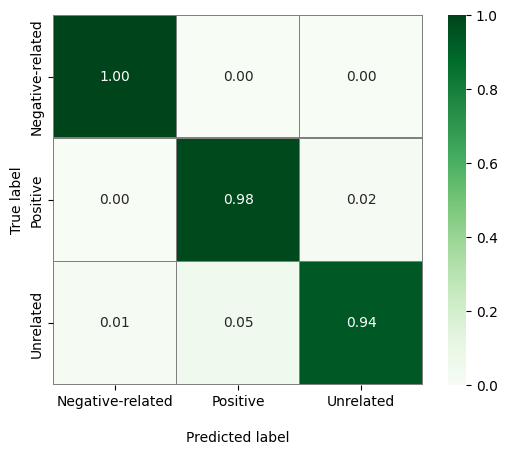

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
mpl.rcParams.update(mpl.rcParamsDefault)
cm=confusion_matrix(Ylcasses17,y_pred17)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
ax = sns.heatmap(cm, annot=True, fmt='.2f', cmap='Greens', linewidths=0.3, linecolor='gray', vmax=1.0, square=True)


ax.set_xlabel('\nPredicted label')
ax.set_ylabel('True label');
classes=['Negative-related', 'Positive', 'Unrelated']
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(classes)
ax.yaxis.set_ticklabels(classes)
# plt.savefig('/content/drive/My Drive/FBHealth/results/figureE5.eps',dpi=300, bbox_inches='tight')
## Display the visualization of the Confusion Matrix.
plt.show()

##Model training (Proposed CNN-based Model)


In [ ]:
X= np.hstack((Vector_char, XContV2_W))
X, Y=Data_balancingROS(X, Newdata2['label_cat'].values)
Y = pd.get_dummies(Y).values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42, shuffle=True,stratify=Y)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)
model,history = FitProposedCNNModel(2,0,X_train,Y_train, X_test, Y_test, num_words + num_chars)
print(model.summary())

(9000, 3973) (9000,)
Frequency of unique values of the said array:
[[   0    1    2]
 [3000 3000 3000]]
(7200, 3973) (7200, 3)
(1800, 3973) (1800, 3)
Epoch 1/500
45/45 - 4s - loss: 1.0468 - accuracy: 0.4682 - get_f1: 0.0655 - precision_7: 0.6905 - recall_7: 0.0403 - specificity: 0.9910 - val_loss: 0.9235 - val_accuracy: 0.5521 - val_get_f1: 0.4236 - val_precision_7: 0.6942 - val_recall_7: 0.2979 - val_specificity: 0.9375 - 4s/epoch - 86ms/step
Epoch 2/500
45/45 - 2s - loss: 0.8390 - accuracy: 0.5793 - get_f1: 0.4954 - precision_7: 0.6406 - recall_7: 0.4085 - specificity: 0.8854 - val_loss: 0.7896 - val_accuracy: 0.5736 - val_get_f1: 0.5557 - val_precision_7: 0.6121 - val_recall_7: 0.5063 - val_specificity: 0.8408 - 2s/epoch - 55ms/step
Epoch 3/500
45/45 - 2s - loss: 0.7592 - accuracy: 0.5995 - get_f1: 0.5616 - precision_7: 0.6537 - recall_7: 0.4932 - specificity: 0.8694 - val_loss: 0.7700 - val_accuracy: 0.5854 - val_get_f1: 0.5806 - val_precision_7: 0.6110 - val_recall_7: 0.5486 - val

In [ ]:
train_loss, train_acc,train_f1,train_pre,train_rec,train_spec = model.evaluate(X_train, Y_train, batch_size=batch_size, verbose=0)
test_loss, test_acc,test_f1,test_pre,test_rec,test_spec = model.evaluate(X_test, Y_test, batch_size=batch_size, verbose=0)
print('LOSS: Train: %.3f, Test: %.3f' % (train_loss, test_loss))
print('Accuracy: Train: %.3f, Test: %.3f' % (train_acc, test_acc))
print('F1: Train: %.3f, Test: %.3f' % (train_f1, test_f1))
print('Precision: Train: %.3f, Test: %.3f' % (train_pre, test_pre))
print('Recall: Train: %.3f, Test: %.3f' % (train_rec, test_rec))
print('Specificity: Train: %.3f, Test: %.3f' % (train_spec, test_spec))

LOSS: Train: 0.044, Test: 0.124
Accuracy: Train: 0.985, Test: 0.967
F1: Train: 0.985, Test: 0.969
Precision: Train: 0.986, Test: 0.967
Recall: Train: 0.985, Test: 0.967
Specificity: Train: 0.993, Test: 0.985


In [ ]:
# # save model
# model.save('/content/drive/My Drive/FBHealth/results/Model_CNN_best.h5')
# np.save('/content/drive/My Drive/FBHealth/results/history_Model_CNN_best.npy',history.history)
# print('Model Saved!')

Model Saved!


In [ ]:
# # load model
# model=load_model('/content/drive/My Drive/FBHealth/results/Model_CNN_best.h5', custom_objects={"get_f1": get_f1 , "specificity": specificity})
# history=np.load('/content/drive/My Drive/FBHealth/results/history_Model_CNN_best.npy',allow_pickle='TRUE').item()
# model.summary()

In [ ]:
import matplotlib as mpl
label_size = 15
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'

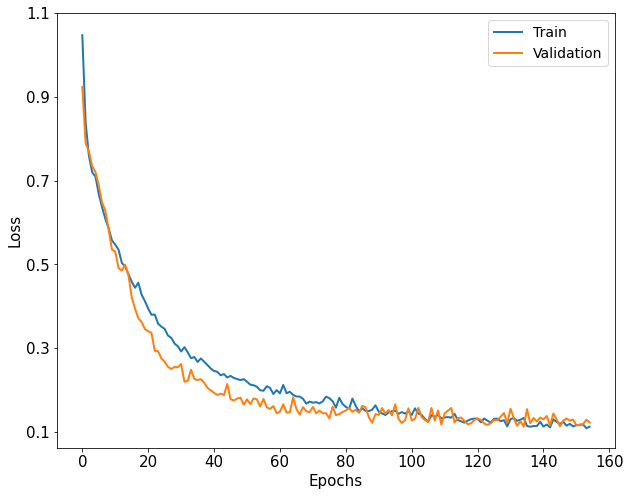

In [ ]:
plt.figure(figsize=(10,8))
# plt.title('Model loss')
plt.xlabel('Epochs', fontsize=label_size)
plt.ylabel('Loss', fontsize=label_size)
plt.plot(history.history['loss'], label='Train', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation', linewidth=2)
plt.legend(fontsize=14)
plt.yticks(np.arange(0.10,1.20, 0.20))
# plt.savefig('/content/drive/My Drive/FBHealth/results/figureE2.eps',dpi=300, bbox_inches='tight')
plt.show()

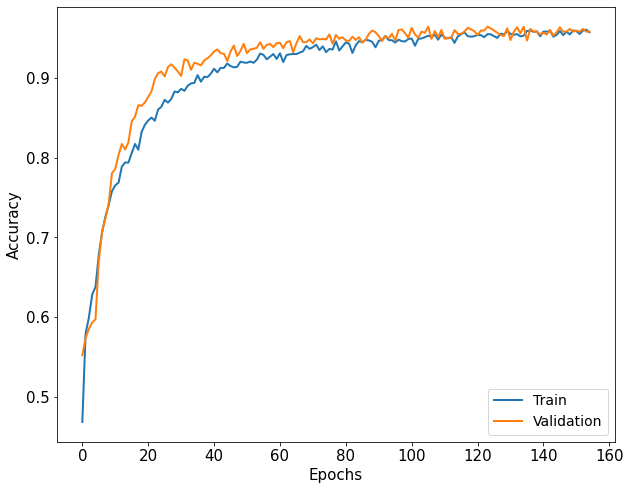

In [ ]:
plt.figure(figsize=(10,8))
# plt.title('Model accuracy')
plt.xlabel('Epochs', fontsize=label_size)
plt.ylabel('Accuracy', fontsize=label_size)
plt.plot(history.history['accuracy'], label='Train', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation', linewidth=2)
# plt.ylim(0.55,0.95)
# plt.yticks(np.arange(0.60,0.95, 0.05))
plt.legend(loc='lower right', fontsize=14)
# plt.savefig('/content/drive/My Drive/FBHealth/results/figureE1.eps',dpi=300, bbox_inches='tight')
plt.show()

###ROC Curve of the Proposed CNN-based Model

In [ ]:
import matplotlib as mpl
label_size = 15
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead



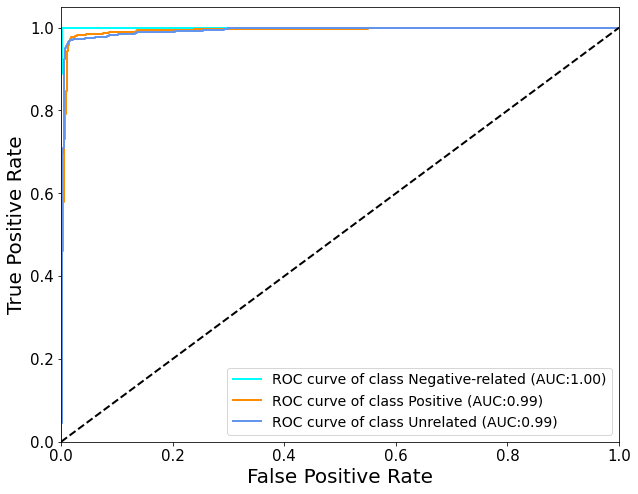

In [ ]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

y_score = model.predict(X_test, verbose=0)
# Plot linewidth.
lw = 2
n_classes = 3
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(10,8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
target= ['Negative-related', 'Positive', 'Unrelated']

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
            label = 'ROC curve of class %s (AUC:%0.2f)'  % (target[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)
# plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right", fontsize=14)
# plt.savefig('/content/drive/My Drive/FBHealth/results/figureEROC1.eps',dpi=300, bbox_inches='tight')
plt.show()

# Chart for FS+Data balancing results

In [ ]:
F1_allmodels=[[0.882,
0.817,
0.815,
0.885,
0.895,
0.894,
0.893,
0.898,
0.898,
0.812,
0.822,
0.836,
0.828,
0.833,
0.828,
0.901,
0.897,
0.892,
0.886,
0.89,
0.899],
[0.882,
0.698,
0.739,
0.89,
0.891,
0.893,
0.893,
0.899,
0.895,
0.706,
0.713,
0.74,
0.703,
0.712,
0.721,
0.893,
0.889,
0.892,
0.899,
0.89,
0.891],
[0.949,
0.959,
0.952,
0.959,
0.965,
0.961,
0.964,
0.966,
0.966,
0.961,
0.965,
0.963,
0.962,
0.959,
0.966,
0.962,
0.966,
0.965,
0.965,
0.957,
0.965]]

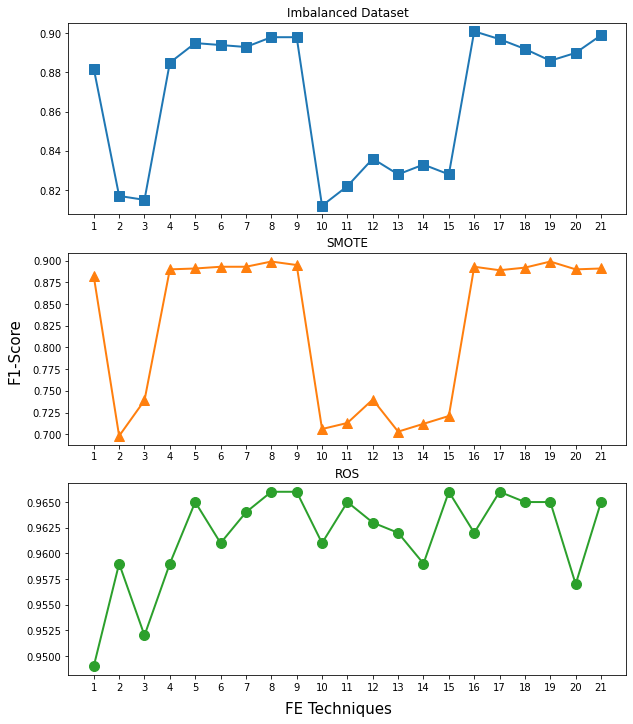

In [ ]:
# Plot lines with different marker sizes
# fig = plt.figure(figsize=(9,6))
from matplotlib.ticker import MaxNLocator
fig, ax = plt.subplots(3,1, figsize=(10,12))
fig.text(0.5, 0.08, 'FE Techniques', ha='center', fontsize=15)
fig.text(0.04, 0.5, 'F1-Score', va='center', rotation='vertical', fontsize=15)



x_pos=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]
ax[0].xaxis.set_major_locator(MaxNLocator(integer=True))
ax[1].xaxis.set_major_locator(MaxNLocator(integer=True))
ax[2].xaxis.set_major_locator(MaxNLocator(integer=True))

ax[0].plot(x_pos, F1_allmodels[0], label = 'Imbalanced Dataset', lw=2, marker='s', ms=10, color = 'tab:blue') # square
ax[0].set_xticks(x_pos)
ax[0].set_title('Imbalanced Dataset', fontsize=12)

ax[1].plot(x_pos, F1_allmodels[1], label = 'SMOTE', lw=2, marker='^', ms=10, color = 'tab:orange') # triangle
# ax[1].set_ylim(0.7, 1)
ax[1].set_xticks(x_pos)
ax[1].set_title('SMOTE', fontsize=12)

ax[2].plot(x_pos, F1_allmodels[2], label = 'ROS', lw=2, marker='o', ms=10, color = 'tab:green') # circle
# ax[2].set_ylim(0.95, 1)
ax[2].set_xticks(x_pos)
ax[2].set_title('ROS', fontsize=12)

# plt.savefig('/content/drive/My Drive/FBHealth/results/figureE6.eps',dpi=300, bbox_inches='tight')
plt.show()

#Comparative analysis

##LSTM

In [ ]:
X= np.hstack((Vector_char, XContV2_W))
X, Y=Data_balancingROS(X, Newdata2['label_cat'].values)
Y = pd.get_dummies(Y).values
y_pred_lstm4, Ylcasses_lstm4, predicted_targets_lstm4, actual_targets_lstm4, cvscores_lstm4 = CorssValidationfitModel(X, Y,"LSTM","WC")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores_lstm4[:,0]), np.std(cvscores_lstm4[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores_lstm4[:,1]), np.std(cvscores_lstm4[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores_lstm4[:,2]), np.std(cvscores_lstm4[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores_lstm4[:,3]), np.std(cvscores_lstm4[:,3])))
print("Specificity: %.3f (+/- %.2f)" % (np.mean(cvscores_lstm4[:,4]), np.std(cvscores_lstm4[:,4])))

(9000, 3973) (9000,)
Frequency of unique values of the said array:
[[   0    1    2]
 [3000 3000 3000]]
K-fold=  0
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 71: early stopping
Accuracy: Train: 0.606, Test: 0.604
F1: Train: 0.371, Test: 0.376
Precision: Train: 0.890, Test: 0.891
Recall: Train: 0.300, Test: 0.308
Specificity: Train: 0.981, Test: 0.982
K-fold=  1
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 159: early stopping
Accuracy: Train: 0.705, Test: 0.692
F1: Train: 0.709, Test: 0.703
Precision: Train: 0.706, Test: 0.692
Recall: Train: 0.705, Test: 0.692
Specificity: Train: 0.855, Test: 0.852
K-fold=  2
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 286: early stopping
Accuracy: Train: 0.891, Test: 0.827
F1: Train: 0.890, Test: 0.838
Precision: Train: 0.891, Test: 0.827
Recall:

###ROC Curve of LSTM

In [ ]:
X= np.hstack((Vector_char, XContV2_W))
X, Y=Data_balancingROS(X, Newdata2['label_cat'].values)
Y = pd.get_dummies(Y).values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42, shuffle=True,stratify=Y)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)
model,history = LSTM_Basic(2,0,X_train,Y_train, X_test, Y_test, num_words + num_chars)

(9000, 3973) (9000,)
Frequency of unique values of the said array:
[[   0    1    2]
 [3000 3000 3000]]
(7200, 3973) (7200, 3)
(1800, 3973) (1800, 3)
Epoch 1/500
45/45 - 14s - loss: 1.0994 - accuracy: 0.3377 - get_f1: 0.0000e+00 - precision_7: 0.0000e+00 - recall_7: 0.0000e+00 - specificity: 1.0000 - val_loss: 1.0985 - val_accuracy: 0.3688 - val_get_f1: 0.0000e+00 - val_precision_7: 0.0000e+00 - val_recall_7: 0.0000e+00 - val_specificity: 1.0000 - 14s/epoch - 314ms/step
Epoch 2/500
45/45 - 11s - loss: 1.1131 - accuracy: 0.3628 - get_f1: 0.0373 - precision_7: 0.3498 - recall_7: 0.0344 - specificity: 0.9681 - val_loss: 1.1061 - val_accuracy: 0.3375 - val_get_f1: 0.0000e+00 - val_precision_7: 0.0000e+00 - val_recall_7: 0.0000e+00 - val_specificity: 1.0000 - 11s/epoch - 236ms/step
Epoch 3/500
45/45 - 10s - loss: 1.1002 - accuracy: 0.3332 - get_f1: 0.0000e+00 - precision_7: 0.0000e+00 - recall_7: 0.0000e+00 - specificity: 1.0000 - val_loss: 1.0948 - val_accuracy: 0.4028 - val_get_f1: 0.0000

In [ ]:
import matplotlib as mpl
label_size = 15
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead



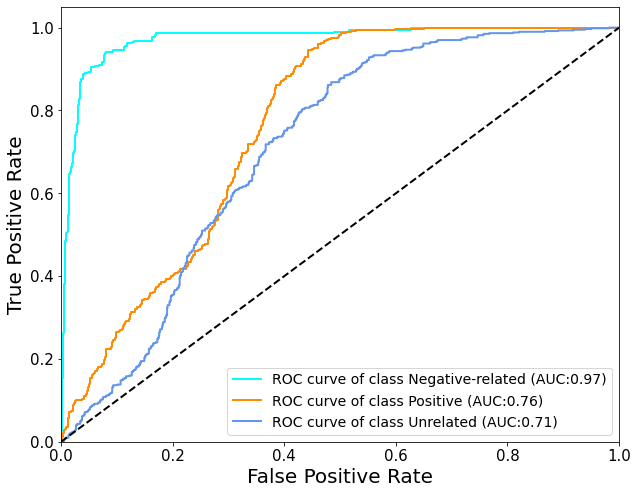

In [ ]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc


y_score = model.predict(X_test, verbose=0)
# Plot linewidth.
lw = 2
n_classes = 3
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(10,8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
target= ['Negative-related', 'Positive', 'Unrelated']

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
            label = 'ROC curve of class %s (AUC:%0.2f)'  % (target[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)
# plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right", fontsize=14)
# plt.savefig('/content/drive/My Drive/FBHealth/results/figureEROC2_LSTM.eps',dpi=300, bbox_inches='tight')
plt.show()

##GRU

In [ ]:
X= np.hstack((Vector_char, XContV2_W))
X, Y=Data_balancingROS(X, Newdata2['label_cat'].values)
Y = pd.get_dummies(Y).values
y_pred_gru4, Ylcasses_gru4, predicted_targets_gru4, actual_targets_gru4, cvscores_gru4 = CorssValidationfitModel(X, Y,"GRU","WC")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores_gru4[:,0]), np.std(cvscores_gru4[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores_gru4[:,1]), np.std(cvscores_gru4[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores_gru4[:,2]), np.std(cvscores_gru4[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores_gru4[:,3]), np.std(cvscores_gru4[:,3])))
print("Specificity: %.3f (+/- %.2f)" % (np.mean(cvscores_gru4[:,4]), np.std(cvscores_gru4[:,4])))

(9000, 3973) (9000,)
Frequency of unique values of the said array:
[[   0    1    2]
 [3000 3000 3000]]
K-fold=  0
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 97: early stopping
Accuracy: Train: 0.649, Test: 0.654
F1: Train: 0.422, Test: 0.410
Precision: Train: 0.909, Test: 0.895
Recall: Train: 0.360, Test: 0.361
Specificity: Train: 0.982, Test: 0.972
K-fold=  1
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 154: early stopping
Accuracy: Train: 0.878, Test: 0.807
F1: Train: 0.877, Test: 0.795
Precision: Train: 0.879, Test: 0.807
Recall: Train: 0.877, Test: 0.806
Specificity: Train: 0.939, Test: 0.898
K-fold=  2
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 221: early stopping
Accuracy: Train: 0.979, Test: 0.903
F1: Train: 0.980, Test: 0.909
Precision: Train: 0.979, Test: 0.903
Recall:

###ROC Curve of GRU

In [ ]:
X= np.hstack((Vector_char, XContV2_W))
X, Y=Data_balancingROS(X, Newdata2['label_cat'].values)
Y = pd.get_dummies(Y).values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42, shuffle=True,stratify=Y)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)
model,history = GRU_Basic(2,0,X_train,Y_train, X_test, Y_test, num_words + num_chars)

(9000, 3973) (9000,)
Frequency of unique values of the said array:
[[   0    1    2]
 [3000 3000 3000]]
(7200, 3973) (7200, 3)
(1800, 3973) (1800, 3)
Epoch 1/500
45/45 - 8s - loss: 1.0990 - accuracy: 0.3358 - get_f1: 0.0000e+00 - precision_7: 0.0000e+00 - recall_7: 0.0000e+00 - specificity: 1.0000 - val_loss: 1.0976 - val_accuracy: 0.3431 - val_get_f1: 0.0000e+00 - val_precision_7: 0.0000e+00 - val_recall_7: 0.0000e+00 - val_specificity: 1.0000 - 8s/epoch - 184ms/step
Epoch 2/500
45/45 - 7s - loss: 1.0974 - accuracy: 0.3451 - get_f1: 0.0000e+00 - precision_7: 0.0000e+00 - recall_7: 0.0000e+00 - specificity: 1.0000 - val_loss: 1.0963 - val_accuracy: 0.3750 - val_get_f1: 0.0000e+00 - val_precision_7: 0.0000e+00 - val_recall_7: 0.0000e+00 - val_specificity: 1.0000 - 7s/epoch - 147ms/step
Epoch 3/500
45/45 - 6s - loss: 1.0911 - accuracy: 0.3618 - get_f1: 0.0051 - precision_7: 0.8824 - recall_7: 0.0026 - specificity: 0.9998 - val_loss: 1.0822 - val_accuracy: 0.3611 - val_get_f1: 0.0820 - va

In [ ]:
import matplotlib as mpl
label_size = 15
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead



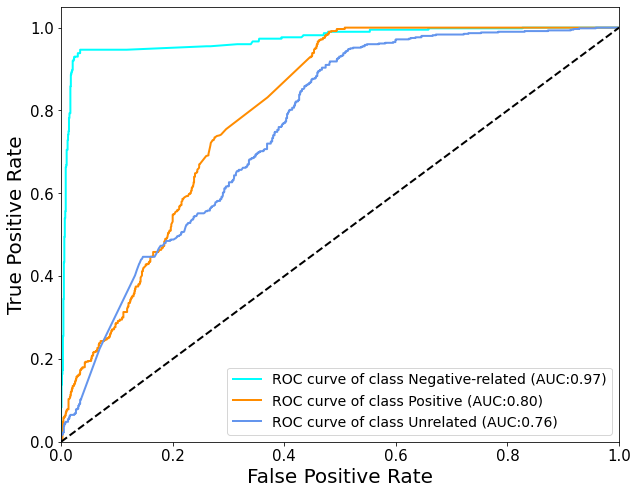

In [ ]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc


y_score = model.predict(X_test, verbose=0)
# Plot linewidth.
lw = 2
n_classes = 3
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(10,8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
target= ['Negative-related', 'Positive', 'Unrelated']

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
            label = 'ROC curve of class %s (AUC:%0.2f)'  % (target[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)
# plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right", fontsize=14)
# plt.savefig('/content/drive/My Drive/FBHealth/results/figureEROC2_GRU.eps',dpi=300, bbox_inches='tight')
plt.show()

##BiLSTM

In [ ]:
X= np.hstack((Vector_char, XContV2_W))
X, Y=Data_balancingROS(X, Newdata2['label_cat'].values)
Y = pd.get_dummies(Y).values
y_pred_bilstm4, Ylcasses_bilstm4, predicted_targets_bilstm4, actual_targets_bilstm4, cvscores_bilstm4 = CorssValidationfitModel(X, Y,"BiLSTM","WC")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores_bilstm4[:,0]), np.std(cvscores_bilstm4[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores_bilstm4[:,1]), np.std(cvscores_bilstm4[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores_bilstm4[:,2]), np.std(cvscores_bilstm4[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores_bilstm4[:,3]), np.std(cvscores_bilstm4[:,3])))
print("Specificity: %.3f (+/- %.2f)" % (np.mean(cvscores_bilstm4[:,4]), np.std(cvscores_bilstm4[:,4])))

(9000, 3973) (9000,)
Frequency of unique values of the said array:
[[   0    1    2]
 [3000 3000 3000]]
K-fold=  0
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 321: early stopping
Accuracy: Train: 0.782, Test: 0.767
F1: Train: 0.775, Test: 0.765
Precision: Train: 0.814, Test: 0.803
Recall: Train: 0.742, Test: 0.721
Specificity: Train: 0.915, Test: 0.913
K-fold=  1
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 228: early stopping
Accuracy: Train: 0.658, Test: 0.653
F1: Train: 0.644, Test: 0.658
Precision: Train: 0.668, Test: 0.665
Recall: Train: 0.626, Test: 0.617
Specificity: Train: 0.846, Test: 0.854
K-fold=  2
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 271: early stopping
Accuracy: Train: 0.879, Test: 0.856
F1: Train: 0.877, Test: 0.841
Precision: Train: 0.880, Test: 0.858
Recall

###ROC Curve of BiLSTM

In [ ]:
X= np.hstack((Vector_char, XContV2_W))
X, Y=Data_balancingROS(X, Newdata2['label_cat'].values)
Y = pd.get_dummies(Y).values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42, shuffle=True,stratify=Y)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)
model,history = BiLSTM_Basic(2,0,X_train,Y_train, X_test, Y_test, num_words + num_chars)

(9000, 3973) (9000,)
Frequency of unique values of the said array:
[[   0    1    2]
 [3000 3000 3000]]
(7200, 3973) (7200, 3)
(1800, 3973) (1800, 3)
Epoch 1/500
45/45 - 19s - loss: 1.0997 - accuracy: 0.3266 - get_f1: 0.0000e+00 - precision_6: 0.0000e+00 - recall_6: 0.0000e+00 - specificity: 1.0000 - val_loss: 1.0972 - val_accuracy: 0.4361 - val_get_f1: 0.0000e+00 - val_precision_6: 0.0000e+00 - val_recall_6: 0.0000e+00 - val_specificity: 1.0000 - 19s/epoch - 413ms/step
Epoch 2/500
45/45 - 15s - loss: 1.0915 - accuracy: 0.3812 - get_f1: 0.0035 - precision_6: 0.9167 - recall_6: 0.0019 - specificity: 0.9999 - val_loss: 1.0811 - val_accuracy: 0.4153 - val_get_f1: 0.0000e+00 - val_precision_6: 0.0000e+00 - val_recall_6: 0.0000e+00 - val_specificity: 1.0000 - 15s/epoch - 334ms/step
Epoch 3/500
45/45 - 15s - loss: 1.1442 - accuracy: 0.3674 - get_f1: 0.0900 - precision_6: 0.3511 - recall_6: 0.0825 - specificity: 0.9238 - val_loss: 1.0947 - val_accuracy: 0.3986 - val_get_f1: 0.0000e+00 - val_p

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead



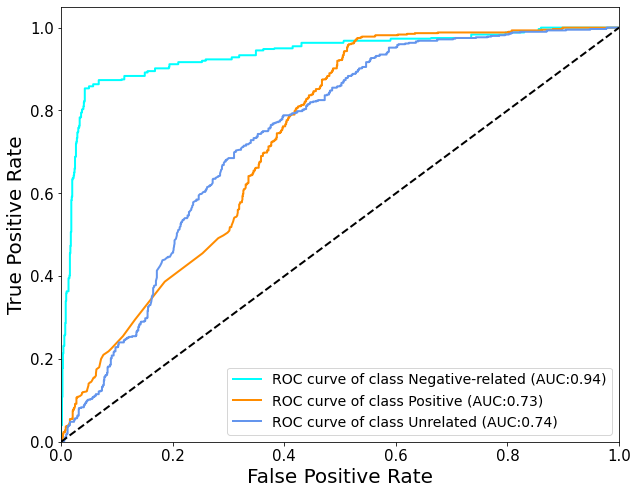

In [ ]:
import matplotlib as mpl
label_size = 15
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'

import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc


y_score = model.predict(X_test, verbose=0)
# Plot linewidth.
lw = 2
n_classes = 3
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(10,8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
target= ['Negative-related', 'Positive', 'Unrelated']

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
            label = 'ROC curve of class %s (AUC:%0.2f)'  % (target[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)
# plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right", fontsize=14)
# plt.savefig('/content/drive/My Drive/FBHealth/results/figureEROC3_BiLSTM.eps',dpi=300, bbox_inches='tight')
plt.show()

##	CNN

In [ ]:
X= np.hstack((Vector_char, XContV2_W))
X, Y=Data_balancingROS(X, Newdata2['label_cat'].values)
Y = pd.get_dummies(Y).values
y_pred_cnn4, Ylcasses_cnn4, predicted_targets_cnn4, actual_targets_cnn4, cvscores_cnn4 = CorssValidationfitModel(X, Y,"CNN","WC")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores_cnn4[:,0]), np.std(cvscores_cnn4[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores_cnn4[:,1]), np.std(cvscores_cnn4[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores_cnn4[:,2]), np.std(cvscores_cnn4[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores_cnn4[:,3]), np.std(cvscores_cnn4[:,3])))
print("Specificity: %.3f (+/- %.2f)" % (np.mean(cvscores_cnn4[:,4]), np.std(cvscores_cnn4[:,4])))

(9000, 3973) (9000,)
Frequency of unique values of the said array:
[[   0    1    2]
 [3000 3000 3000]]
K-fold=  0
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 30: early stopping
Accuracy: Train: 1.000, Test: 0.952
F1: Train: 1.000, Test: 0.955
Precision: Train: 1.000, Test: 0.952
Recall: Train: 1.000, Test: 0.952
Specificity: Train: 1.000, Test: 0.977
K-fold=  1
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 32: early stopping
Accuracy: Train: 1.000, Test: 0.954
F1: Train: 1.000, Test: 0.957
Precision: Train: 1.000, Test: 0.954
Recall: Train: 1.000, Test: 0.954
Specificity: Train: 1.000, Test: 0.979
K-fold=  2
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 35: early stopping
Accuracy: Train: 0.997, Test: 0.961
F1: Train: 0.997, Test: 0.963
Precision: Train: 0.997, Test: 0.961
Recall: T

###ROC Curve of CNN

In [ ]:
X= np.hstack((Vector_char, XContV2_W))
X, Y=Data_balancingROS(X, Newdata2['label_cat'].values)
Y = pd.get_dummies(Y).values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42, shuffle=True,stratify=Y)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)
model,history = CNN_Basic(2,0,X_train,Y_train, X_test, Y_test, num_words + num_chars)

(9000, 3973) (9000,)
Frequency of unique values of the said array:
[[   0    1    2]
 [3000 3000 3000]]
(7200, 3973) (7200, 3)
(1800, 3973) (1800, 3)
Epoch 1/500
45/45 - 3s - loss: 0.8442 - accuracy: 0.5977 - get_f1: 0.5569 - precision_28: 0.6421 - recall_28: 0.5068 - specificity: 0.8588 - val_loss: 0.6899 - val_accuracy: 0.6576 - val_get_f1: 0.6346 - val_precision_28: 0.7168 - val_recall_28: 0.5694 - val_specificity: 0.8887 - 3s/epoch - 63ms/step
Epoch 2/500
45/45 - 1s - loss: 0.6572 - accuracy: 0.6781 - get_f1: 0.6424 - precision_28: 0.7227 - recall_28: 0.5800 - specificity: 0.8887 - val_loss: 0.5925 - val_accuracy: 0.7090 - val_get_f1: 0.7136 - val_precision_28: 0.7432 - val_recall_28: 0.6833 - val_specificity: 0.8825 - 1s/epoch - 32ms/step
Epoch 3/500
45/45 - 1s - loss: 0.5068 - accuracy: 0.7760 - get_f1: 0.7699 - precision_28: 0.8076 - recall_28: 0.7368 - specificity: 0.9122 - val_loss: 0.4278 - val_accuracy: 0.8493 - val_get_f1: 0.8479 - val_precision_28: 0.8705 - val_recall_28: 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead



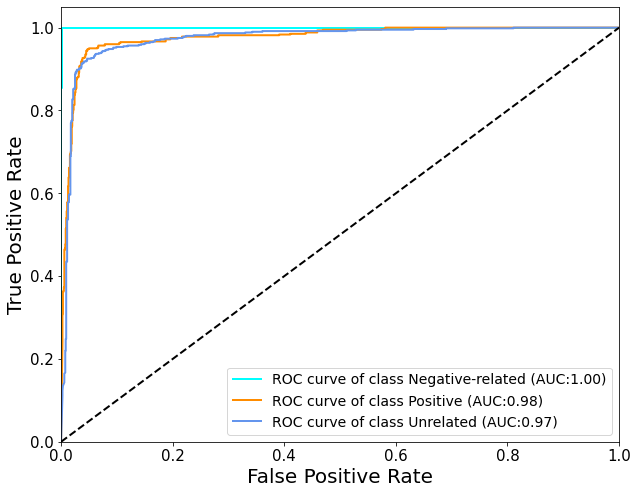

In [ ]:
import matplotlib as mpl
label_size = 15
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'

import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc


y_score = model.predict(X_test, verbose=0)
# Plot linewidth.
lw = 2
n_classes = 3
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(10,8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
target= ['Negative-related', 'Positive', 'Unrelated']

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
            label = 'ROC curve of class %s (AUC:%0.2f)'  % (target[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)
# plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right", fontsize=14)
# plt.savefig('/content/drive/My Drive/FBHealth/results/figureEROC4_CNN.eps',dpi=300, bbox_inches='tight')
plt.show()

##CNN-LSTM

In [ ]:
X= np.hstack((Vector_char, XContV2_W))
X, Y=Data_balancingROS(X, Newdata2['label_cat'].values)
Y = pd.get_dummies(Y).values
y_pred_cnnlstm4, Ylcasses_cnnlstm4, predicted_targets_cnnlstm4, actual_targets_cnnlstm4, cvscores_cnnlstm4 = CorssValidationfitModel(X, Y,"CNNLSTM","WC")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores_cnnlstm4[:,0]), np.std(cvscores_cnnlstm4[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores_cnnlstm4[:,1]), np.std(cvscores_cnnlstm4[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores_cnnlstm4[:,2]), np.std(cvscores_cnnlstm4[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores_cnnlstm4[:,3]), np.std(cvscores_cnnlstm4[:,3])))
print("Specificity: %.3f (+/- %.2f)" % (np.mean(cvscores_cnnlstm4[:,4]), np.std(cvscores_cnnlstm4[:,4])))

(9000, 3973) (9000,)
Frequency of unique values of the said array:
[[   0    1    2]
 [3000 3000 3000]]
K-fold=  0
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 222: early stopping
Accuracy: Train: 0.928, Test: 0.864
F1: Train: 0.929, Test: 0.873
Precision: Train: 0.929, Test: 0.865
Recall: Train: 0.927, Test: 0.863
Specificity: Train: 0.965, Test: 0.937
K-fold=  1
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 225: early stopping
Accuracy: Train: 0.979, Test: 0.911
F1: Train: 0.980, Test: 0.917
Precision: Train: 0.980, Test: 0.912
Recall: Train: 0.979, Test: 0.911
Specificity: Train: 0.990, Test: 0.959
K-fold=  2
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 181: early stopping
Accuracy: Train: 0.656, Test: 0.638
F1: Train: 0.496, Test: 0.494
Precision: Train: 0.790, Test: 0.774
Recall

###ROC Curve of CNN-LSTM

In [ ]:
X= np.hstack((Vector_char, XContV2_W))
X, Y=Data_balancingROS(X, Newdata2['label_cat'].values)
Y = pd.get_dummies(Y).values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42, shuffle=True,stratify=Y)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)
model,history = CNNLSTM_Basic(2,0,X_train,Y_train, X_test, Y_test, num_words + num_chars)

(9000, 3973) (9000,)
Frequency of unique values of the said array:
[[   0    1    2]
 [3000 3000 3000]]
(7200, 3973) (7200, 3)
(1800, 3973) (1800, 3)
Epoch 1/500
45/45 - 9s - loss: 1.0794 - accuracy: 0.3917 - get_f1: 0.0396 - precision_6: 0.5785 - recall_6: 0.0243 - specificity: 0.9911 - val_loss: 0.9595 - val_accuracy: 0.5111 - val_get_f1: 0.1693 - val_precision_6: 0.9310 - val_recall_6: 0.0938 - val_specificity: 0.9958 - 9s/epoch - 211ms/step
Epoch 2/500
45/45 - 6s - loss: 0.9896 - accuracy: 0.4898 - get_f1: 0.2140 - precision_6: 0.7723 - recall_6: 0.1278 - specificity: 0.9812 - val_loss: 0.8399 - val_accuracy: 0.5639 - val_get_f1: 0.3779 - val_precision_6: 0.7873 - val_recall_6: 0.2493 - val_specificity: 0.9655 - 6s/epoch - 128ms/step
Epoch 3/500
45/45 - 6s - loss: 0.8956 - accuracy: 0.5455 - get_f1: 0.3672 - precision_6: 0.7047 - recall_6: 0.2519 - specificity: 0.9472 - val_loss: 0.8888 - val_accuracy: 0.5597 - val_get_f1: 0.3063 - val_precision_6: 0.9181 - val_recall_6: 0.1868 - v

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead



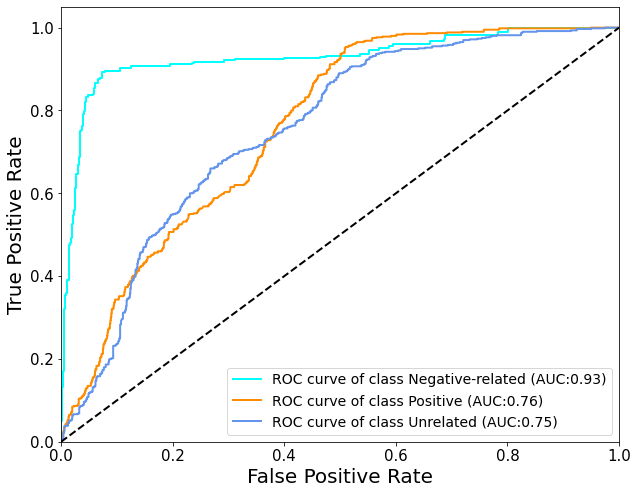

In [ ]:
import matplotlib as mpl
label_size = 15
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'

import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc


y_score = model.predict(X_test, verbose=0)
# Plot linewidth.
lw = 2
n_classes = 3
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(10,8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
target= ['Negative-related', 'Positive', 'Unrelated']

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
            label = 'ROC curve of class %s (AUC:%0.2f)'  % (target[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)
# plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right", fontsize=14)
# plt.savefig('/content/drive/My Drive/FBHealth/results/figureEROC5_CNNLSTM.eps',dpi=300, bbox_inches='tight')
plt.show()

#State-of-the-art

#LSTM [Ali Al-Laith]

In [ ]:
MAX_SEQUENCE_LENGTH = 300
MAX_VOCAB_SIZE = 20000
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(Newdata2['text'].values)
sequences = tokenizer.texts_to_sequences(Newdata2['text'].values)
word2idx = tokenizer.word_index #dictionary of all unique words in our document
X = pad_sequences(sequences,maxlen=MAX_SEQUENCE_LENGTH)
num_words = min(MAX_VOCAB_SIZE,len(word2idx)+1)
print(MAX_SEQUENCE_LENGTH)
print(num_words)


X, Y=Data_balancingROS(X, Newdata2['label_cat'].values)
Y = pd.get_dummies(Y).values

y_pred_lstm3, Ylcasses_lstm3, predicted_targets_lstm3, actual_targets_lstm3, cvscores_lstm3 = CorssValidationfitModel(X, Y,"LSTMSTATE","W")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores_lstm3[:,0]), np.std(cvscores_lstm3[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores_lstm3[:,1]), np.std(cvscores_lstm3[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores_lstm3[:,2]), np.std(cvscores_lstm3[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores_lstm3[:,3]), np.std(cvscores_lstm3[:,3])))
print("Specificity: %.3f (+/- %.2f)" % (np.mean(cvscores_lstm3[:,4]), np.std(cvscores_lstm3[:,4])))

300
20000
(9000, 300) (9000,)
Frequency of unique values of the said array:
[[   0    1    2]
 [3000 3000 3000]]
K-fold=  0
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 24: early stopping
Accuracy: Train: 1.000, Test: 0.953
F1: Train: 1.000, Test: 0.956
Precision: Train: 1.000, Test: 0.953
Recall: Train: 1.000, Test: 0.953
Specificity: Train: 1.000, Test: 0.978
K-fold=  1
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 24: early stopping
Accuracy: Train: 1.000, Test: 0.969
F1: Train: 1.000, Test: 0.971
Precision: Train: 1.000, Test: 0.969
Recall: Train: 1.000, Test: 0.969
Specificity: Train: 1.000, Test: 0.986
K-fold=  2
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  2400
Test Neg:  600
Test Pos:  600
Test Unrelated:  600
Epoch 23: early stopping
Accuracy: Train: 1.000, Test: 0.939
F1: Train: 1.000, Test: 0.943
Precision: Train: 1.000, Test: 0.940


##CM

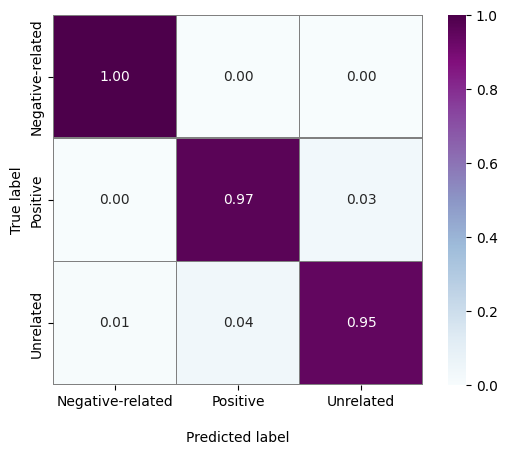

In [ ]:
import matplotlib as mpl
label_size = 15
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'
import seaborn as sns
from sklearn.metrics import confusion_matrix
mpl.rcParams.update(mpl.rcParamsDefault)
cm=confusion_matrix(Ylcasses_lstm3,y_pred_lstm3)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
ax = sns.heatmap(cm, annot=True, fmt='.2f', cmap='BuPu', linewidths=0.3, linecolor='gray', vmax=1.0, square=True)


ax.set_xlabel('\nPredicted label')
ax.set_ylabel('True label');
classes=['Negative-related', 'Positive', 'Unrelated']
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(classes)
ax.yaxis.set_ticklabels(classes)
plt.savefig('/content/drive/My Drive/FBHealth/results/figureLSTMSTATE_CM.eps',dpi=300, bbox_inches='tight')
## Display the visualization of the Confusion Matrix.
plt.show()

#LSTM [Ali Al-Laith] (Imbalanced Data)

In [ ]:
MAX_SEQUENCE_LENGTH = 300
MAX_VOCAB_SIZE = 20000
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(Newdata2['text'].values)
sequences = tokenizer.texts_to_sequences(Newdata2['text'].values)
word2idx = tokenizer.word_index #dictionary of all unique words in our document
X = pad_sequences(sequences,maxlen=MAX_SEQUENCE_LENGTH)
num_words = min(MAX_VOCAB_SIZE,len(word2idx)+1)
print(MAX_SEQUENCE_LENGTH)
print(num_words)


Y=Newdata2['label_cat'].values
Y = pd.get_dummies(Y).values

y_pred_lstm3, Ylcasses_lstm3, predicted_targets_lstm3, actual_targets_lstm3, cvscores_lstm3 = CorssValidationfitModel(X, Y,"LSTMSTATE","W")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores_lstm3[:,0]), np.std(cvscores_lstm3[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores_lstm3[:,1]), np.std(cvscores_lstm3[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores_lstm3[:,2]), np.std(cvscores_lstm3[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores_lstm3[:,3]), np.std(cvscores_lstm3[:,3])))
print("Specificity: %.3f (+/- %.2f)" % (np.mean(cvscores_lstm3[:,4]), np.std(cvscores_lstm3[:,4])))

300
20000
K-fold=  0
Train Neg:  191
Train Pos:  741
Train Unrelated:  2400
Test Neg:  47
Test Pos:  186
Test Unrelated:  600
Epoch 22: early stopping
Accuracy: Train: 1.000, Test: 0.848
F1: Train: 1.000, Test: 0.856
Precision: Train: 1.000, Test: 0.850
Recall: Train: 1.000, Test: 0.848
Specificity: Train: 1.000, Test: 0.929
K-fold=  1
Train Neg:  191
Train Pos:  741
Train Unrelated:  2400
Test Neg:  47
Test Pos:  186
Test Unrelated:  600
Epoch 24: early stopping
Accuracy: Train: 0.983, Test: 0.773
F1: Train: 0.984, Test: 0.781
Precision: Train: 0.984, Test: 0.778
Recall: Train: 0.982, Test: 0.770
Specificity: Train: 0.992, Test: 0.894
K-fold=  2
Train Neg:  190
Train Pos:  742
Train Unrelated:  2400
Test Neg:  48
Test Pos:  185
Test Unrelated:  600
Epoch 25: early stopping
Accuracy: Train: 1.000, Test: 0.844
F1: Train: 1.000, Test: 0.849
Precision: Train: 1.000, Test: 0.844
Recall: Train: 1.000, Test: 0.843
Specificity: Train: 1.000, Test: 0.925
K-fold=  3
Train Neg:  190
Train Pos:  

#SVM with Bigram in TF-IDF

In [ ]:
tfidf2_coco = TfidfVectorizer(max_features=20000, analyzer='word',ngram_range=(2,2)) 
X= tfidf2_coco.fit_transform(Newdata2['text'].values).toarray() 
X, Y=Data_balancingROS(X, Newdata2['label_cat'].values)

y_pred_svm2, predicted_targets_svm2, actual_targets_svm2, cvscores_svm2 = CorssValidationML_state(X, Y,"SVMState")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores_svm2[:,0]), np.std(cvscores_svm2[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores_svm2[:,1]), np.std(cvscores_svm2[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores_svm2[:,2]), np.std(cvscores_svm2[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores_svm2[:,3]), np.std(cvscores_svm2[:,3])))

(9000, 20000) (9000,)
Frequency of unique values of the said array:
[[   0    1    2]
 [3000 3000 3000]]
K-fold=  0
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  0
Test Neg:  600
Test Pos:  600
Test Unrelated:  0
0.9644444444444444
0.9647846657767981
0.9644444444444444
0.9644068466752067
K-fold=  1
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  0
Test Neg:  600
Test Pos:  600
Test Unrelated:  0
0.9655555555555555
0.9659929344093837
0.9655555555555555
0.9655124984827504
K-fold=  2
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  0
Test Neg:  600
Test Pos:  600
Test Unrelated:  0
0.9633333333333334
0.9633137030540135
0.9633333333333334
0.9632478571336573
K-fold=  3
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  0
Test Neg:  600
Test Pos:  600
Test Unrelated:  0
0.9783333333333334
0.9783193006082394
0.9783333333333334
0.9783249629204378
K-fold=  4
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  0
Test Neg:  600
Test Pos:  600
Test Unrelated:  0
0.9655555555555555
0.

##CM

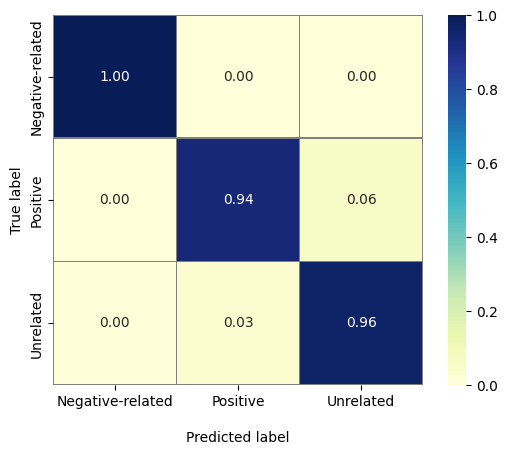

In [ ]:
import matplotlib as mpl
label_size = 15
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'
import seaborn as sns
from sklearn.metrics import confusion_matrix
mpl.rcParams.update(mpl.rcParamsDefault)

cm=confusion_matrix(actual_targets_svm2, predicted_targets_svm2)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
ax = sns.heatmap(cm, annot=True, fmt='.2f', cmap='YlGnBu', linewidths=0.3, linecolor='gray', vmax=1.0, square=True)


ax.set_xlabel('\nPredicted label')
ax.set_ylabel('True label');
classes=['Negative-related', 'Positive', 'Unrelated']
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(classes)
ax.yaxis.set_ticklabels(classes)
# plt.savefig('/content/drive/My Drive/FBHealth/results/figureSVM2STATE_CM.eps',dpi=300, bbox_inches='tight')
## Display the visualization of the Confusion Matrix.
plt.show()

#SVM with Bigram in TF-IDF (Imbalanced Data)

In [ ]:
tfidf2_coco = TfidfVectorizer(max_features=20000, analyzer='word',ngram_range=(2,2)) 
X= tfidf2_coco.fit_transform(Newdata2['text'].values).toarray() 
Y=Newdata2['label_cat'].values

y_pred_svm2, predicted_targets_svm2, actual_targets_svm2, cvscores_svm2 = CorssValidationML_state(X, Y,"SVMState")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores_svm2[:,0]), np.std(cvscores_svm2[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores_svm2[:,1]), np.std(cvscores_svm2[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores_svm2[:,2]), np.std(cvscores_svm2[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores_svm2[:,3]), np.std(cvscores_svm2[:,3])))

K-fold=  0
Train Neg:  741
Train Pos:  2400
Train Unrelated:  0
Test Neg:  186
Test Pos:  600
Test Unrelated:  0
0.8007202881152461
0.8192256006880364
0.8007202881152461
0.7638232405704611
K-fold=  1
Train Neg:  741
Train Pos:  2400
Train Unrelated:  0
Test Neg:  186
Test Pos:  600
Test Unrelated:  0
0.8067226890756303
0.82678011665091
0.8067226890756303
0.770567440865449
K-fold=  2
Train Neg:  742
Train Pos:  2400
Train Unrelated:  0
Test Neg:  185
Test Pos:  600
Test Unrelated:  0
0.8031212484993998
0.8143753458256618
0.8031212484993998
0.7694418294301533
K-fold=  3
Train Neg:  742
Train Pos:  2400
Train Unrelated:  0
Test Neg:  185
Test Pos:  600
Test Unrelated:  0
0.7959183673469388
0.812124215692892
0.7959183673469388
0.7577994460158929
K-fold=  4
Train Neg:  742
Train Pos:  2400
Train Unrelated:  0
Test Neg:  185
Test Pos:  600
Test Unrelated:  0
0.8031212484993998
0.8224189675870349
0.8031212484993998
0.7664306506634303
Accuracy: 0.802 (+/- 0.00)
F1: 0.766 (+/- 0.00)
Precision: 

#SVM with Trigram in TF-IDF

In [ ]:
tfidf3_coco = TfidfVectorizer(max_features=20000, analyzer='word',ngram_range=(3,3)) 
X= tfidf3_coco.fit_transform(Newdata2['text'].values).toarray() 
X, Y=Data_balancingROS(X, Newdata2['label_cat'].values)

y_pred_svm3, predicted_targets_svm3, actual_targets_svm3, cvscores_svm3 = CorssValidationML_state(X, Y,"SVMState")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores_svm3[:,0]), np.std(cvscores_svm3[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores_svm3[:,1]), np.std(cvscores_svm3[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores_svm3[:,2]), np.std(cvscores_svm3[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores_svm3[:,3]), np.std(cvscores_svm3[:,3])))

(9000, 20000) (9000,)
Frequency of unique values of the said array:
[[   0    1    2]
 [3000 3000 3000]]
K-fold=  0
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  0
Test Neg:  600
Test Pos:  600
Test Unrelated:  0
0.9544444444444444
0.9588039359009417
0.9544444444444444
0.9544232022604726
K-fold=  1
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  0
Test Neg:  600
Test Pos:  600
Test Unrelated:  0
0.9661111111111111
0.9687085682556154
0.9661111111111111
0.9661456083552038
K-fold=  2
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  0
Test Neg:  600
Test Pos:  600
Test Unrelated:  0
0.9416666666666667
0.9483625282397979
0.9416666666666667
0.941653458718425
K-fold=  3
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  0
Test Neg:  600
Test Pos:  600
Test Unrelated:  0
0.9661111111111111
0.9690404857324433
0.9661111111111111
0.9661663761092126
K-fold=  4
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  0
Test Neg:  600
Test Pos:  600
Test Unrelated:  0
0.9477777777777778
0.9

##CM

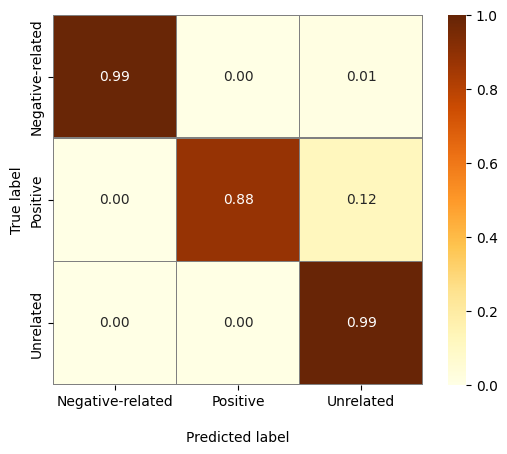

In [ ]:
import matplotlib as mpl
label_size = 15
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'
import seaborn as sns
from sklearn.metrics import confusion_matrix
mpl.rcParams.update(mpl.rcParamsDefault)

cm=confusion_matrix(actual_targets_svm3, predicted_targets_svm3)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
ax = sns.heatmap(cm, annot=True, fmt='.2f', cmap='YlOrBr', linewidths=0.3, linecolor='gray', vmax=1.0, square=True)


ax.set_xlabel('\nPredicted label')
ax.set_ylabel('True label');
classes=['Negative-related', 'Positive', 'Unrelated']
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(classes)
ax.yaxis.set_ticklabels(classes)
# plt.savefig('/content/drive/My Drive/FBHealth/results/figureSVM3STATE_CM.eps',dpi=300, bbox_inches='tight')
## Display the visualization of the Confusion Matrix.
plt.show()

#SVM with Trigram in TF-IDF (Imbalanced Data)

In [ ]:
tfidf3_coco = TfidfVectorizer(max_features=20000, analyzer='word',ngram_range=(3,3)) 
X= tfidf3_coco.fit_transform(Newdata2['text'].values).toarray() 
Y=Newdata2['label_cat'].values

y_pred_svm3, predicted_targets_svm3, actual_targets_svm3, cvscores_svm3 = CorssValidationML_state(X, Y,"SVMState")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores_svm3[:,0]), np.std(cvscores_svm3[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores_svm3[:,1]), np.std(cvscores_svm3[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores_svm3[:,2]), np.std(cvscores_svm3[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores_svm3[:,3]), np.std(cvscores_svm3[:,3])))

K-fold=  0
Train Neg:  741
Train Pos:  2400
Train Unrelated:  0
Test Neg:  186
Test Pos:  600
Test Unrelated:  0
0.7563025210084033
0.8074163331167878
0.7563025210084033
0.6791000411670542
K-fold=  1
Train Neg:  741
Train Pos:  2400
Train Unrelated:  0
Test Neg:  186
Test Pos:  600
Test Unrelated:  0
0.7490996398559424
0.8006237148324676
0.7490996398559424
0.6651795217251102
K-fold=  2
Train Neg:  742
Train Pos:  2400
Train Unrelated:  0
Test Neg:  185
Test Pos:  600
Test Unrelated:  0
0.7611044417767107
0.8206040864405837
0.7611044417767107
0.6853536974451316
K-fold=  3
Train Neg:  742
Train Pos:  2400
Train Unrelated:  0
Test Neg:  185
Test Pos:  600
Test Unrelated:  0
0.7406962785114045
0.7553022442022431
0.7406962785114045
0.6506971858602019
K-fold=  4
Train Neg:  742
Train Pos:  2400
Train Unrelated:  0
Test Neg:  185
Test Pos:  600
Test Unrelated:  0
0.758703481392557
0.7994527687706586
0.758703481392557
0.6833596083894259
Accuracy: 0.753 (+/- 0.01)
F1: 0.673 (+/- 0.01)
Precision

#NB

In [ ]:
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(Newdata2['text'].values)
sequences = tokenizer.texts_to_sequences(Newdata2['text'].values)
X = pad_sequences(sequences)
X, Y=Data_balancingROS(X, Newdata2['label_cat'].values)

y_pred_nb, predicted_targets_nb, actual_targets_nb, cvscores_nb = CorssValidationML_state(X, Y,"NBState")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores_nb[:,0]), np.std(cvscores_nb[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores_nb[:,1]), np.std(cvscores_nb[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores_nb[:,2]), np.std(cvscores_nb[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores_nb[:,3]), np.std(cvscores_nb[:,3])))

(9000, 447) (9000,)
Frequency of unique values of the said array:
[[   0    1    2]
 [3000 3000 3000]]
K-fold=  0
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  0
Test Neg:  600
Test Pos:  600
Test Unrelated:  0
0.5866666666666667
0.5392814316215211
0.5866666666666667
0.5019929857718399
K-fold=  1
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  0
Test Neg:  600
Test Pos:  600
Test Unrelated:  0
0.5888888888888889
0.5310693259335074
0.5888888888888889
0.5058600785122531
K-fold=  2
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  0
Test Neg:  600
Test Pos:  600
Test Unrelated:  0
0.5766666666666667
0.4974595198213289
0.5766666666666667
0.49050601384697495
K-fold=  3
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  0
Test Neg:  600
Test Pos:  600
Test Unrelated:  0
0.5783333333333334
0.5115100816956113
0.5783333333333334
0.4960088514226528
K-fold=  4
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  0
Test Neg:  600
Test Pos:  600
Test Unrelated:  0
0.5794444444444444
0.4

##CM

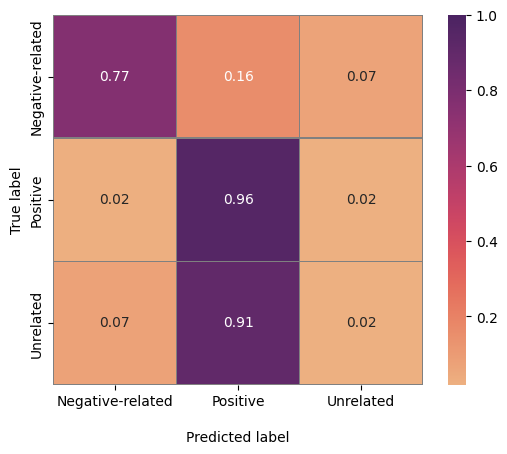

In [ ]:
import matplotlib as mpl
label_size = 15
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'
import seaborn as sns
from sklearn.metrics import confusion_matrix
mpl.rcParams.update(mpl.rcParamsDefault)

cm=confusion_matrix(actual_targets_nb, predicted_targets_nb)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
ax = sns.heatmap(cm, annot=True, fmt='.2f', cmap='flare', linewidths=0.3, linecolor='gray', vmax=1.0, square=True)


ax.set_xlabel('\nPredicted label')
ax.set_ylabel('True label');
classes=['Negative-related', 'Positive', 'Unrelated']
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(classes)
ax.yaxis.set_ticklabels(classes)
# plt.savefig('/content/drive/My Drive/FBHealth/results/figureNBSTATE_CM.eps',dpi=300, bbox_inches='tight')
## Display the visualization of the Confusion Matrix.
plt.show()

#NB (Imbalanced Data)

In [ ]:
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(Newdata2['text'].values)
sequences = tokenizer.texts_to_sequences(Newdata2['text'].values)
X = pad_sequences(sequences)
Y=Newdata2['label_cat'].values

y_pred_nb, predicted_targets_nb, actual_targets_nb, cvscores_nb = CorssValidationML_state(X, Y,"NBState")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores_nb[:,0]), np.std(cvscores_nb[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores_nb[:,1]), np.std(cvscores_nb[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores_nb[:,2]), np.std(cvscores_nb[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores_nb[:,3]), np.std(cvscores_nb[:,3])))

K-fold=  0
Train Neg:  741
Train Pos:  2400
Train Unrelated:  0
Test Neg:  186
Test Pos:  600
Test Unrelated:  0
0.27611044417767105
0.5271507042186405
0.27611044417767105
0.15076320991745779
K-fold=  1
Train Neg:  741
Train Pos:  2400
Train Unrelated:  0
Test Neg:  186
Test Pos:  600
Test Unrelated:  0
0.26770708283313327
0.4793909305281501
0.26770708283313327
0.14714698564266748
K-fold=  2
Train Neg:  742
Train Pos:  2400
Train Unrelated:  0
Test Neg:  185
Test Pos:  600
Test Unrelated:  0
0.26770708283313327
0.4688737451360327
0.26770708283313327
0.1359712562884471
K-fold=  3
Train Neg:  742
Train Pos:  2400
Train Unrelated:  0
Test Neg:  185
Test Pos:  600
Test Unrelated:  0
0.26290516206482595
0.48837000909241335
0.26290516206482595
0.13402956205387684
K-fold=  4
Train Neg:  742
Train Pos:  2400
Train Unrelated:  0
Test Neg:  185
Test Pos:  600
Test Unrelated:  0
0.27490996398559425
0.6637479985182703
0.27490996398559425
0.1486956324832721
Accuracy: 0.270 (+/- 0.00)
F1: 0.143 (+/-

#RF

In [ ]:
tfidf4_coco = TfidfVectorizer(max_features=20000,  analyzer='word',ngram_range=(4,4)) 
X= tfidf4_coco.fit_transform(Newdata2['text'].values).toarray() 
X, Y=Data_balancingROS(X, Newdata2['label_cat'].values)

y_pred_rf, predicted_targets_rf, actual_targets_rf, cvscores_rf = CorssValidationML_state(X, Y,"RFState")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores_rf[:,0]), np.std(cvscores_rf[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores_rf[:,1]), np.std(cvscores_rf[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores_rf[:,2]), np.std(cvscores_rf[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores_rf[:,3]), np.std(cvscores_rf[:,3])))

(9000, 20000) (9000,)
Frequency of unique values of the said array:
[[   0    1    2]
 [3000 3000 3000]]
K-fold=  0
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  0
Test Neg:  600
Test Pos:  600
Test Unrelated:  0
0.9394444444444444
0.9487541137752703
0.9394444444444444
0.9392709229854095
K-fold=  1
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  0
Test Neg:  600
Test Pos:  600
Test Unrelated:  0
0.9411111111111111
0.9497248067927598
0.9411111111111111
0.9409286143748666
K-fold=  2
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  0
Test Neg:  600
Test Pos:  600
Test Unrelated:  0
0.9344444444444444
0.9452181987000929
0.9344444444444444
0.9341680358709851
K-fold=  3
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  0
Test Neg:  600
Test Pos:  600
Test Unrelated:  0
0.9388888888888889
0.948356807511737
0.9388888888888889
0.9387049659246997
K-fold=  4
Train Neg:  2400
Train Pos:  2400
Train Unrelated:  0
Test Neg:  600
Test Pos:  600
Test Unrelated:  0
0.9327777777777778
0.9

##CM

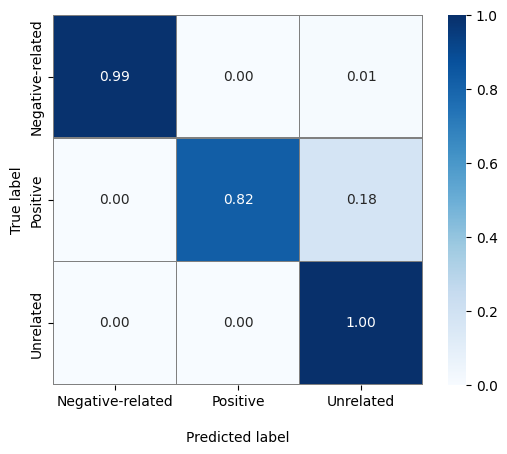

In [ ]:
import matplotlib as mpl
label_size = 15
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'
import seaborn as sns
from sklearn.metrics import confusion_matrix
mpl.rcParams.update(mpl.rcParamsDefault)

cm=confusion_matrix(actual_targets_rf, predicted_targets_rf)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
ax = sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', linewidths=0.3, linecolor='gray', vmax=1.0, square=True)


ax.set_xlabel('\nPredicted label')
ax.set_ylabel('True label');
classes=['Negative-related', 'Positive', 'Unrelated']
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(classes)
ax.yaxis.set_ticklabels(classes)
# plt.savefig('/content/drive/My Drive/FBHealth/results/figureRFSTATE_CM.eps',dpi=300, bbox_inches='tight')
## Display the visualization of the Confusion Matrix.
plt.show()

#RF (Imbalanced Data)

In [ ]:
tfidf4_coco = TfidfVectorizer(max_features=20000,  analyzer='word',ngram_range=(4,4)) 
X= tfidf4_coco.fit_transform(Newdata2['text'].values).toarray() 
Y=Newdata2['label_cat'].values

y_pred_rf, predicted_targets_rf, actual_targets_rf, cvscores_rf = CorssValidationML_state(X, Y,"RFState")
print("Accuracy: %.3f (+/- %.2f)" % (np.mean(cvscores_rf[:,0]), np.std(cvscores_rf[:,0])))
print("F1: %.3f (+/- %.2f)" % (np.mean(cvscores_rf[:,1]), np.std(cvscores_rf[:,1])))
print("Precision: %.3f (+/- %.2f)" % (np.mean(cvscores_rf[:,2]), np.std(cvscores_rf[:,2])))
print("Recall: %.3f (+/- %.2f)" % (np.mean(cvscores_rf[:,3]), np.std(cvscores_rf[:,3])))

K-fold=  0
Train Neg:  741
Train Pos:  2400
Train Unrelated:  0
Test Neg:  186
Test Pos:  600
Test Unrelated:  0
0.7382953181272509
0.8080405756434603
0.7382953181272509
0.6410406395689676
K-fold=  1
Train Neg:  741
Train Pos:  2400
Train Unrelated:  0
Test Neg:  186
Test Pos:  600
Test Unrelated:  0
0.7346938775510204
0.7620941059350569
0.7346938775510204
0.6344604522329945
K-fold=  2
Train Neg:  742
Train Pos:  2400
Train Unrelated:  0
Test Neg:  185
Test Pos:  600
Test Unrelated:  0
0.7406962785114045
0.8093354989054447
0.7406962785114045
0.6435249110986484
K-fold=  3
Train Neg:  742
Train Pos:  2400
Train Unrelated:  0
Test Neg:  185
Test Pos:  600
Test Unrelated:  0
0.7346938775510204
0.8061100201347287
0.7346938775510204
0.632886405982083
K-fold=  4
Train Neg:  742
Train Pos:  2400
Train Unrelated:  0
Test Neg:  185
Test Pos:  600
Test Unrelated:  0
0.7394957983193278
0.8086872447877559
0.7394957983193278
0.6431583249262239
Accuracy: 0.738 (+/- 0.00)
F1: 0.639 (+/- 0.00)
Precisio